# Compare tau decay distributions between Tauola and IceCube simulations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import load_hepmc, plot_histograms, filter_events
from collections import Counter
import numba
import pyhepmc
import vector
import matplotlib as mpl

## Load decays

In [3]:
# With neutrino interactions:
nutau_energies = np.array([5, 10, 20, 50, 100]) # GeV # 5, 10, 20, 50, 100

# decay_products = {e: load_hepmc(f"../data/NuTau_{e}.0_GeV_tauola_output.dat") for e in nutau_energies}
decay_products = {e: load_hepmc(f"../data/NuTau_{e}.0_GeV_tauola_output-b.dat") for e in nutau_energies}
decay_products_nopol = {e: load_hepmc(f"../data/NuTau_{e}.0_GeV_tauola_output_nopol-b.dat") for e in nutau_energies}
decay_products_lpol = {e: load_hepmc(f"../data/NuTau_{e}.0_GeV_tauola_output_lpol-b.dat") for e in nutau_energies}
decay_products_ic = {e: pd.read_csv(f"../data/test_genie_NuTau_{e}.0_GeV_particles.csv") for e in nutau_energies}

0
10000
0
10000
20000
30000
40000
0
10000
20000
30000
40000
50000
0
10000
20000
30000
40000
50000
60000
0
10000
20000
30000
40000
50000
60000
70000
0
10000
0
10000
20000
30000
40000
0
10000
20000
30000
40000
50000
0
10000
20000
30000
40000
50000
60000
0
10000
20000
30000
40000
50000
60000
70000
0
10000
0
10000
20000
30000
40000
0
10000
20000
30000
40000
50000
0
10000
20000
30000
40000
50000
60000
0
10000
20000
30000
40000
50000
60000
70000


In [33]:
m_tau = 1.77682 # GeV
nutau_energies = np.array([0, 5, 10, 20, 50, 100, 1000])+m_tau # GeV # 0, 5, 10, 20, 50, 100, 1000

decay_products_nopol_tau = {e: load_hepmc(f"../data/test_bare_lepton_toy_Tau_000005_{e-m_tau:.0f}.0_GeV_tauola_output_nopol.dat") for e in nutau_energies}
decay_products_lpol_tau = {e: load_hepmc(f"../data/test_bare_lepton_toy_Tau_000005_{e-m_tau:.0f}.0_GeV_tauola_output_lpol.dat") for e in nutau_energies}
# decay_products_rpol_tau = {e: load_hepmc(f"../data/test_bare_lepton_toy_Tau_000005_{e-m_tau:.0f}.0_GeV_tauola_output_rpol.dat") for e in nutau_energies}

decay_products_ic_tau = {e: pd.read_csv(f"../data/test_bare_lepton_toy_Tau_000005_{e-m_tau:.0f}.0_GeV_particles_extended.csv").query("event_num < 1000") for e in nutau_energies}

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [4]:
decay_products_pythia_nopol = {e: pd.read_csv(f"../data/test_bare_lepton_toy_Tau_000005_{e-m_tau:.0f}.0_GeV_pythia_output_nopol.csv") for e in nutau_energies}
decay_products_pythia_lpol = {e: pd.read_csv(f"../data/test_bare_lepton_toy_Tau_000005_{e-m_tau:.0f}.0_GeV_pythia_output_lpol.csv") for e in nutau_energies}

In [34]:
datasets_tau = {
    "Tauola fully left-handed": decay_products_lpol_tau.copy(),
    "Tauola unpolarized": decay_products_nopol_tau.copy(), 
    "IceCube": decay_products_ic_tau.copy(),
}

cmap = mpl.colormaps["tab10"]

colors_tau = {
    "Tauola fully left-handed": cmap(4),
    "Tauola unpolarized": cmap(6),
    "IceCube": cmap(0),
}

In [4]:
datasets = {
    "Tauola fully polarized": decay_products_lpol.copy(),
    "Tauola unpolarized": decay_products_nopol.copy(), 
    # "Tauola fully right-handed": decay_products_rpol.copy(),
    "Tauola realistic polarization": decay_products.copy(), 
    "IceCube": decay_products_ic.copy(),
    # "Pythia unpolarized": decay_products_pythia_nopol,
    # "Pythia fully left-handed": decay_products_pythia_lpol,
}

datasets_tauola = {
    "Tauola fully polarized": decay_products_lpol.copy(),
    "Tauola unpolarized": decay_products_nopol.copy(), 
    # "Tauola fully right-handed": decay_products_rpol.copy(),
    "Tauola realistic polarization": decay_products.copy(), 
}
cmap = mpl.colormaps["tab10"]

colors = {
    "Tauola fully polarized": np.r_[cmap(4)[:3], 0.7],
    "Tauola unpolarized": np.r_[cmap(6)[:3], 0.7], 
    # "Tauola fully right-handed": cmap(2),
    "Tauola realistic polarization": cmap(3), 
    "IceCube": cmap(0),
    # "Pythia unpolarized": cmap(4),
    # "Pythia fully left-handed": cmap(5),
}

In [5]:
all_event_infos = {e: pd.read_csv(f"../data/test_genie_NuTau_{e}.0_GeV_event_info_pdf.csv") for e in nutau_energies}

def drop_res_events(datasets):
    # Only plot events that are QEL or DIS
    for label, d in datasets.items():
        for e in nutau_energies:
            ev = all_event_infos[e]
            allowed_events = ev.loc[ev["qel"] | ev["dis"], "event_num"]

            d[e] = d[e].loc[d[e]["event_num"].isin(allowed_events), :]

    for label, d in datasets.items():
        for e in nutau_energies:
            assert d[e]["event_num"].nunique() == all_event_infos[e]["qel"].sum() + all_event_infos[e]["dis"].sum()

    for e in nutau_energies:
        d = list(datasets.values())[0]
        print(d[e]["event_num"].nunique() / all_event_infos[e]["event_num"].nunique() * 100, "% of events are kept")
    
    return datasets

In [6]:
datasets = drop_res_events(datasets)
datasets_tauola = drop_res_events(datasets_tauola)

54.14685979531346 % of events are kept
66.81571082295908 % of events are kept
87.02427063714865 % of events are kept
95.91790606211292 % of events are kept
98.23232323232324 % of events are kept
54.14685979531346 % of events are kept
66.81571082295908 % of events are kept
87.02427063714865 % of events are kept
95.91790606211292 % of events are kept
98.23232323232324 % of events are kept


## Compare IceCube decay products with Tauola decay products

In [7]:
def missing_energy(decay_products):
    decay_products_invisible = decay_products.groupby("event_num").nth[3:].query("(pdg.abs() == 12) or (pdg.abs() == 14) or (pdg.abs() == 16)")
    return decay_products_invisible.groupby("event_num")["E"].sum().values

def tau_visible_e(df) -> np.ndarray:
    return df.groupby("event_num").nth[3:].query("(pdg.abs() != 12) and (pdg.abs() != 14) and (pdg.abs() != 16)").groupby("event_num")["E"].sum()

def tau_visible_m(df) -> np.ndarray:
    visible = df.groupby("event_num").nth[3:].query("(pdg.abs() != 12) and (pdg.abs() != 14) and (pdg.abs() != 16)").groupby("event_num")[["E", "px", "py", "pz"]].sum()
    return np.sqrt(visible["E"]**2 - visible["px"]**2 - visible["py"]**2 - visible["pz"]**2).values

def tau_visible_e_fraction(df) -> np.ndarray:
    visible_e = df.groupby("event_num").nth[3:].query("(pdg.abs() != 12) and (pdg.abs() != 14) and (pdg.abs() != 16)").groupby("event_num")["E"].sum().values
    total_e = df.query("pdg == 15")["E"].values
    return visible_e / total_e

def visible_theta(df) -> np.ndarray:
    """The angle between the combined 4-momentum of the visible particles and the z axis"""
    visible_decay_products = df.groupby("event_num").nth[3:].query("(pdg.abs() != 12) and (pdg.abs() != 14) and (pdg.abs() != 16)")
    p = np.sqrt(
        (
            visible_decay_products.groupby("event_num")[["px", "py", "pz"]]
            .sum() # Sum over all decay products
            **2 # Square each component
        ).sum(axis=1) # Sum over the components
    ) # Sqrt of the sum
    pz = visible_decay_products.groupby("event_num")["pz"].sum()
    return np.arccos(pz / np.sqrt(p**2))


def visible_theta_tau(df) -> np.ndarray:
    """The angle between the combined 4-momenta of the visible particles and the tau momentum"""
    visible_decay_products = df.groupby("event_num").nth[3:].query("(pdg.abs() != 12) and (pdg.abs() != 14) and (pdg.abs() != 16)")
    tau = df.query("pdg == 15").set_index("event_num")[["px", "py", "pz"]]
    visible = visible_decay_products.groupby("event_num")[["px", "py", "pz"]].sum()
    # ptau * pvisible / |ptau| * |pvisible|
    return np.arccos(
        (tau["px"] * visible["px"] + tau["py"] * visible["py"] + tau["pz"] * visible["pz"])
         / (np.sqrt((tau**2).sum(axis=1)) * np.sqrt((visible**2).sum(axis=1)))
    )

def visible_delta_theta_tau(df) -> np.ndarray:
    """The theta (angle relative to the incoming neutrino) difference between the tau and the visible tau.
    If it is a positive value, the tau is closer to the neutrino, while if it is a negative value, the visible tau is closer to the neutrino.
    """
    visible_decay_products = df.groupby("event_num").nth[3:].query("(pdg.abs() != 12) and (pdg.abs() != 14) and (pdg.abs() != 16)")
    tau = df.query("pdg == 15").set_index("event_num")[["px", "py", "pz"]]
    visible = visible_decay_products.groupby("event_num")[["px", "py", "pz"]].sum()
    tau_theta = np.arccos(tau["pz"] / np.sqrt((tau**2).sum(axis=1)))
    visible_theta = np.arccos(visible["pz"] / np.sqrt((visible**2).sum(axis=1)))
    return tau_theta - visible_theta

def nutau_energy(decay_products: pd.DataFrame) -> np.ndarray:
    return decay_products.groupby("event_num").nth[3:].query("pdg == 16")["E"].values

Text(0.5, 0.98, 'Outgoing neutrino energy')

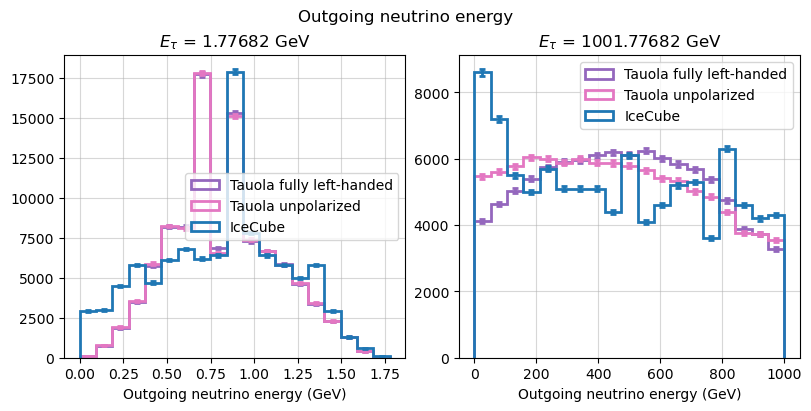

In [19]:
fig, axs = plot_histograms(
    datasets_tau, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, filter_func=lambda values, index: True, plot_func=missing_energy, colors=colors_tau,
    xlabel="Outgoing neutrino energy (GeV)", errorbar=True, title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle("Outgoing neutrino energy")

Text(0.5, 0.98, 'Tau visible energy for all events')

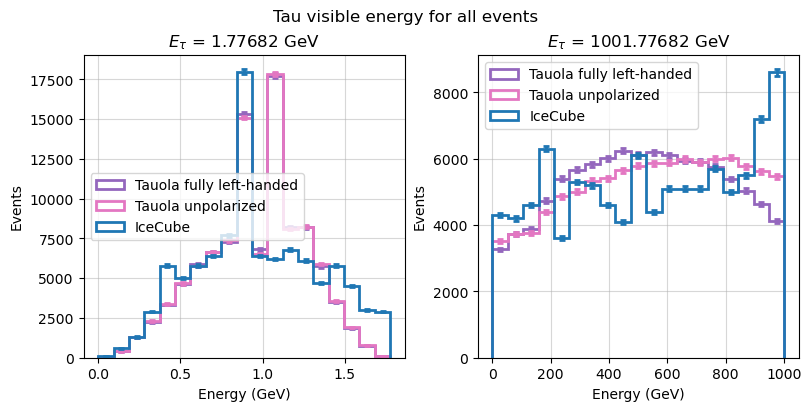

In [22]:
fig, axs = plot_histograms(
    datasets_tau, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, filter_func=lambda values, index: True, plot_func=tau_visible_e, colors=colors_tau,
    xlabel="Energy (GeV)", ylabel="Events", errorbar=True, title_label=r"$E_\tau$ = {e} GeV"
)
fig.suptitle(r"Tau visible energy for all events")

Text(0.5, 0.98, 'Tau visible angle relative to the incoming neutrino for all events')

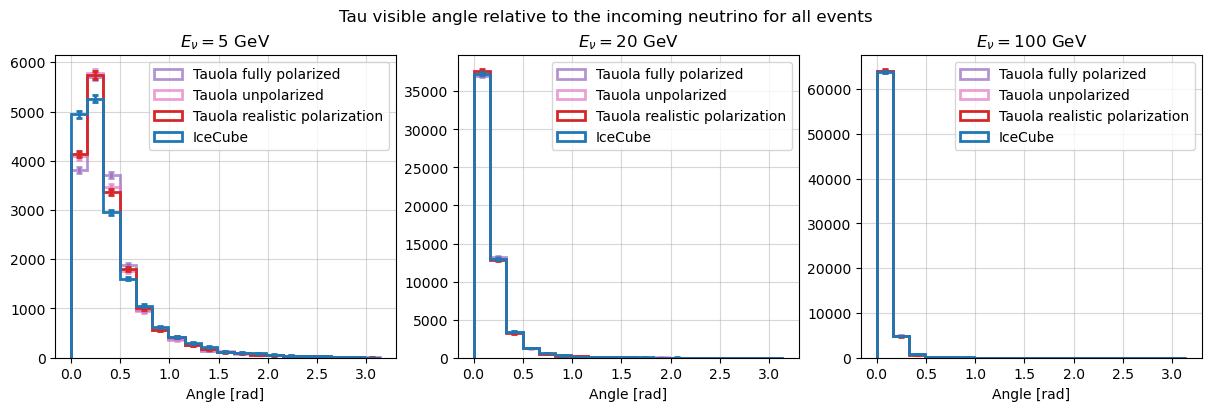

In [12]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, np.pi, 20) for e in nutau_energies}, filter_func=lambda values, index: True, plot_func=visible_theta, 
    xlabel=r"Angle [rad]", errorbar=True, colors=colors,#title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Tau visible angle relative to the incoming neutrino for all events")

Text(0.5, 0.98, 'Angle between visible $\\tau$ and $\\tau$ for all events')

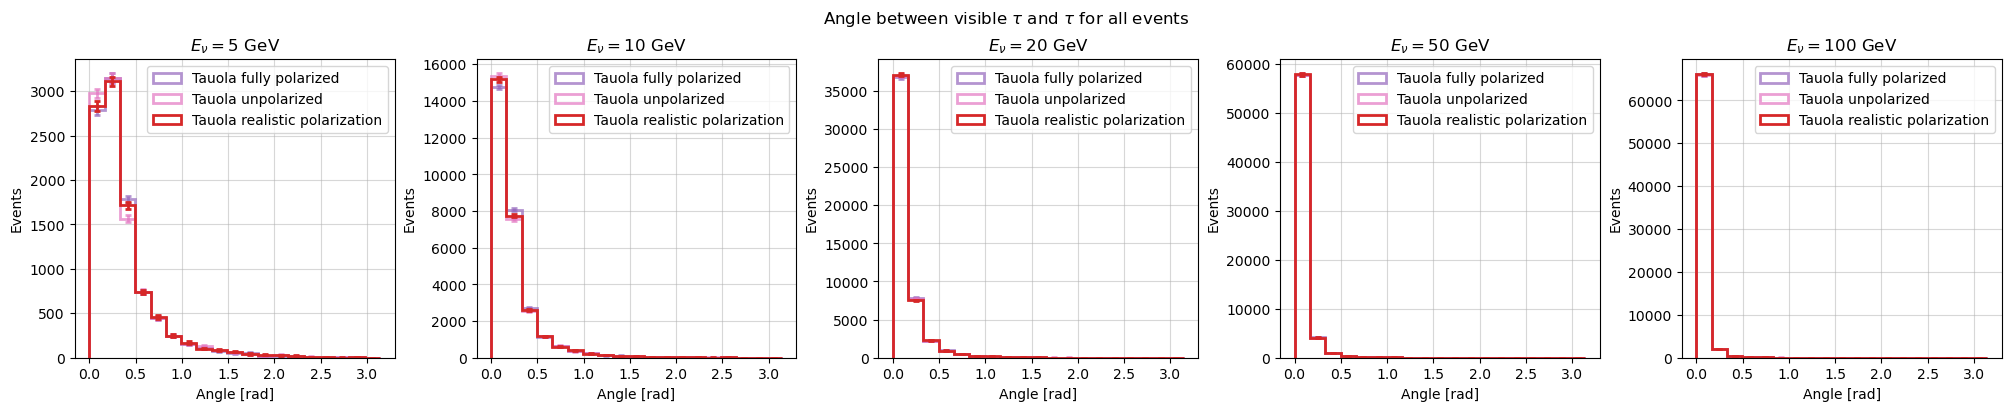

In [133]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, np.pi, 20) for e in nutau_energies}, filter_func=lambda values, index: True, plot_func=visible_theta_tau, 
    xlabel=r"Angle [rad]", errorbar=True, ylabel="Events", colors=colors,#title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Angle between visible $\tau$ and $\tau$ for all events")

Text(0.5, 0.98, '$\\theta$ difference between $\\tau$ and visible $\\tau$')

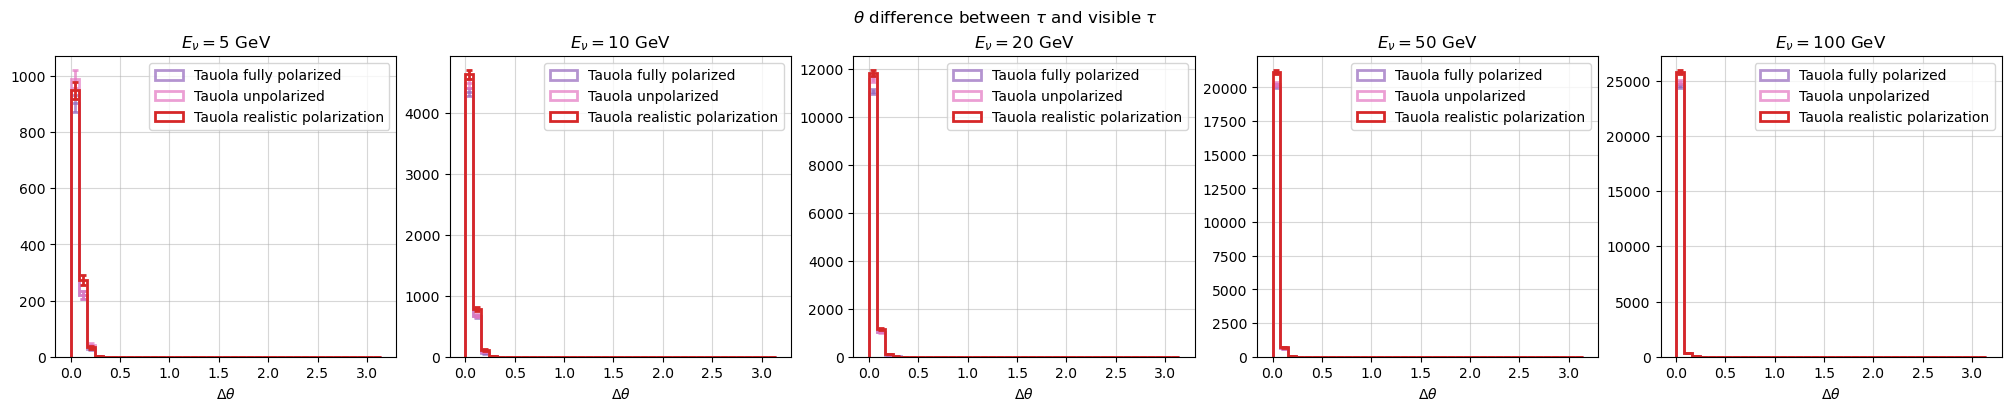

In [134]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, np.pi, 40) for e in nutau_energies}, filter_func=lambda values, index: True, plot_func=visible_delta_theta_tau, 
    xlabel=r"$\Delta\theta$", errorbar=True, colors=colors,
)
fig.suptitle(r"$\theta$ difference between $\tau$ and visible $\tau$")

## Investigate specific decay modes

In [8]:
@numba.njit
def is_pion_nutau_event(values: np.ndarray, index: np.ndarray) -> bool:
    return (values == -211).any() and (values == 16).any() and (values.size == 5)

@numba.njit
def is_pi0_pim_nutau_event(values, index) -> bool:
    """Check if a given event contains a pi0, a pi- and a tau neutrino"""
    return ((values == -211).sum() == 1) and ((values == 111).sum() == 1) and (values == 16).any() and (values.size == 6)

@numba.njit
def is_2pim_pip_nutau_event(values, index) -> bool:
    return ((values == -211).sum() == 2) and ((values == 211).sum() == 1) and (values == 16).any() and (values.size == 7)

@numba.njit
def is_mu_numu_nutau_event(values, index) -> bool:
    return ((values == 13).sum() == 1) and ((values == -14).sum() == 1) and (values == 16).any() and (values.size == 6)
@numba.njit
def is_2pi0_pim_nutau_event(values, index) -> bool:
    return ((values == -211).sum() == 1) and ((values == 111).sum() == 2) and (values == 16).any() and (values.size == 7)

@numba.njit
def is_e_nue_nutau_event(values, index) -> bool:
    return ((values == 11).sum() == 1) and ((values == -12).sum() == 1) and (values == 16).any() and (values.size == 6)

def pion_momentum_fraction(decay_products):
    """Calculate the momentum fraction of the pion relative to the total momentum of all decay products"""
    pion_momentum = (
        decay_products
        .query("pdg.abs() == 211")
        .loc[:, "px":"pz"]
        .pow(2)
        .sum(axis=1)
        .pow(0.5)
    )

    tau_momentum = decay_products.query("pdg == 15").loc[:, "px":"pz"].pow(2).sum(axis=1).pow(0.5)
    
    return pion_momentum.values / tau_momentum.values


def nu_momentum_fraction(decay_products):
    """Calculate the momentum fraction of the tau neutrino relative to the total momentum of all decay products"""
    nu_momentum = (
        decay_products
        .groupby("event_num")
        .nth[3:]
        .query("pdg.abs() == 16")
        .loc[:, "px":"pz"]
        .pow(2)
        .sum(axis=1)
        .pow(0.5)
    )

    tau_momentum = decay_products.query("pdg == 15").loc[:, "px":"pz"].pow(2).sum(axis=1).pow(0.5)

    return nu_momentum.values / tau_momentum.values


def visible_momentum_fraction(decay_products):
    """Calculate the momentum fraction of the visible decay products relative to the total decay products' momentum.
    The same as 1-nu_momentum_fraction, since visible_momentum_fraction + nu_momentum_fraction = 1"""
    only_decay_products = decay_products.groupby("event_num").nth[3:].copy()

    only_decay_products["P"] = (
        only_decay_products
        .query("pdg != 16")
        .loc[:, "px":"pz"]
        .pow(2)
        .sum(axis=1)
        .pow(0.5)
    )

    visible_momentum = only_decay_products.groupby("event_num")["P"].sum()

    tau_momentum = decay_products.query("pdg == 15").loc[:, "px":"pz"].pow(2).sum(axis=1).pow(0.5)
    assert visible_momentum.shape == tau_momentum.shape

    return visible_momentum.values / tau_momentum.values
    #1 - nu_momentum_fraction(decay_products)

Text(0.5, 0.98, 'Pion energy for $\\tau^- \\to \\pi^- \\nu_\\tau$ events')

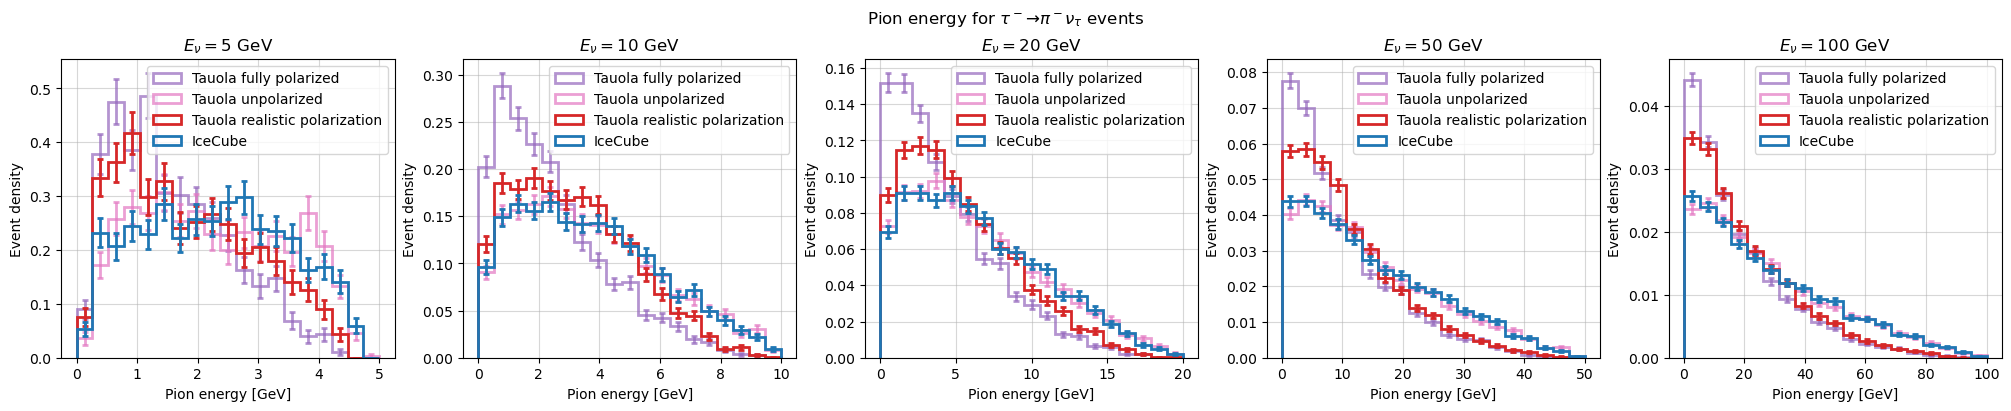

In [11]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, filter_func=is_pion_nutau_event, plot_func=tau_visible_e, 
    xlabel="Pion energy [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors,
)
fig.suptitle(r"Pion energy for $\tau^- \to \pi^- \nu_\tau$ events")

Text(0.5, 0.98, 'Pion energy fraction for $\\tau^- \\to \\pi^- \\nu_\\tau$ events')

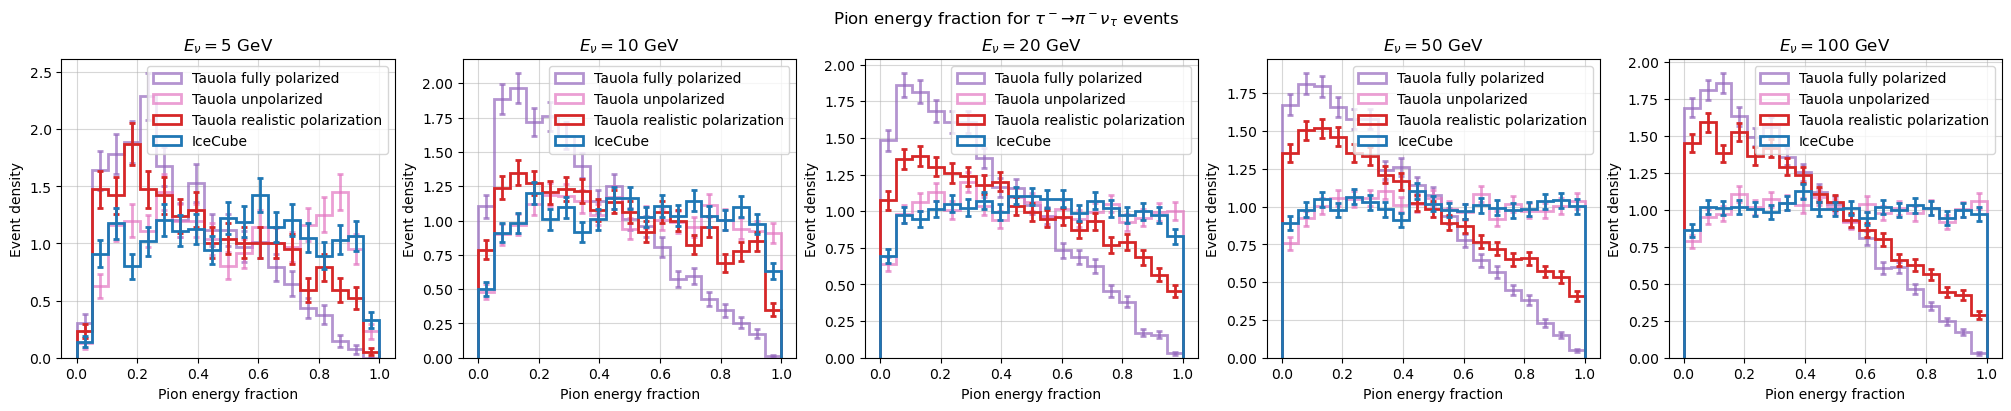

In [12]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, filter_func=is_pion_nutau_event, plot_func=tau_visible_e_fraction, 
    xlabel="Pion energy fraction", density=True, errorbar=True, colors=colors, ylabel="Event density",
)
fig.suptitle(r"Pion energy fraction for $\tau^- \to \pi^- \nu_\tau$ events")

Text(0.5, 0.98, 'Pion angle relative to incoming neutrino for $\\tau^- \\to \\pi^- \\nu_\\tau$ events')

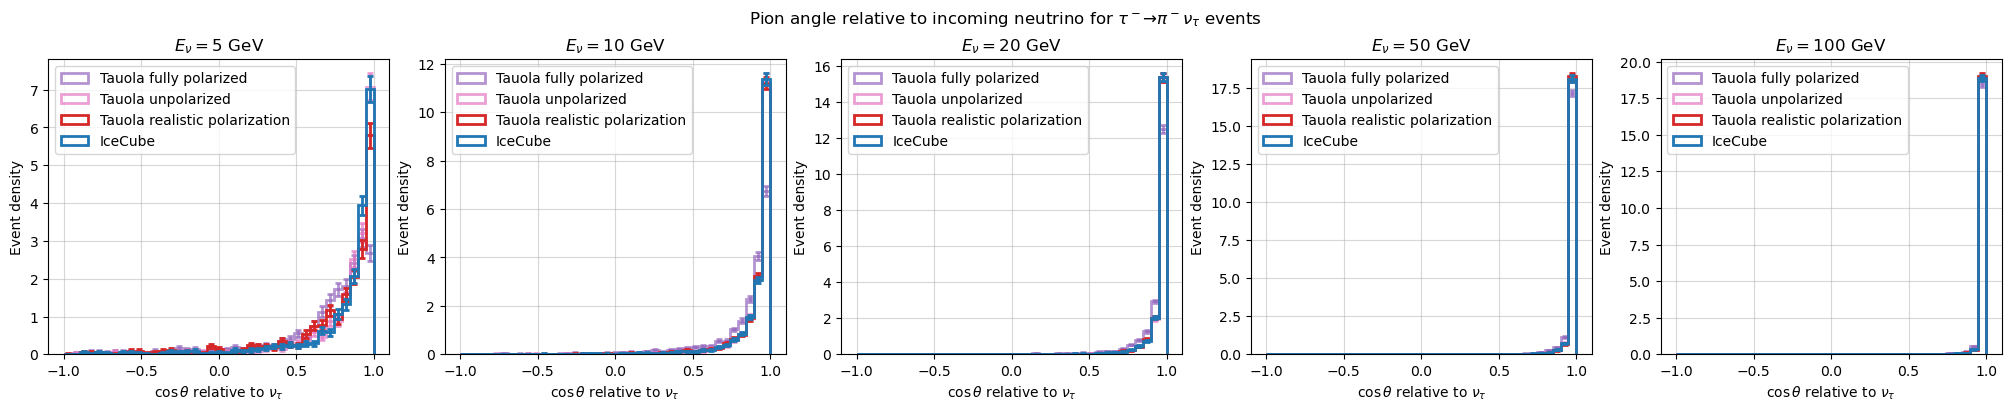

In [55]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 40) for e in nutau_energies}, filter_func=is_pion_nutau_event, plot_func=lambda df: np.cos(visible_theta(df)), 
    xlabel=r"$\cos\theta$ relative to $\nu_\tau$", errorbar=True, density=True, ylabel="Event density", colors=colors,
)
fig.suptitle(r"Pion angle relative to incoming neutrino for $\tau^- \to \pi^- \nu_\tau$ events")

Text(0.5, 0.98, 'Pion angle relative to $\\tau$ for $\\tau^- \\to \\pi^- \\nu_\\tau$ events')

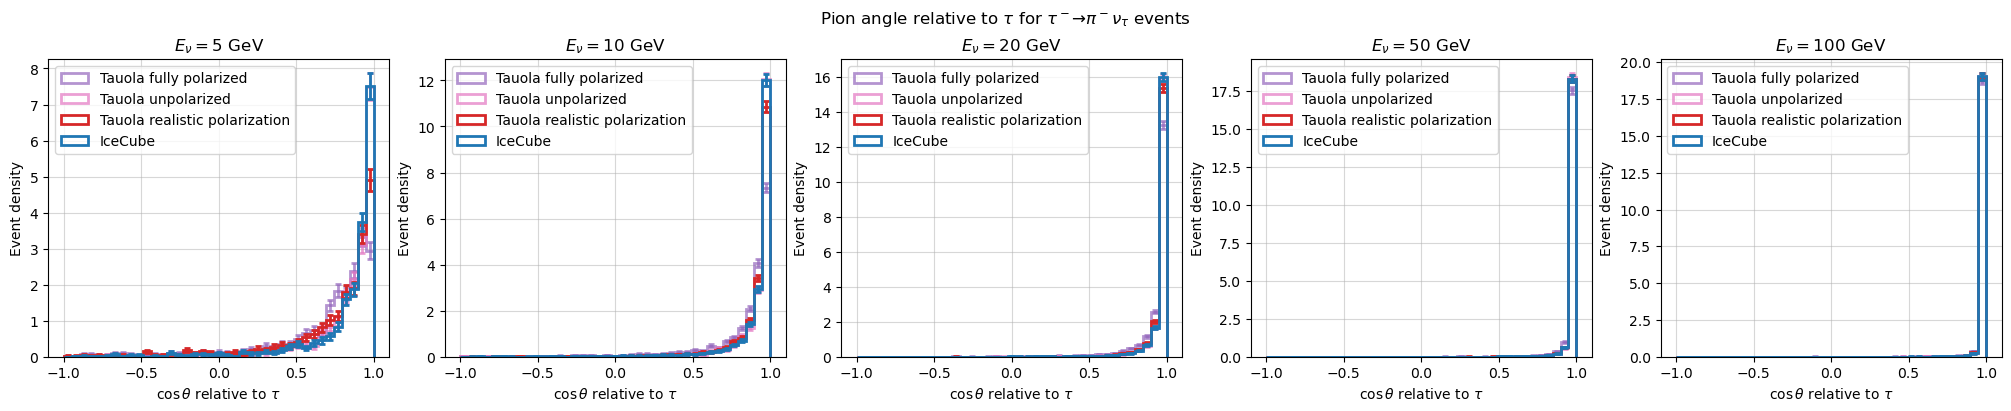

In [56]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 40) for e in nutau_energies}, filter_func=is_pion_nutau_event, plot_func=lambda df: np.cos(visible_theta_tau(df)), 
    xlabel=r"$\cos\theta$ relative to $\tau$", errorbar=True, density=True, ylabel="Event density", colors=colors,
)
fig.suptitle(r"Pion angle relative to $\tau$ for $\tau^- \to \pi^- \nu_\tau$ events")

Text(0.5, 0.98, 'Visible invariant mass for $\\tau^- \\to \\pi^- \\nu_\\tau$ events')

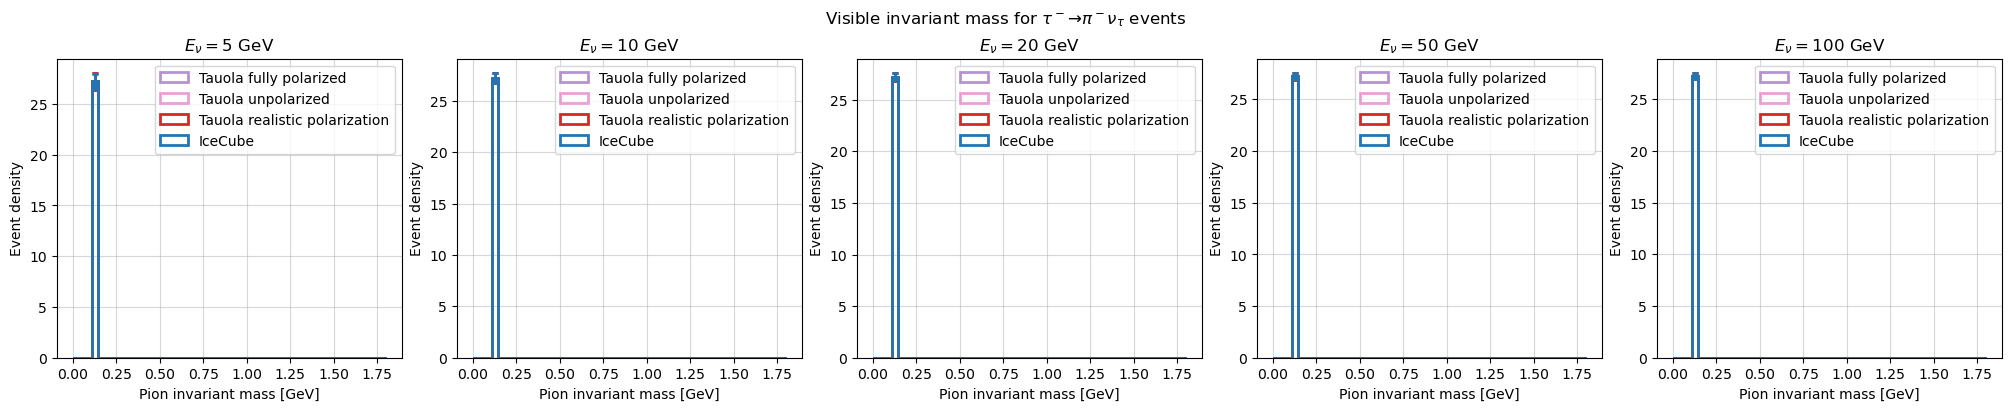

In [13]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1.8, 50) for e in nutau_energies}, 
    filter_func=is_pion_nutau_event, plot_func=tau_visible_m, 
    xlabel=r"Pion invariant mass [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors,
)

# axs[-1].axvline(1.020, c="lightgray", ls="--")

fig.suptitle(r"Visible invariant mass for $\tau^- \to \pi^- \nu_\tau$ events")

Text(0.5, 0.98, 'Pion momentum distribution for $\\tau^- \\to \\pi^- \\nu_\\tau$ events')

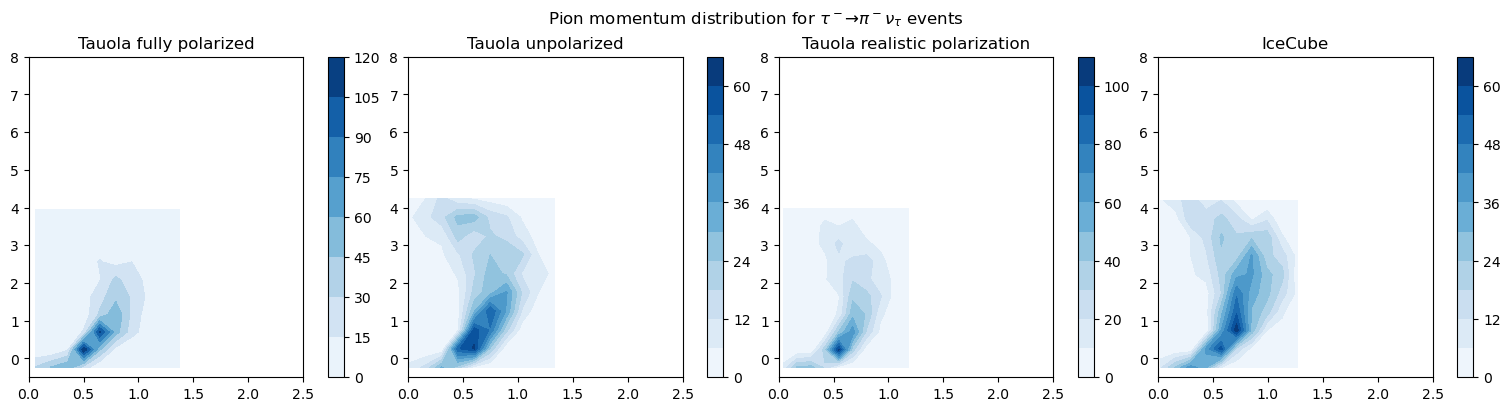

In [14]:
fig, axs = plt.subplots(ncols=len(datasets), figsize=(len(nutau_energies) * 3, 4), layout="constrained")
e = 5
event_info = pd.read_csv(f"../data/test_genie_NuTau_{e}.0_GeV_event_info.csv")

for (label, d), ax in zip(datasets.items(), axs):
    d_filtered = filter_events(d[e], "pdg", is_pion_nutau_event, engine="numba")
    pions = d_filtered.query("pdg == -211")
    events = event_info[event_info["event_num"].isin(pions["event_num"])]
    pions = pions[events["qel"].values]
    # Make a 2D histogram as a contour plot of the pion transverse momentum vs pion z momentum
    values, xedges, yedges = np.histogram2d(np.sqrt(pions.px**2 + pions.py**2), pions.pz, bins=10)
    im = ax.contourf(xedges[:-1], yedges[:-1], values.T, levels=10, cmap="Blues")
    fig.colorbar(im, ax=ax)
    ax.set(title=label, xlim=(0, 2.5), ylim=(-0.5, 8))

fig.suptitle(r"Pion momentum distribution for $\tau^- \to \pi^- \nu_\tau$ events")

We see a clear difference between the decay using Tauola with real polarization given by GENIE and the unpolarized decay by Geant4.
A similar difference would likely be seen for the IceCube simulations.

Text(0.5, 0.98, 'Visible invariant mass for $\\tau^- \\to \\pi^0 \\pi^- \\nu_\\tau$ events')

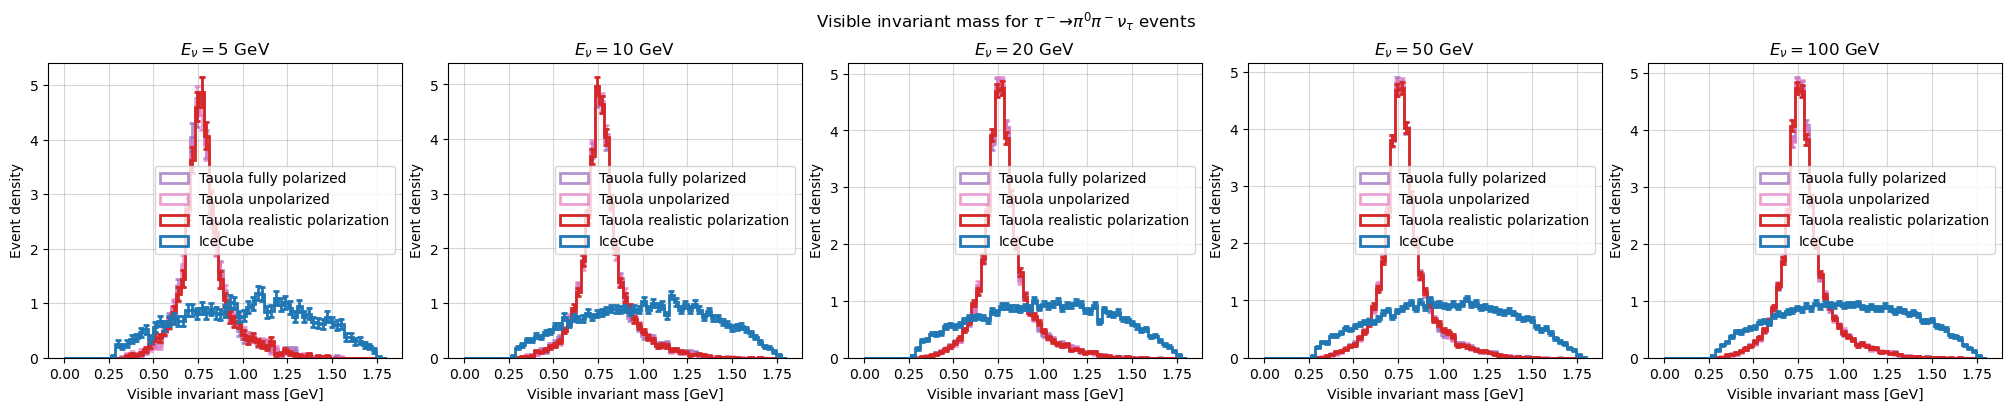

In [15]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1.8, 70) for e in nutau_energies}, 
    filter_func=is_pi0_pim_nutau_event, plot_func=tau_visible_m, 
    xlabel="Visible invariant mass [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors,
)
axs[-1].legend(loc="center right")
# axs[-1].axvline(0.77, c="lightgray", ls="--")

fig.suptitle(r"Visible invariant mass for $\tau^- \to \pi^0 \pi^- \nu_\tau$ events")

Text(0.5, 0.98, 'Visible energy fraction for $\\tau^- \\to \\pi^0 \\pi^- \\nu_\\tau$ events')

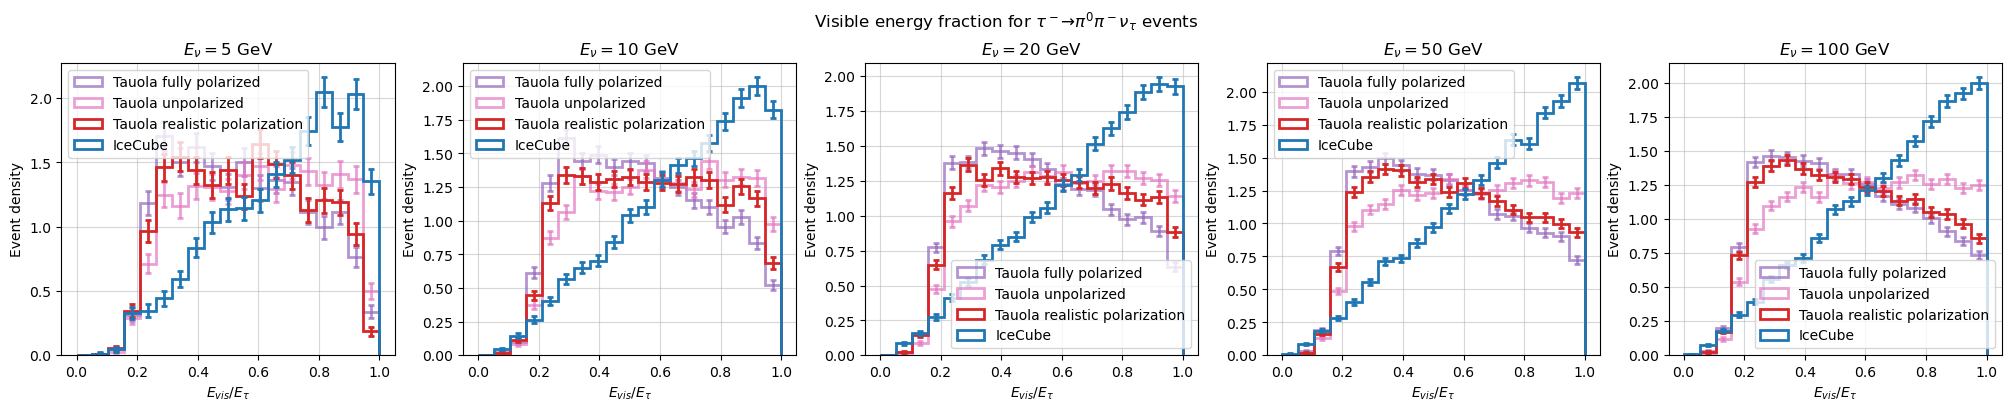

In [16]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_pi0_pim_nutau_event, plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_{vis}/E_\tau$", density=True, errorbar=True, colors=colors, ylabel="Event density"
)

fig.suptitle(r"Visible energy fraction for $\tau^- \to \pi^0 \pi^- \nu_\tau$ events")

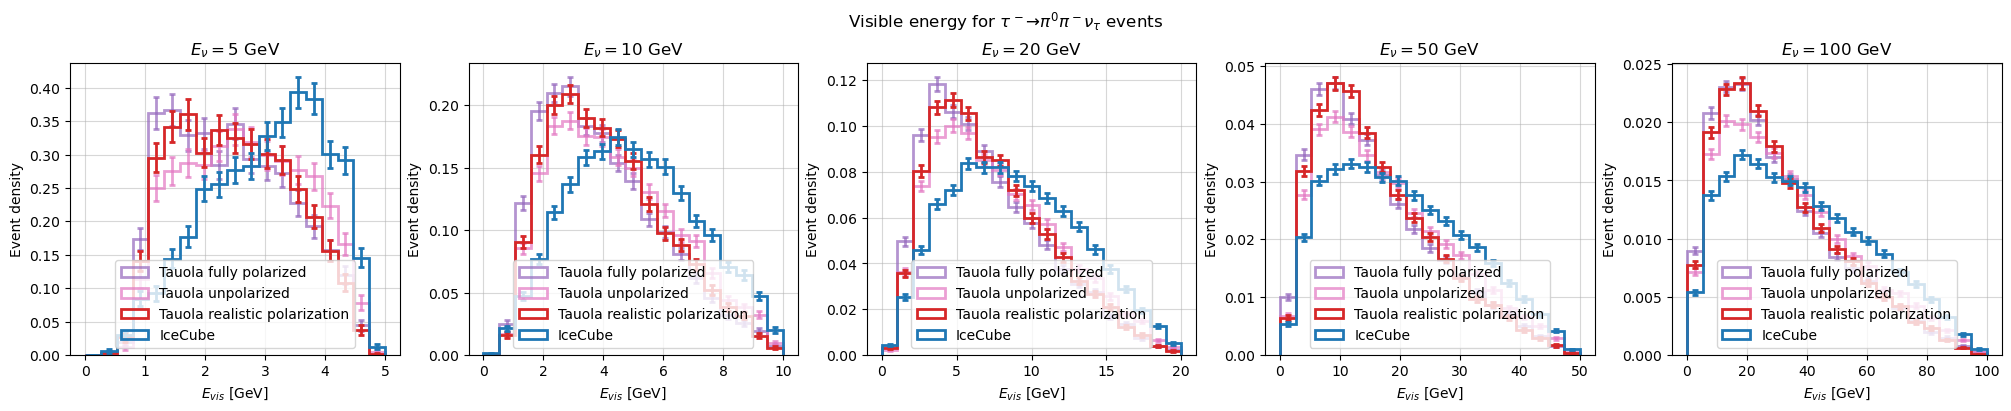

In [17]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, 
    filter_func=is_pi0_pim_nutau_event, plot_func=tau_visible_e, 
    xlabel=r"$E_{vis}$ [GeV]", ylabel="Event density", density=True, errorbar=True, colors=colors,
)

fig.suptitle(r"Visible energy for $\tau^- \to \pi^0 \pi^- \nu_\tau$ events")
for ax in axs.flat:
    ax.legend(loc="lower center")

Text(0.5, 1.0, 'Visible energy fraction for $\\tau^- \\to \\pi^- \\pi^-\\pi^+ \\nu_\\tau$ events')

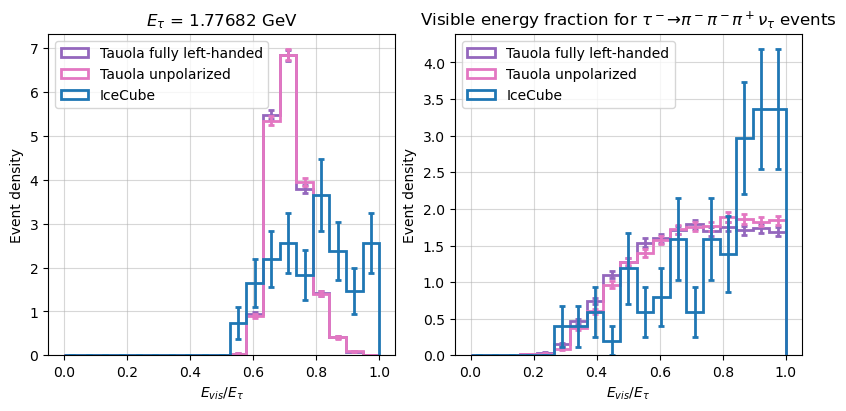

In [25]:
fig, axs = plot_histograms(
    datasets_tau, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pim_pip_nutau_event, plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_{vis}/E_\tau$", density=True, errorbar=True, colors=colors_tau, ylabel="Event density", title_label=r"$E_\tau$ = {e} GeV",
)

axs[-1].set_title(r"Visible energy fraction for $\tau^- \to \pi^- \pi^-\pi^+ \nu_\tau$ events")

In [62]:
datasets_nopol = {
    "Tauola unpolarized": datasets["Tauola unpolarized"].copy(), 
    "IceCube": datasets["IceCube"].copy(), 

}

In [107]:
def particle_energy_fraction(df, pdg, n=0):
    pion_energy = (
        df
        .groupby("event_num")
        .nth[3:]
        .query(f"pdg == {pdg}")
        .groupby("event_num")
        .nth(n)
        ["E"]
        .values
    )

    total_energy = df.query("pdg == 15")["E"].values
    return pion_energy / total_energy

Text(0.5, 0.98, '$\\pi^-$ energy fraction for $\\tau^- \\to \\pi^0 \\pi^- \\nu_\\tau$ events')

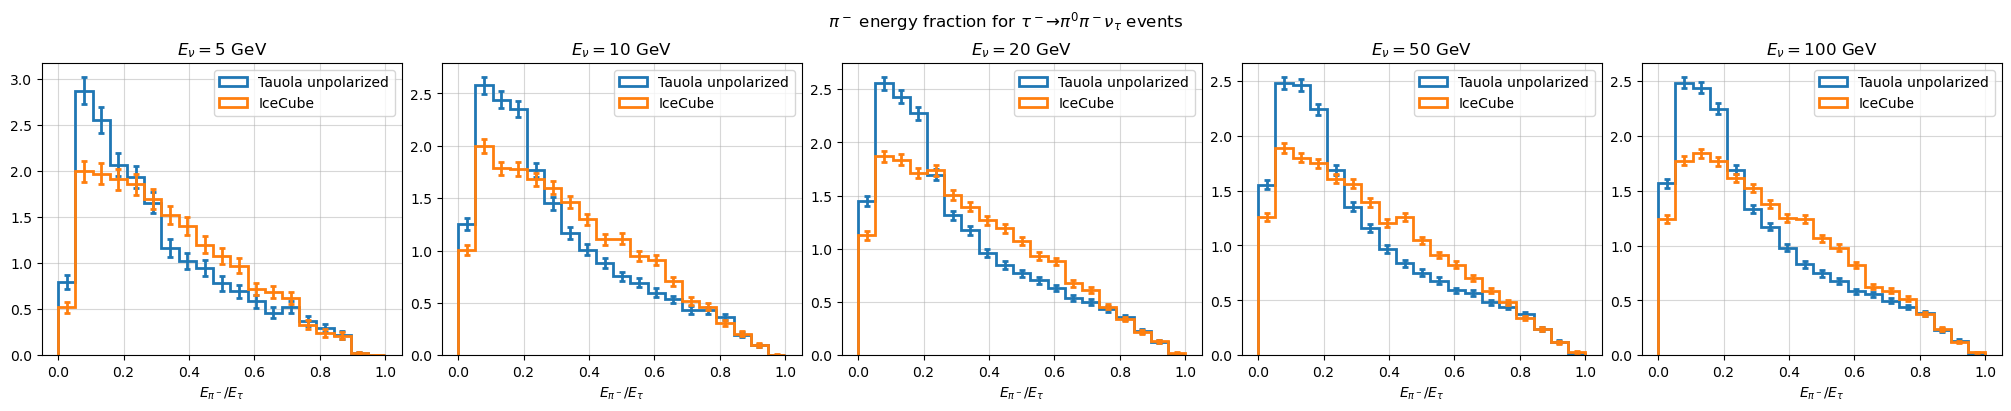

In [78]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_pi0_pim_nutau_event, plot_func=lambda df: particle_energy_fraction(df, -211), 
    xlabel=r"$E_{\pi^-}/E_\tau$", density=True, errorbar=True,
)

fig.suptitle(r"$\pi^-$ energy fraction for $\tau^- \to \pi^0 \pi^- \nu_\tau$ events")

Text(0.5, 0.98, '$\\pi^0$ energy fraction for $\\tau^- \\to \\pi^0 \\pi^- \\nu_\\tau$ events')

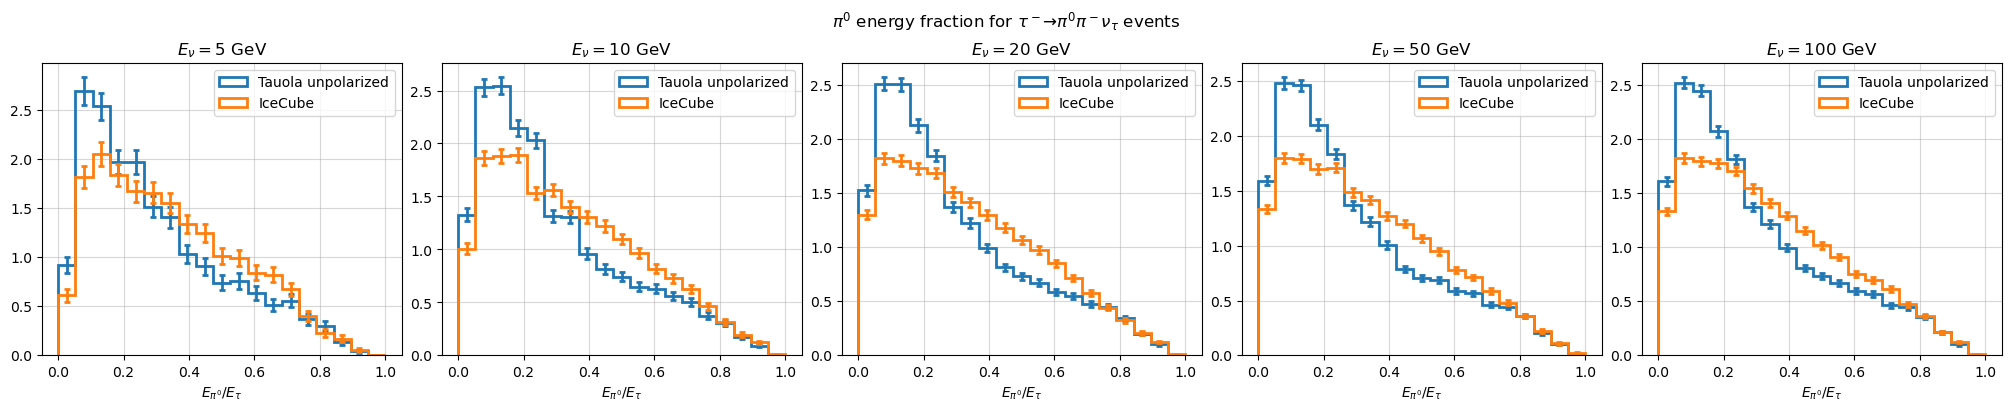

In [79]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_pi0_pim_nutau_event, plot_func=lambda df: particle_energy_fraction(df, 111), 
    xlabel=r"$E_{\pi^0}/E_\tau$", density=True, errorbar=True,
)

fig.suptitle(r"$\pi^0$ energy fraction for $\tau^- \to \pi^0 \pi^- \nu_\tau$ events")

Text(0.5, 0.98, '$\\nu_\\tau$ energy fraction for $\\tau^- \\to \\pi^0 \\pi^- \\nu_\\tau$ events')

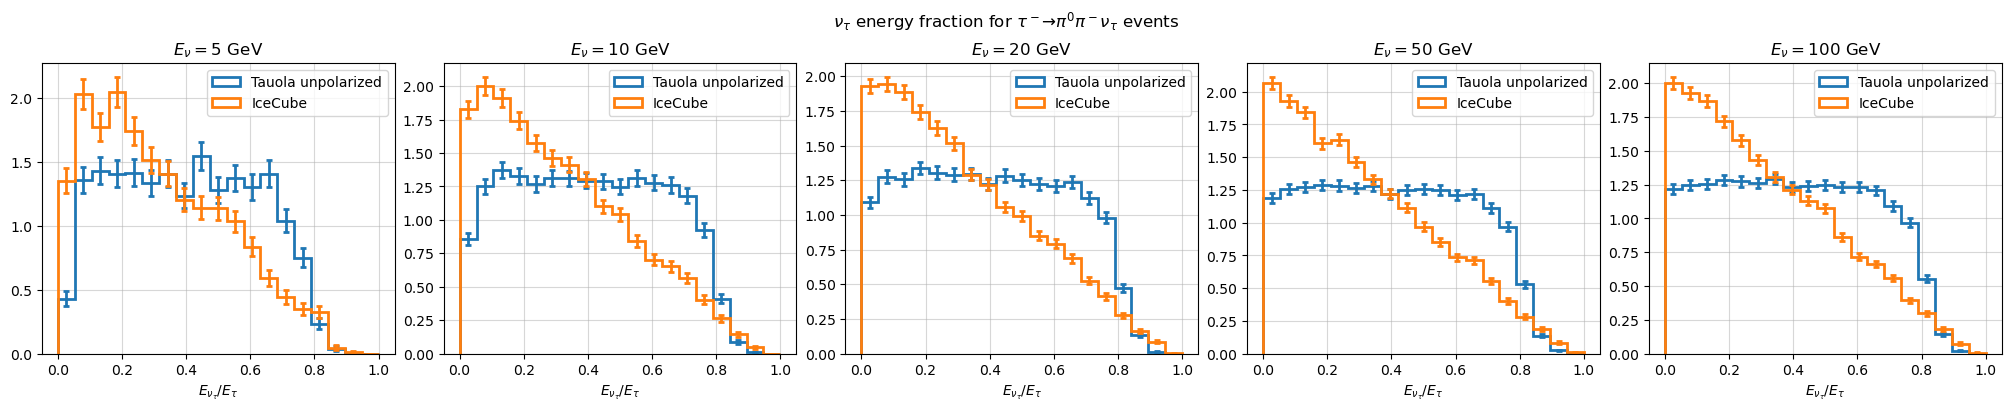

In [80]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_pi0_pim_nutau_event, plot_func=lambda df: particle_energy_fraction(df, 16), 
    xlabel=r"$E_{\nu_\tau}/E_\tau$", density=True, errorbar=True,
)

fig.suptitle(r"$\nu_\tau$ energy fraction for $\tau^- \to \pi^0 \pi^- \nu_\tau$ events")

Text(0.5, 0.98, 'Visible $\\cos\\theta$ relative to $\\tau$ for $\\tau^- \\to \\pi^0 \\pi^- \\nu_\\tau$ events')

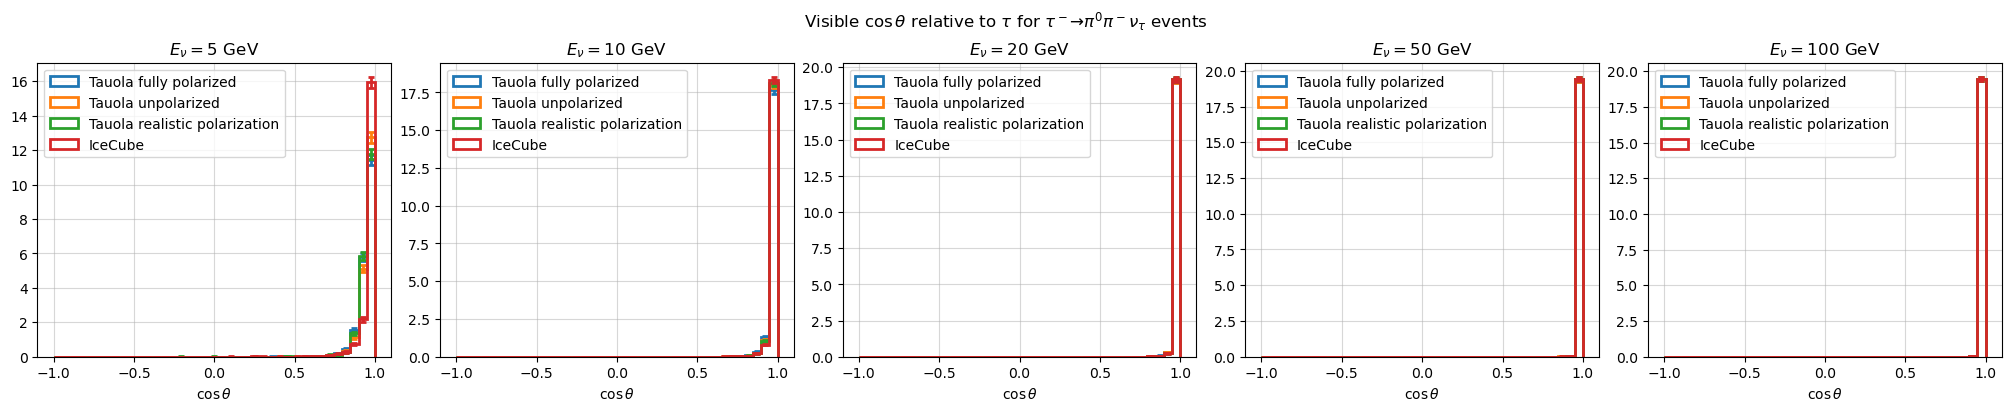

In [21]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 40) for e in nutau_energies}, 
    filter_func=is_pi0_pim_nutau_event, plot_func=lambda df: np.cos(visible_theta_tau(df)), 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Visible $\cos\theta$ relative to $\tau$ for $\tau^- \to \pi^0 \pi^- \nu_\tau$ events")

This looks good as well, since the pions have spin 0, meaning that they will move in the opposite direction of the tau in its rest frame. In the other frames, they move in the same direction as the tau due to boosting.

Text(0.5, 0.98, 'Visible invariant mass for $\\tau^- \\to \\pi^- \\pi^- \\pi^+ \\nu_\\tau$ events')

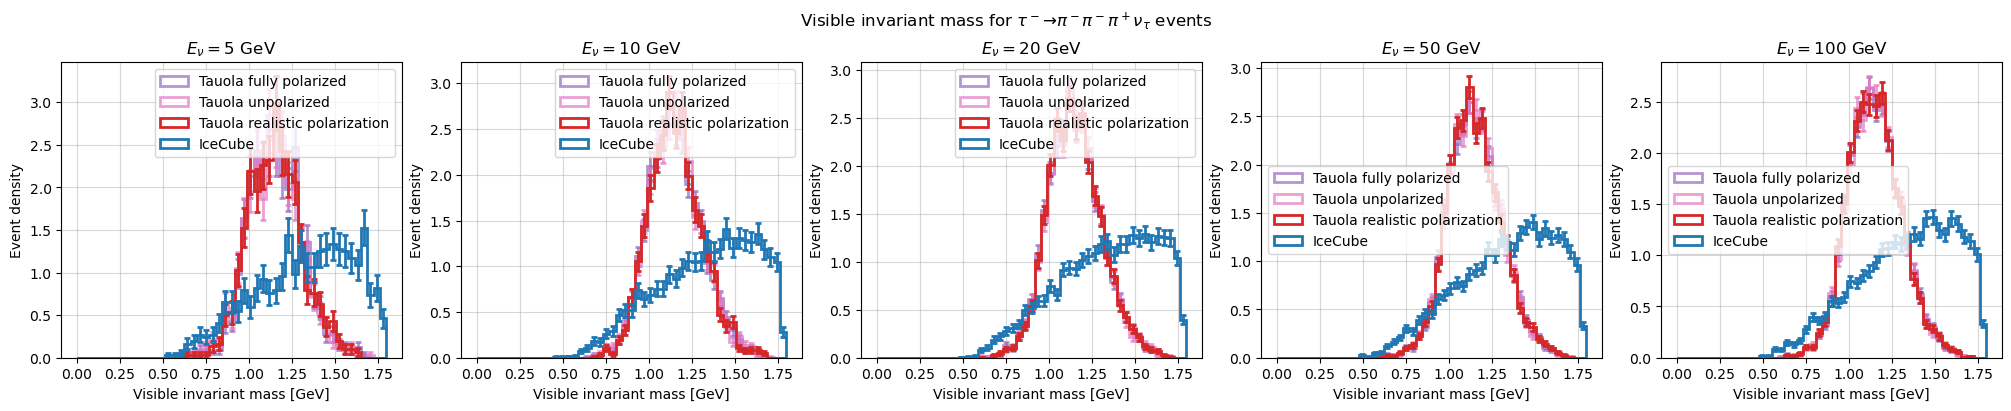

In [22]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1.8, 50) for e in nutau_energies}, 
    filter_func=is_2pim_pip_nutau_event, plot_func=tau_visible_m, 
    xlabel=r"Visible invariant mass [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors,
)

# axs[-1].axvline(1.020, c="lightgray", ls="--")

fig.suptitle(r"Visible invariant mass for $\tau^- \to \pi^- \pi^- \pi^+ \nu_\tau$ events")

Text(0.5, 0.98, 'Visible energy for $\\tau^- \\to \\pi^- \\pi^- \\pi^+ \\nu_\\tau$ events')

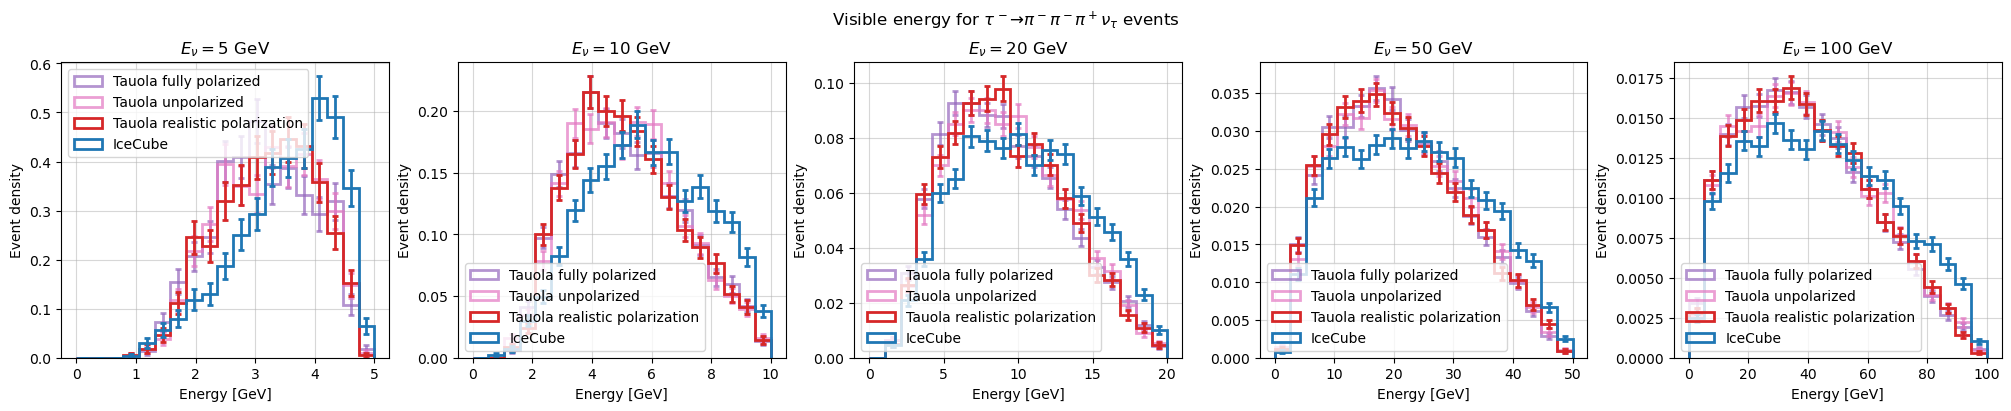

In [23]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, 
    filter_func=is_2pim_pip_nutau_event, plot_func=tau_visible_e, 
    xlabel="Energy [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors#title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Visible energy for $\tau^- \to \pi^- \pi^- \pi^+ \nu_\tau$ events")

Text(0.5, 0.98, 'Visible energy fraction for $\\tau^- \\to \\pi^- \\pi^- \\pi^+ \\nu_\\tau$ events')

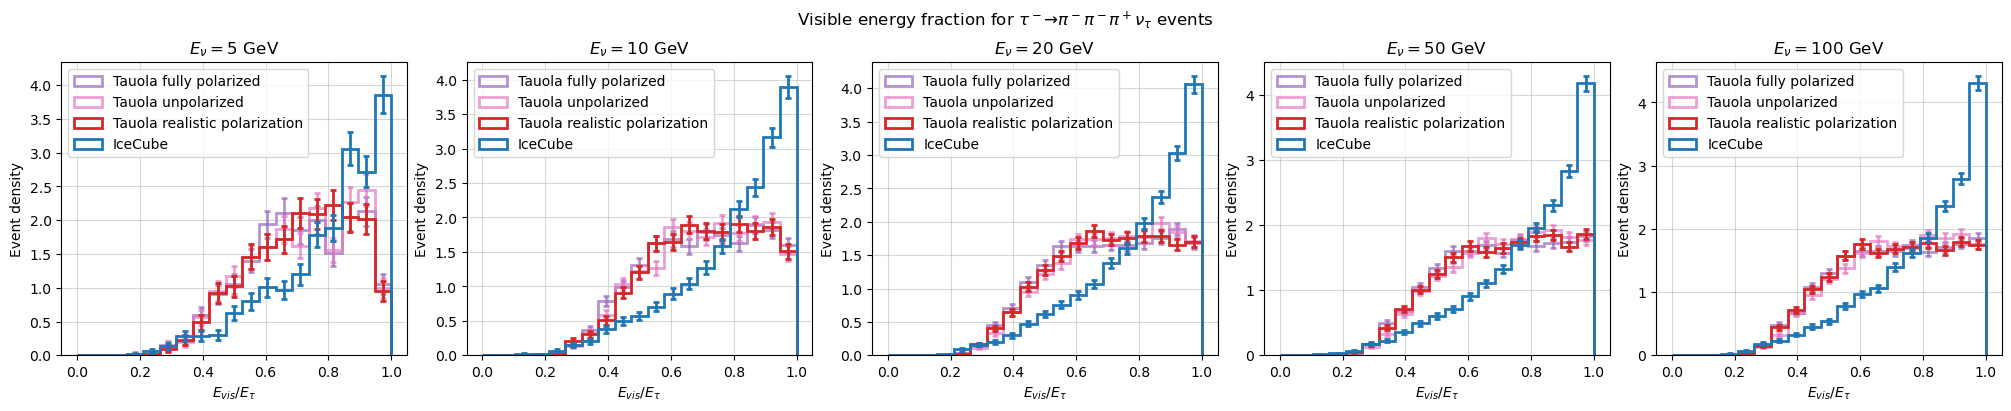

In [27]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pim_pip_nutau_event, plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_{vis} / E_\tau$", density=True, errorbar=True, ylabel="Event density", colors=colors,#title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Visible energy fraction for $\tau^- \to \pi^- \pi^- \pi^+ \nu_\tau$ events")

Text(0.5, 0.98, '$\\pi^+$ energy fraction for $\\tau^- \\to \\pi^- \\pi^- \\pi^+ \\nu_\\tau$ events')

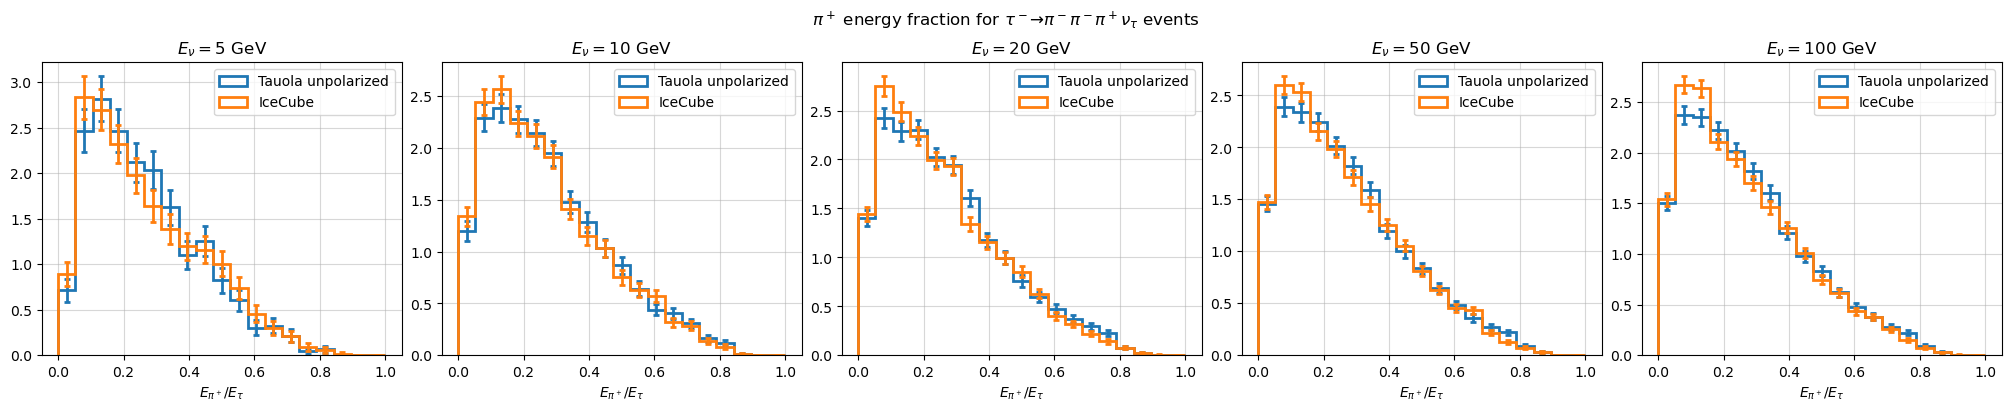

In [81]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pim_pip_nutau_event, plot_func=lambda df: particle_energy_fraction(df, 211), 
    xlabel=r"$E_{\pi^+}/E_\tau$", density=True, errorbar=True,
)
fig.suptitle(r"$\pi^+$ energy fraction for $\tau^- \to \pi^- \pi^- \pi^+ \nu_\tau$ events")

Text(0.5, 0.98, '$\\nu_\\tau$ energy fraction for $\\tau^- \\to \\pi^- \\pi^- \\pi^+ \\nu_\\tau$ events')

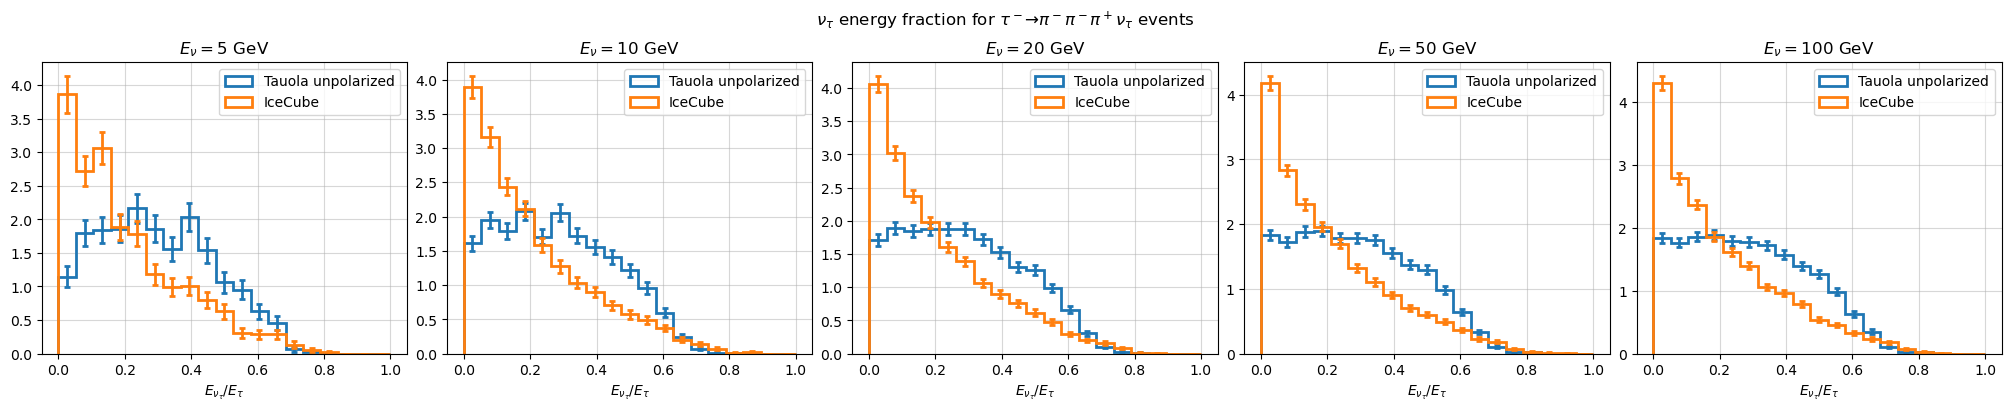

In [86]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pim_pip_nutau_event, plot_func=lambda df: particle_energy_fraction(df, 16), 
    xlabel=r"$E_{\nu_\tau}/E_\tau$", density=True, errorbar=True,
)
fig.suptitle(r"$\nu_\tau$ energy fraction for $\tau^- \to \pi^- \pi^- \pi^+ \nu_\tau$ events")

Text(0.5, 0.98, '$\\pi_1^-$ energy fraction for $\\tau^- \\to \\pi^- \\pi^- \\pi^+ \\nu_\\tau$ events')

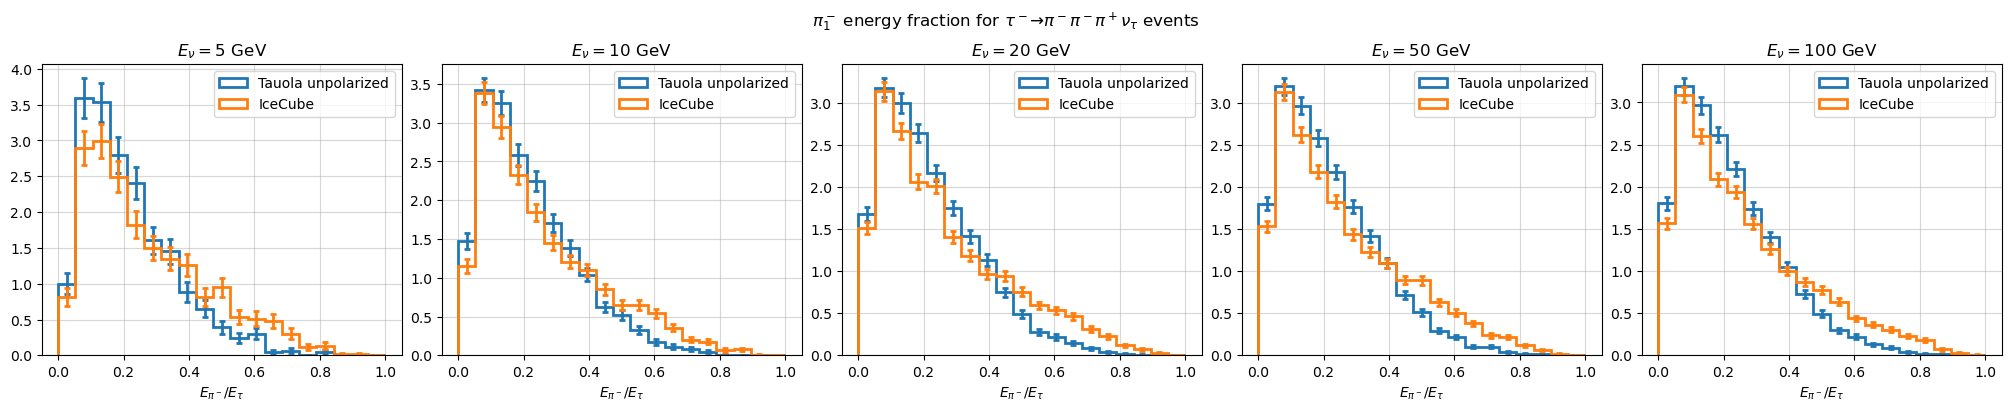

In [108]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pim_pip_nutau_event, plot_func=lambda df: particle_energy_fraction(df, -211, n=0), 
    xlabel=r"$E_{\pi^-}/E_\tau$", density=True, errorbar=True,
)
fig.suptitle(r"$\pi_1^-$ energy fraction for $\tau^- \to \pi^- \pi^- \pi^+ \nu_\tau$ events")

Text(0.5, 0.98, '$\\pi_2^-$ energy fraction for $\\tau^- \\to \\pi^- \\pi^- \\pi^+ \\nu_\\tau$ events')

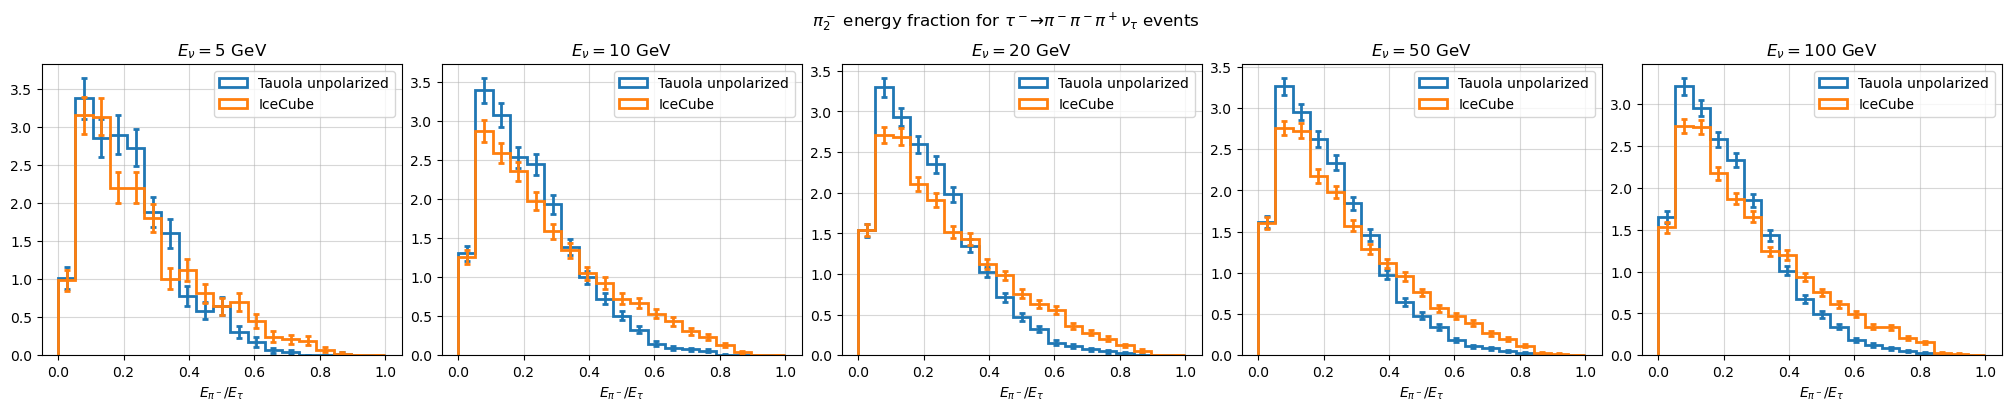

In [109]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pim_pip_nutau_event, plot_func=lambda df: particle_energy_fraction(df, -211, n=1), 
    xlabel=r"$E_{\pi^-}/E_\tau$", density=True, errorbar=True,
)
fig.suptitle(r"$\pi_2^-$ energy fraction for $\tau^- \to \pi^- \pi^- \pi^+ \nu_\tau$ events")

As there are more and more particles, the visible energy naturally becomes a larger part of the total energy

Text(0.5, 0.98, 'Visible $\\cos\\theta$ relative to $\\tau$ for $\\tau^- \\to \\pi^+ \\pi^- \\pi^- \\nu_\\tau$ events')

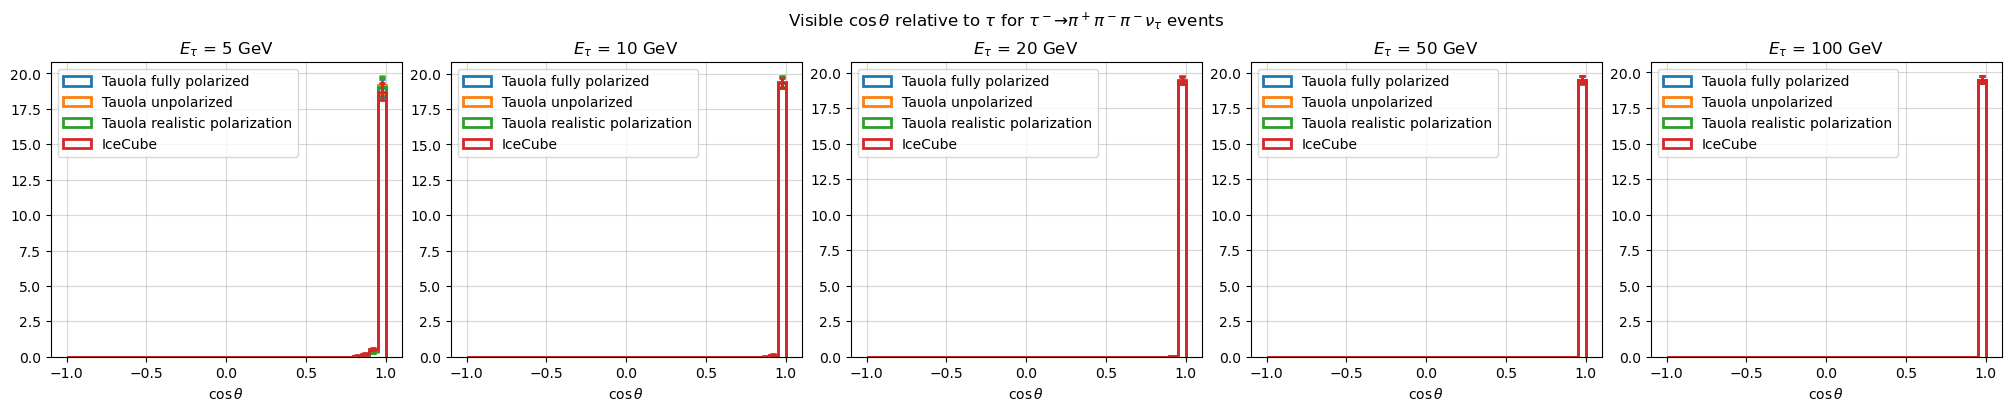

In [29]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 40) for e in nutau_energies}, 
    filter_func=is_2pim_pip_nutau_event, plot_func=lambda df: np.cos(visible_theta_tau(df)), 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Visible $\cos\theta$ relative to $\tau$ for $\tau^- \to \pi^+ \pi^- \pi^- \nu_\tau$ events")

The slight shift towards negative $\cos\theta$ is still there, since the pions are spin 0. However, as there are more particles, the effect gets smaller.

Text(0.5, 0.98, 'Visible momentum fraction for $\\tau^- \\to \\pi^0 \\pi^0 \\pi^- \\nu_\\tau$ events')

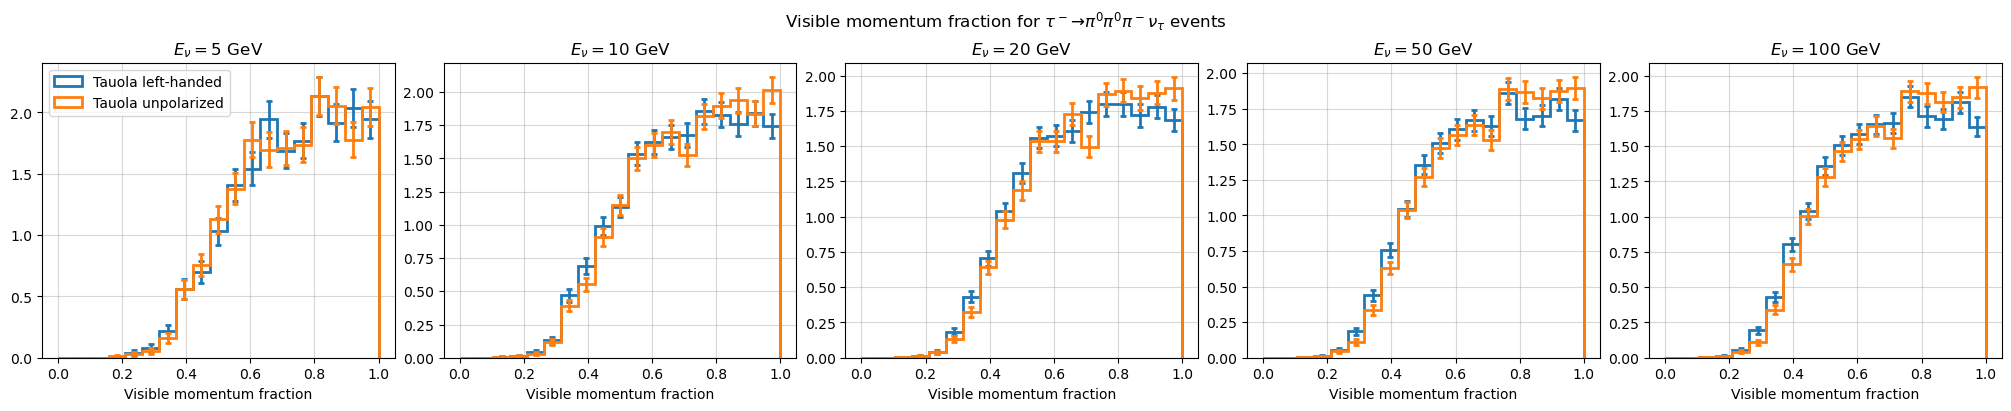

In [169]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pi0_pim_nutau_event, plot_func=visible_momentum_fraction, 
    xlabel="Visible momentum fraction", density=True, errorbar=True,
)

fig.suptitle(r"Visible momentum fraction for $\tau^- \to \pi^0 \pi^0 \pi^- \nu_\tau$ events")

Text(0.5, 0.98, 'Visible energy for $\\tau^- \\to \\pi^0 \\pi^0 \\pi^- \\nu_\\tau$ events')

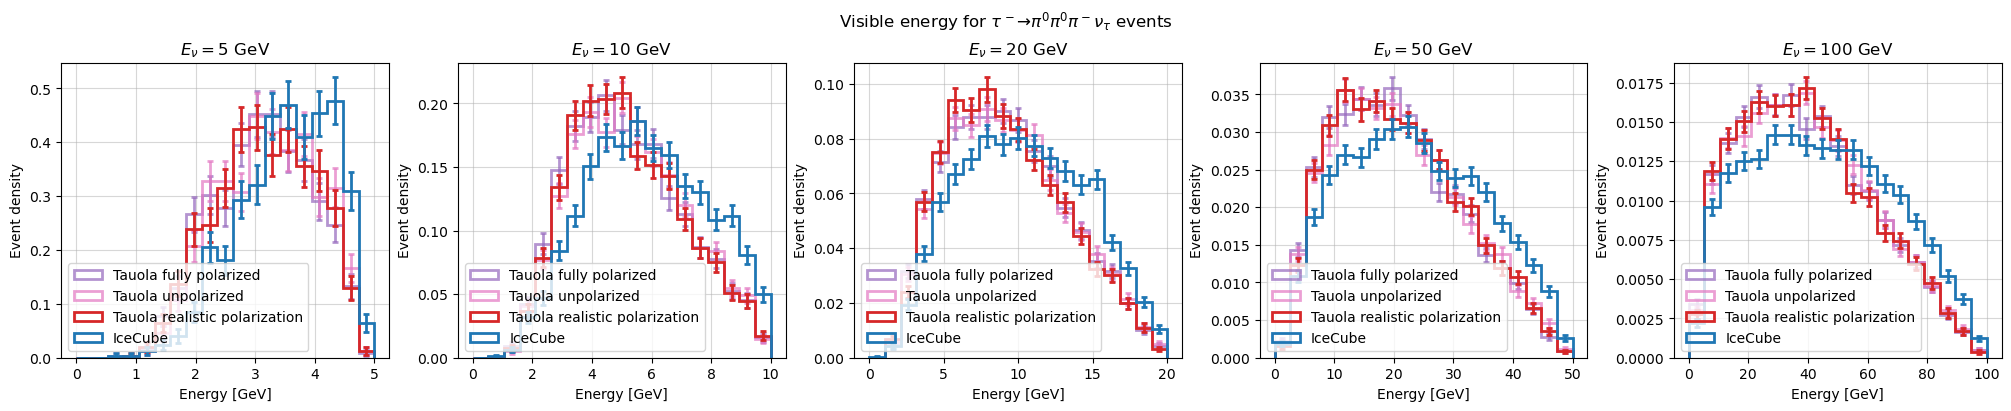

In [30]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, 
    filter_func=is_2pi0_pim_nutau_event, plot_func=tau_visible_e, 
    xlabel="Energy [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors,#title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Visible energy for $\tau^- \to \pi^0 \pi^0 \pi^- \nu_\tau$ events")

Text(0.5, 0.98, 'Visible energy fraction for $\\tau^- \\to \\pi^0 \\pi^0 \\pi^- \\nu_\\tau$ events')

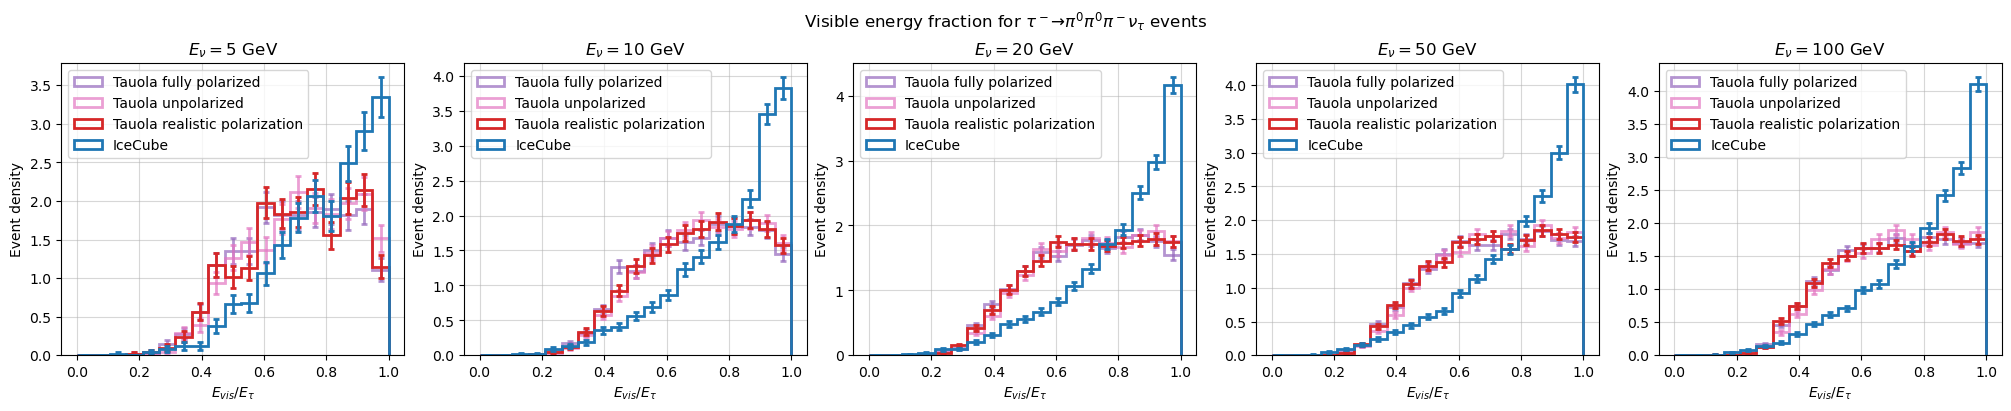

In [31]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pi0_pim_nutau_event, plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_{vis}/E_\tau$", density=True, errorbar=True, ylabel="Event density", colors=colors,#title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Visible energy fraction for $\tau^- \to \pi^0 \pi^0 \pi^- \nu_\tau$ events")

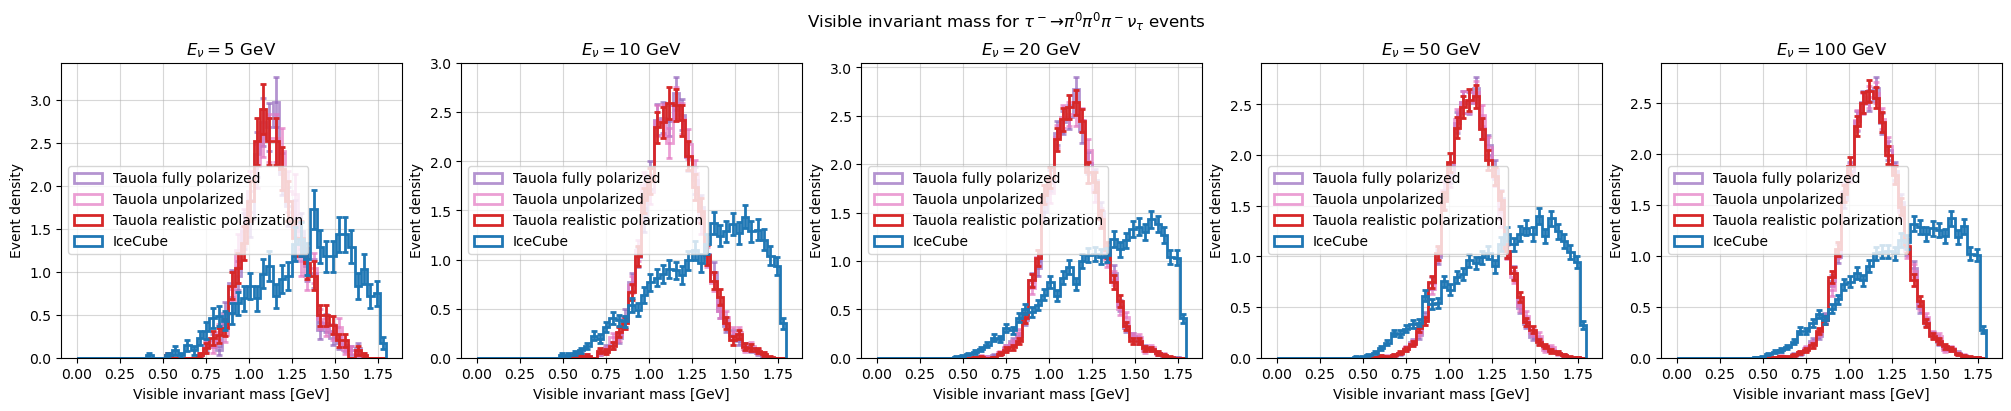

In [32]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1.8, 50) for e in nutau_energies}, 
    filter_func=is_2pi0_pim_nutau_event, plot_func=tau_visible_m, 
    xlabel=r"Visible invariant mass [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors,
)

# axs[-1].axvline(1.020, c="lightgray", ls="--")

fig.suptitle(r"Visible invariant mass for $\tau^- \to \pi^0 \pi^0 \pi^- \nu_\tau$ events")
for ax in axs.flat:
    ax.legend(loc="center left")

Text(0.5, 0.98, '$\\pi^-$ energy fraction for $\\tau^- \\to \\pi^0 \\pi^0 \\pi^- \\nu_\\tau$ events')

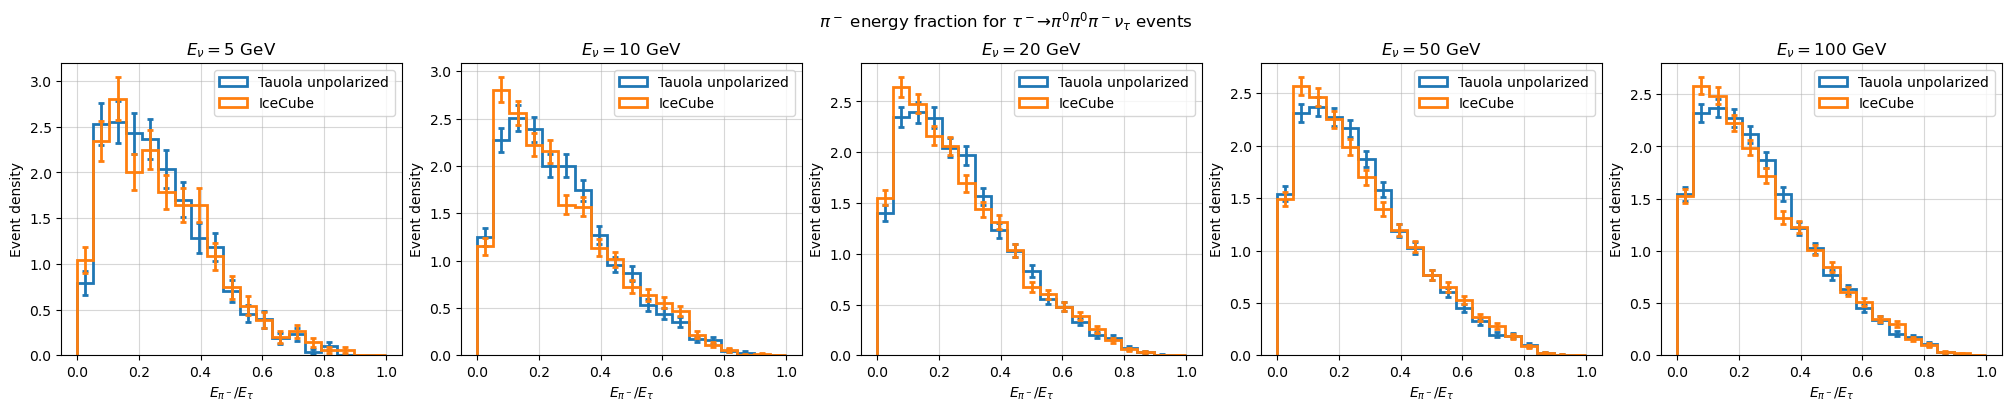

In [95]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pi0_pim_nutau_event, plot_func=lambda df: particle_energy_fraction(df, -211), 
    xlabel=r"$E_{\pi^-}/E_\tau$", density=True, errorbar=True, ylabel="Event density",
)
fig.suptitle(r"$\pi^-$ energy fraction for $\tau^- \to \pi^0 \pi^0 \pi^- \nu_\tau$ events")

Text(0.5, 0.98, '$\\pi_1^0$ energy fraction for $\\tau^- \\to \\pi^0 \\pi^0 \\pi^- \\nu_\\tau$ events')

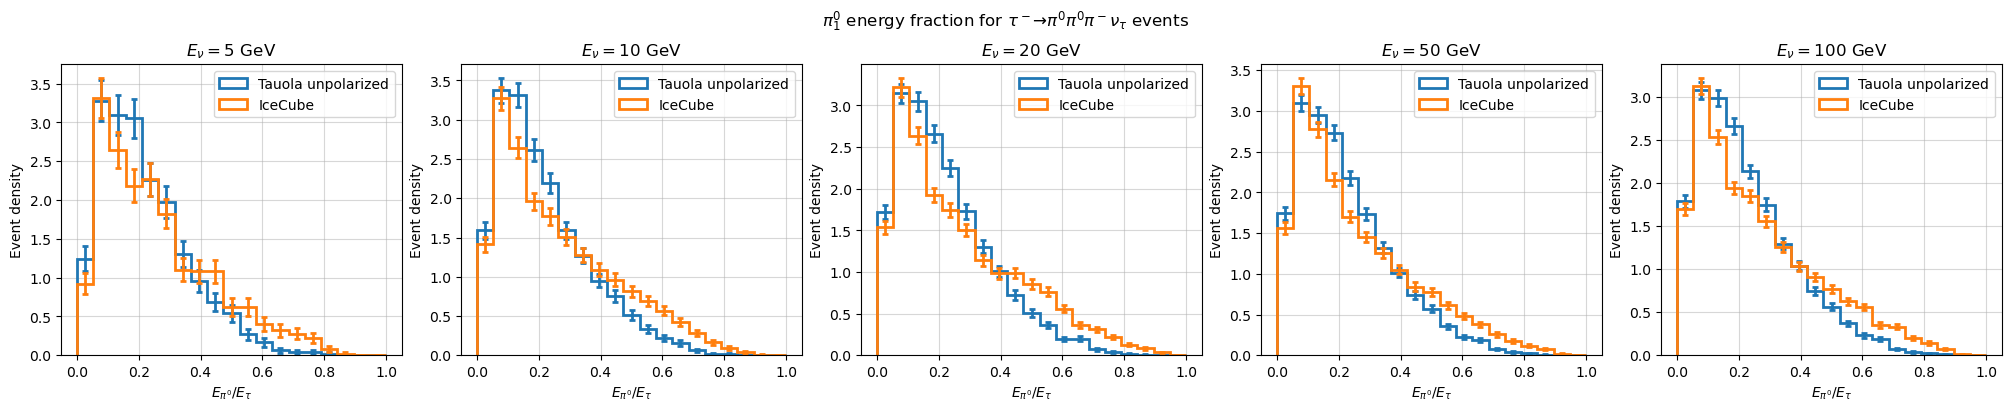

In [96]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pi0_pim_nutau_event, plot_func=lambda df: particle_energy_fraction(df, 111, n=0), 
    xlabel=r"$E_{\pi^0}/E_\tau$", density=True, errorbar=True, ylabel="Event density",
)
fig.suptitle(r"$\pi_1^0$ energy fraction for $\tau^- \to \pi^0 \pi^0 \pi^- \nu_\tau$ events")

Text(0.5, 0.98, '$\\pi_2^0$ energy fraction for $\\tau^- \\to \\pi^0 \\pi^0 \\pi^- \\nu_\\tau$ events')

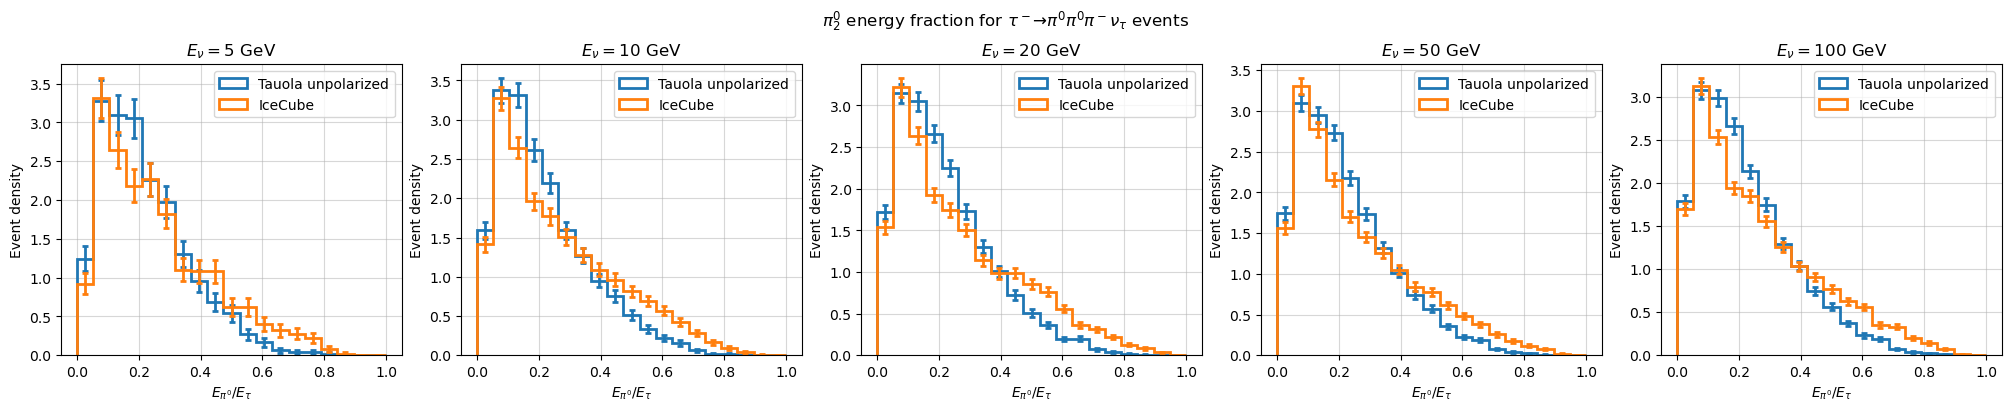

In [97]:
fig, axs = plot_histograms(
    datasets_nopol, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_2pi0_pim_nutau_event, plot_func=lambda df: particle_energy_fraction(df, 111, n=1), 
    xlabel=r"$E_{\pi^0}/E_\tau$", density=True, errorbar=True, ylabel="Event density",
)
fig.suptitle(r"$\pi_2^0$ energy fraction for $\tau^- \to \pi^0 \pi^0 \pi^- \nu_\tau$ events")

Based on this plot and comparing it to the PROPOSAL presentation, it seems like the boosted simulations are the most accurate. Though I do not know how comparable these two plots are.

Text(0.5, 0.98, '$E_e / E_\\tau$ for $\\tau^- \\to \\bar\\nu_e e^- \\nu_\\tau$ events')

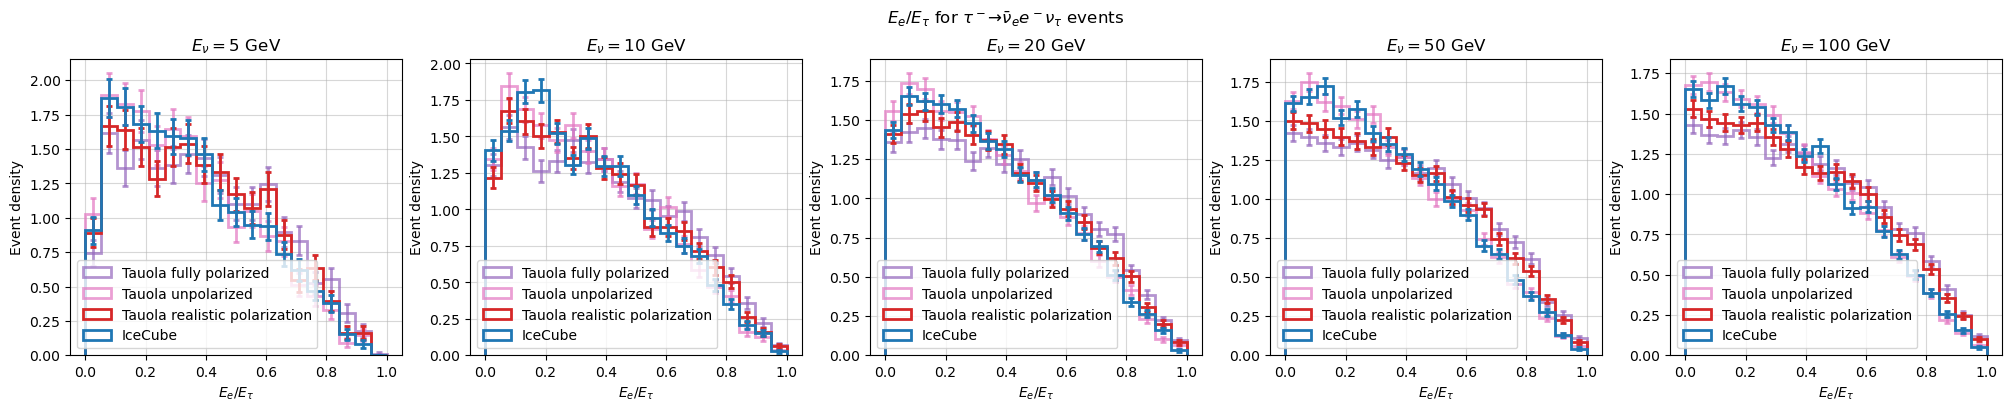

In [33]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_e_nue_nutau_event, plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_e / E_\tau$", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_e / E_\tau$ for $\tau^- \to \bar\nu_e e^- \nu_\tau$ events")

Text(0.5, 0.98, '$E_e$ for $\\tau^- \\to \\bar\\nu_e e^- \\nu_\\tau$ events')

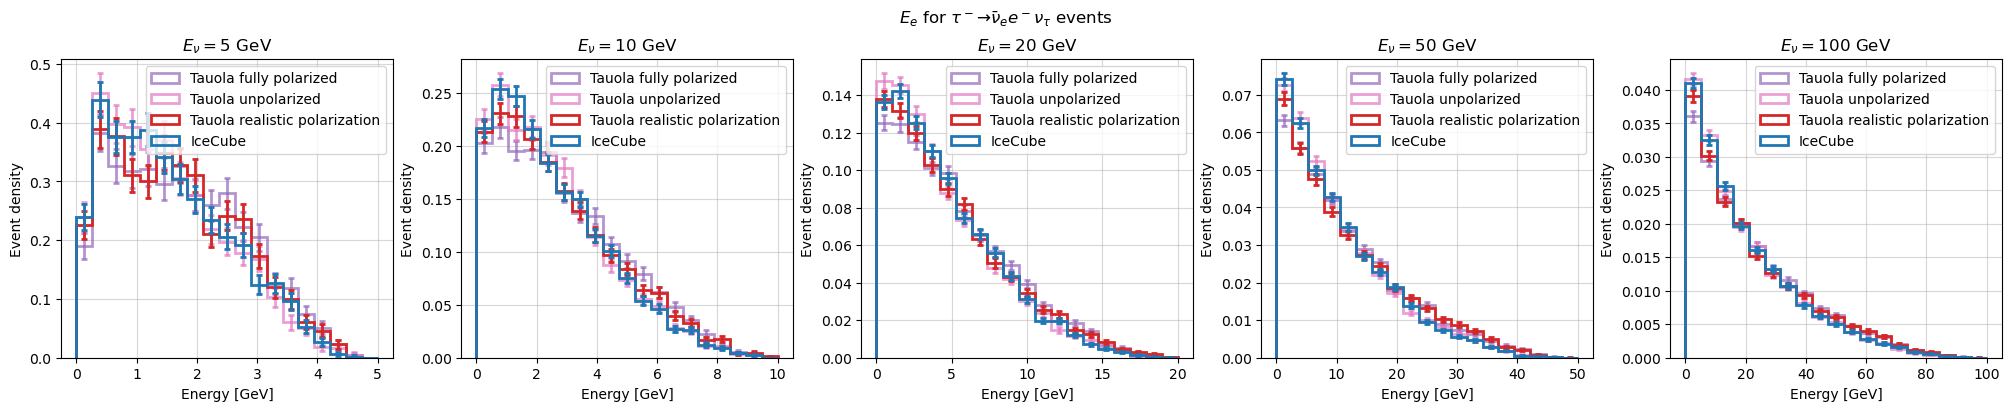

In [38]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, 
    filter_func=is_e_nue_nutau_event, plot_func=tau_visible_e, 
    xlabel=r"Energy [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_e$ for $\tau^- \to \bar\nu_e e^- \nu_\tau$ events")

Text(0.5, 0.98, "Energy of outgoing $\\nu_\\tau$ for leptonic decay modes (recreation of Fig. 58 in 'Tau neutrinos in the Next Decade: from GeV to EeV')")

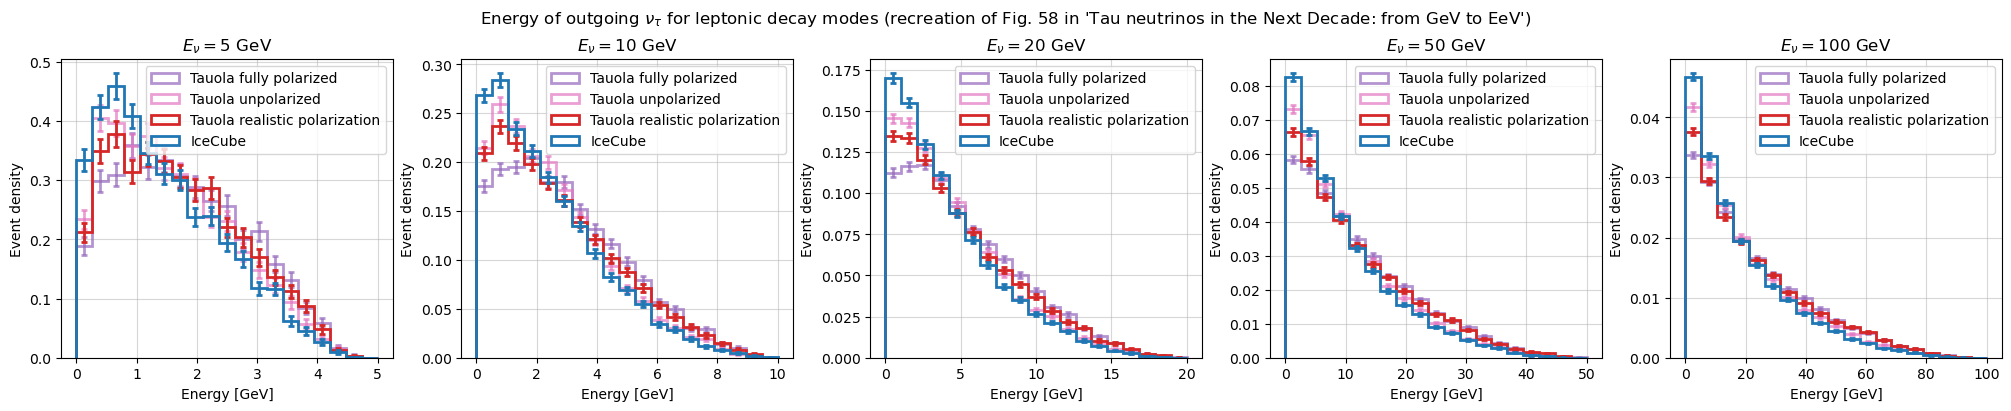

In [43]:
fig, ax = plot_histograms(
    datasets,
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, 
    filter_func=numba.njit(lambda values, index: is_e_nue_nutau_event(values, index) or is_mu_numu_nutau_event(values, index)),
    plot_func=nutau_energy, 
    xlabel=r"Energy [GeV]", density=True, errorbar=True, colors=colors, ylabel="Event density",
)
fig.suptitle(r"Energy of outgoing $\nu_\tau$ for leptonic decay modes (recreation of Fig. 58 in 'Tau neutrinos in the Next Decade: from GeV to EeV')")


The plot above is a recreation of Fig 58 in "Tau Neutrinos in the Next Decade: from GeV to EeV". The plots agree well.

## Track-like events
These are mainly caused by muons

In [44]:
def mu_e_fraction(decay_products):
    mu = decay_products.query("pdg == 13")["E"].values
    tau = decay_products.query("pdg == 15")["E"].values
    assert mu.shape == tau.shape
    # print(mu)
    return mu / tau

# Plot the muon angle relative to the tau direction in the tau rest frame
def muon_angle(decay_products):
    muon = decay_products.query("pdg == 13")
    tau = decay_products.query("pdg == 15")
    tau_vec = vector.array({"E": tau["E"], "px": tau["px"], "py": tau["py"], "pz": tau["pz"]})
    muon_vec = vector.array({"E": muon["E"], "px": muon["px"], "py": muon["py"], "pz": muon["pz"]})
    
    muon_vec_boosted = muon_vec.boostCM_of(tau_vec)
    
    return (muon_vec_boosted.pz / muon_vec_boosted.p)

def muon_pol_angle(decay_products, emax_fraction=0):
    # Plot the muon angle relative to the tau direction in the tau rest frame
    muon = decay_products.query("pdg == 13")
    tau = decay_products.query("pdg == 15")
    tau_vec = vector.array({"E": tau["E"], "px": tau["px"], "py": tau["py"], "pz": tau["pz"]})
    muon_vec = vector.array({"E": muon["E"], "px": muon["px"], "py": muon["py"], "pz": muon["pz"]})
    
    muon_vec_boosted = muon_vec.boostCM_of(tau_vec)
    selected_muons = muon_vec_boosted.E > 1.77682/2 * emax_fraction
    delta_angles = np.zeros(selected_muons.shape)
    # Setting all non-high energy muons to nan. Note: this makes the error bars incorrect
    delta_angles[~selected_muons] = np.nan
    delta_angles[selected_muons] = muon_vec_boosted[selected_muons].deltaangle(
        vector.array({"x": tau.polx.values[selected_muons], "y": tau.poly.values[selected_muons], "z": tau.polz.values[selected_muons]}
        )
    )

    return delta_angles
    #muon_vec_boosted.deltaangle(vector.array({"x": tau.polx.values, "y": tau.poly.values, "z": tau.polz.values}))
    #np.arccos(muon_vec_boosted.px * tau.polx.values + muon_vec_boosted.py * tau.poly.values + muon_vec_boosted.pz * tau.polz.values) / muon_vec_boosted.p)



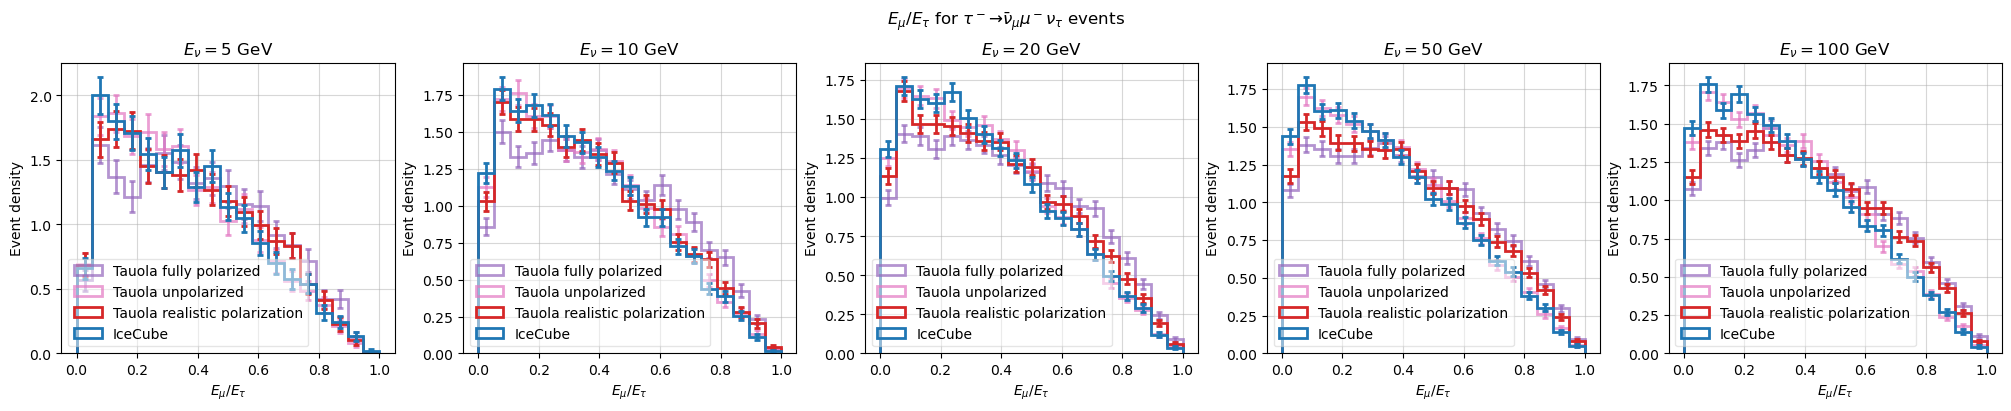

In [45]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_mu_numu_nutau_event, plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_\mu / E_\tau$", density=True, errorbar=True, ylabel="Event density", colors=colors,#title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_\mu / E_\tau$ for $\tau^- \to \bar\nu_\mu \mu^- \nu_\tau$ events")
for ax in axs.flat:
    ax.legend(loc="lower left", framealpha=0.5)

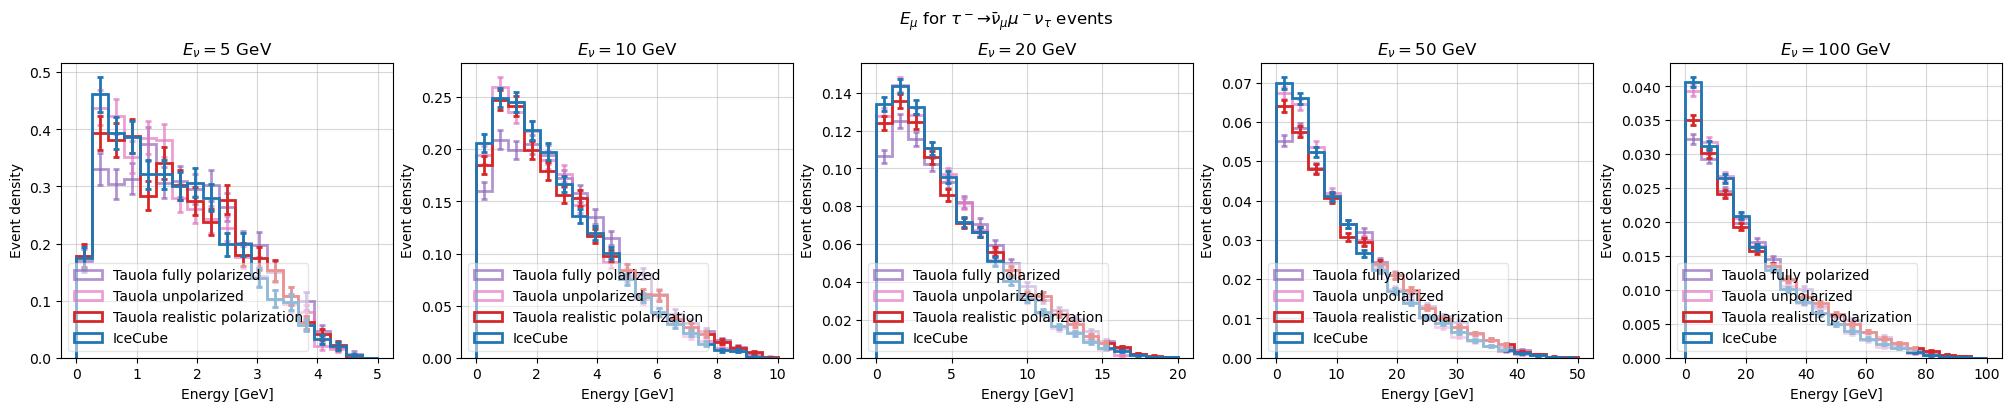

In [46]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, 
    filter_func=is_mu_numu_nutau_event, plot_func=tau_visible_e, 
    xlabel=r"Energy [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors,#title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_\mu$ for $\tau^- \to \bar\nu_\mu \mu^- \nu_\tau$ events")
for ax in axs.flat:
    ax.legend(loc="lower left", framealpha=0.5)

Text(0.5, 0.98, 'Outgoing neutrino energy for $\\tau^- \\to \\bar\\nu_\\mu \\mu^- \\nu_\\tau$ events')

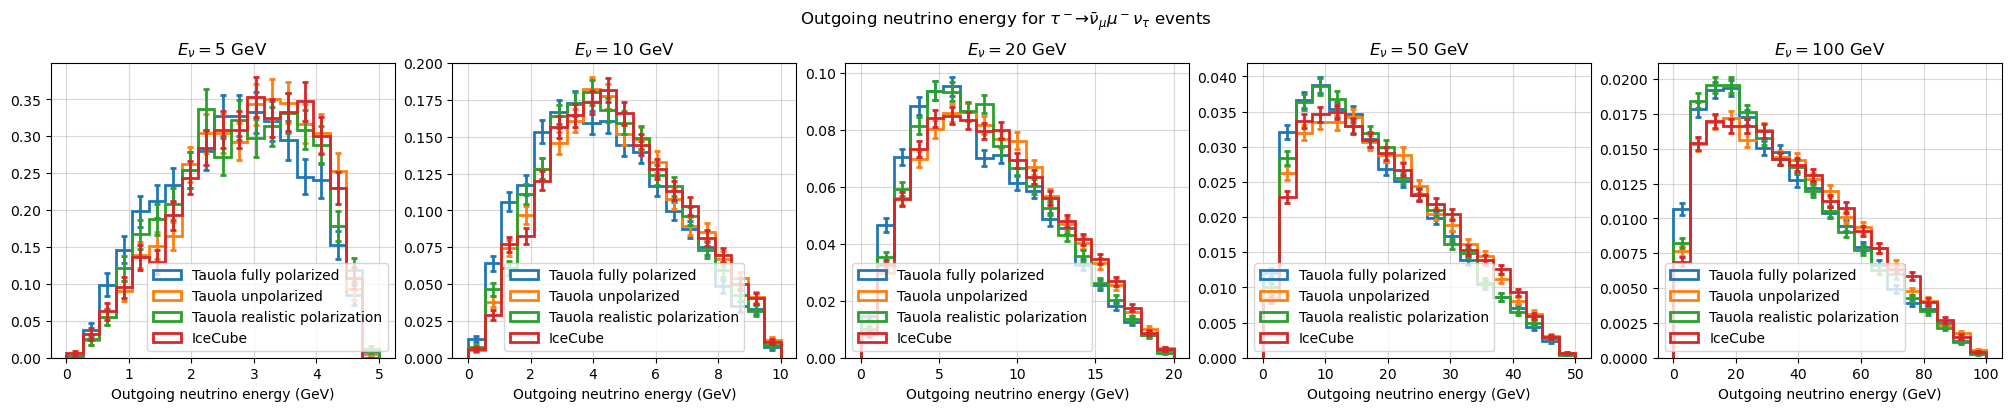

In [47]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, filter_func=is_mu_numu_nutau_event, plot_func=missing_energy,
    xlabel="Outgoing neutrino energy (GeV)", errorbar=True, density=True,
)
fig.suptitle(r"Outgoing neutrino energy for $\tau^- \to \bar\nu_\mu \mu^- \nu_\tau$ events")

Text(0.5, 0.98, 'Muon angle relative to incoming neutrino for $\\tau^- \\to \\bar\\nu_\\mu \\mu^- \\nu_\\tau$ events')

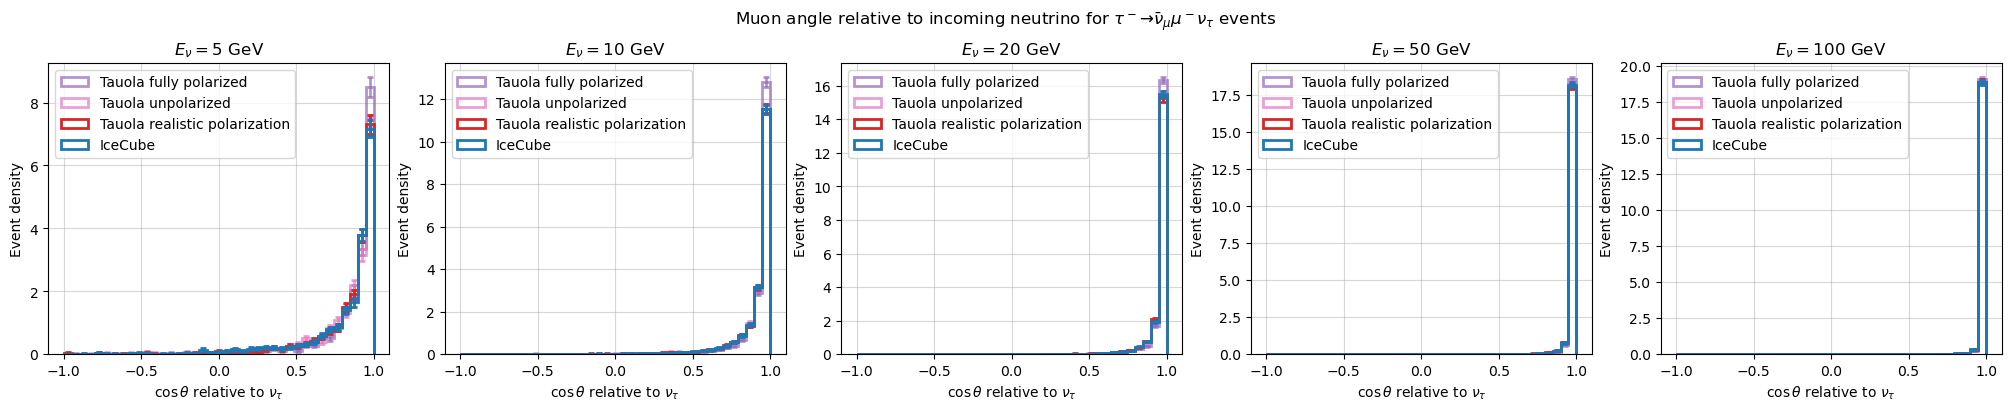

In [49]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 40) for e in nutau_energies}, filter_func=is_mu_numu_nutau_event, plot_func=lambda df: np.cos(visible_theta(df)), 
    xlabel=r"$\cos\theta$ relative to $\nu_\tau$", errorbar=True, density=True, ylabel="Event density", colors=colors,
)
fig.suptitle(r"Muon angle relative to incoming neutrino for $\tau^- \to \bar\nu_\mu \mu^- \nu_\tau$ events")

Text(0.5, 0.98, '$\\theta_\\tau - \\theta_\\mu$ for $\\tau^- \\to \\bar\\nu_\\mu \\mu^- \\nu_\\tau$ events')

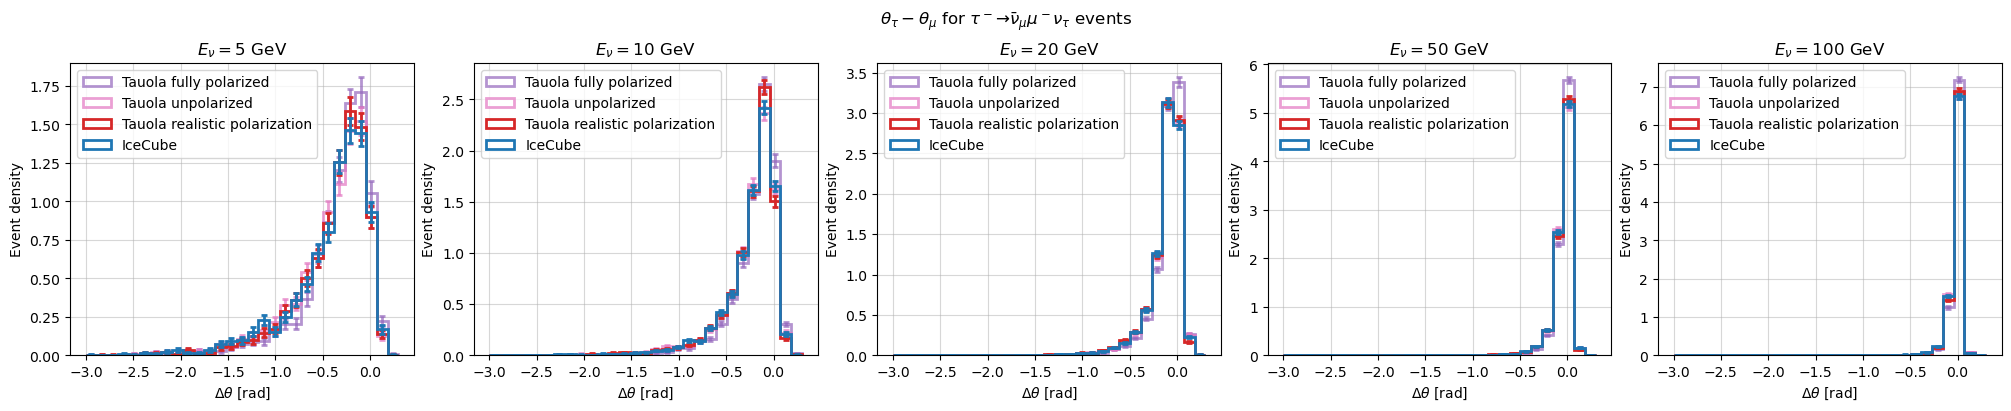

In [54]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-3, 0.3, 30) for e in nutau_energies}, filter_func=is_mu_numu_nutau_event, plot_func=visible_delta_theta_tau, 
    xlabel=r"$\Delta\theta$ [rad]", errorbar=True, density=True, ylabel="Event density", colors=colors,
)
fig.suptitle(r"$\theta_\tau - \theta_\mu$ for $\tau^- \to \bar\nu_\mu \mu^- \nu_\tau$ events")

In [84]:
visible_delta_theta_tau(datasets["Tauola unpolarized"][5]).max()

0.2722944323793682

## Angles in rest frame
These plots are to confirm that the polarization is correct.

In [57]:
def visible_tau_rest_frame_costheta(decay_products):
    # Plot the muon angle relative to the tau direction in the tau rest frame
    tau = decay_products.query("pdg == 15").set_index("event_num")[["E", "px", "py", "pz"]]
    
    visible_decay_products = decay_products.groupby("event_num").nth[3:].query("(pdg.abs() != 12) and (pdg.abs() != 14) and (pdg.abs() != 16)")
    visible = visible_decay_products.groupby("event_num")[["E", "px", "py", "pz"]].sum()
    
    tau_vec = vector.array({"E": tau["E"], "px": tau["px"], "py": tau["py"], "pz": tau["pz"]})
    visible_vec = vector.array({"E": visible["E"], "px": visible["px"], "py": visible["py"], "pz": visible["pz"]})
    
    visible_vec_boosted = visible_vec.boostCM_of(tau_vec)
    
    return np.cos(visible_vec_boosted.theta)
    
    # selected_events = visible_vec_boosted.E > 1.7768/2
    # delta_angles = np.zeros(selected_events.shape)
    # # Setting all non-high energy muons to nan. Note: this makes the error bars incorrect
    # delta_angles[~selected_events] = np.nan
    # delta_angles[selected_events] = visible_vec_boosted[selected_events].deltaangle(tau_vec[selected_events])
    # return delta_angles
    #visible_vec_boosted.deltaangle(vector.array({"x": tau.polx.values, "y": tau.poly.values, "z": tau.polz.values}))
    #np.arccos(visible_vec_boosted.px * tau.polx.values + visible_vec_boosted.py * tau.poly.values + visible_vec_boosted.pz * tau.polz.values) / visible_vec_boosted.p)


def visible_tau_rest_frame_costheta_particle(decay_products, pdg):
    # Plot the muon angle relative to the tau direction in the tau rest frame
    tau = decay_products.query("pdg == 15").set_index("event_num")[["E", "px", "py", "pz"]]
    
    visible_decay_products = decay_products.groupby("event_num").nth[3:].query("(pdg.abs() != 12) and (pdg.abs() != 14) and (pdg.abs() != 16)")
    visible = visible_decay_products.groupby("event_num")[["E", "px", "py", "pz"]].sum()
    
    tau_vec = vector.array({"E": tau["E"], "px": tau["px"], "py": tau["py"], "pz": tau["pz"]})
    visible_vec = vector.array({"E": visible["E"], "px": visible["px"], "py": visible["py"], "pz": visible["pz"]})
    
    visible_vec_boosted = visible_vec.boostCM_of(tau_vec)
    
    return np.cos(visible_vec_boosted.theta)

Text(0.5, 0.98, 'Muon angle in tau rest frame for $\\tau^- \\to \\bar\\nu_\\mu \\mu^- \\nu_\\tau$ events')

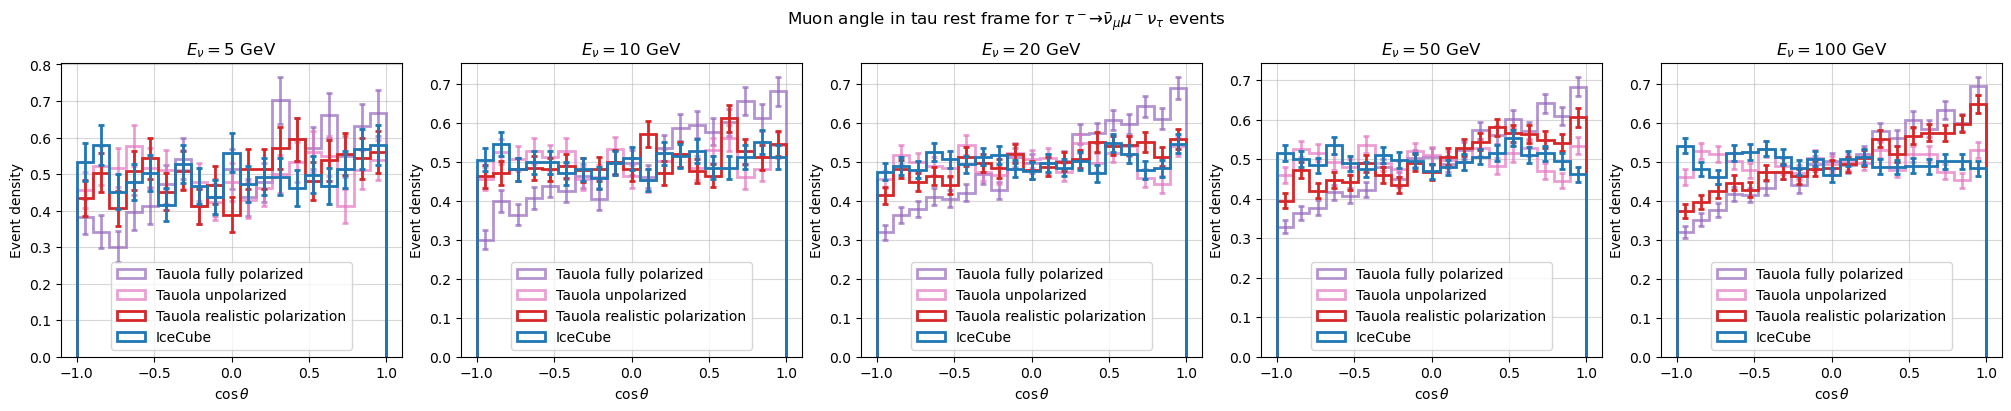

In [58]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, filter_func=is_mu_numu_nutau_event, plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$\cos\theta$", errorbar=True, density=True, ylabel="Event density", colors=colors,# title_label=r"$E_\tau = {e}$ GeV",
)
fig.suptitle(r"Muon angle in tau rest frame for $\tau^- \to \bar\nu_\mu \mu^- \nu_\tau$ events")

Text(0.5, 0.98, 'Muon energy in tau rest frame for $\\tau^- \\to \\bar\\nu_\\mu \\mu^- \\nu_\\tau$ events')

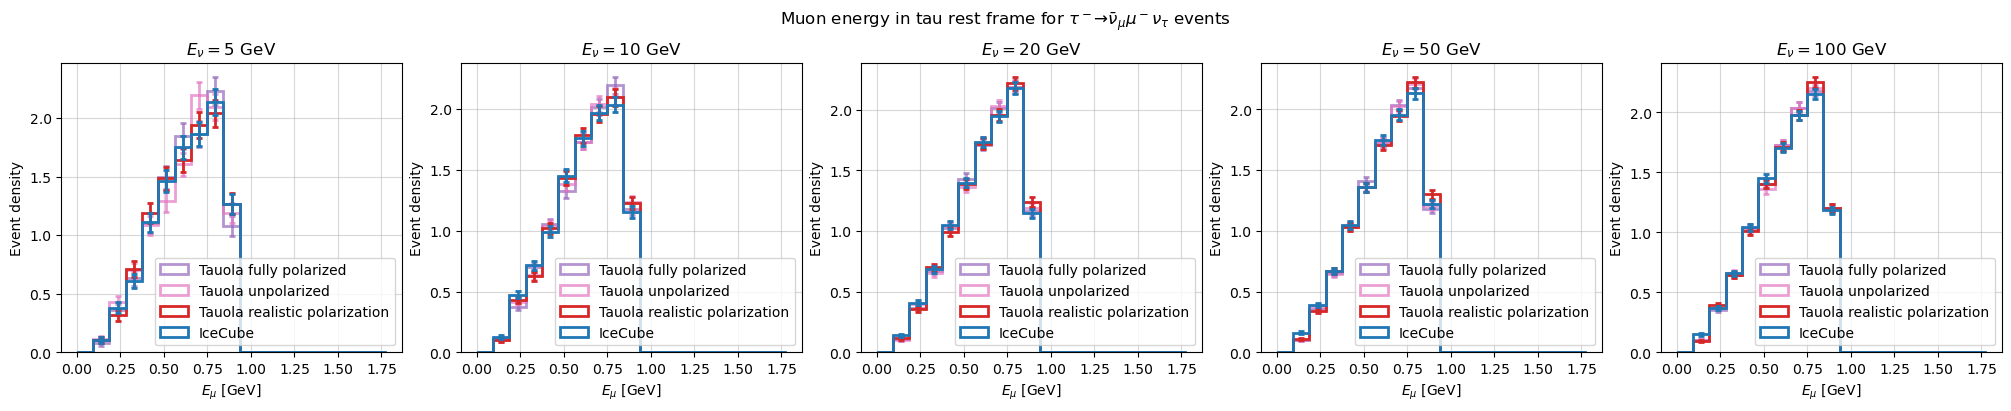

In [61]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1.777, 20) for e in nutau_energies}, filter_func=is_mu_numu_nutau_event, plot_func=visible_e_tau_rest_frame, 
    xlabel=r"$E_\mu$ [GeV]", errorbar=True, density=True, ylabel="Event density", colors=colors,# title_label=r"$E_\tau = {e}$ GeV",
)
fig.suptitle(r"Muon energy in tau rest frame for $\tau^- \to \bar\nu_\mu \mu^- \nu_\tau$ events")

Text(0.5, 0.98, 'Electron angle in $\\tau$ rest frame for $\\tau^- \\to \\bar\\nu_e e^- \\nu_\\tau$ events')

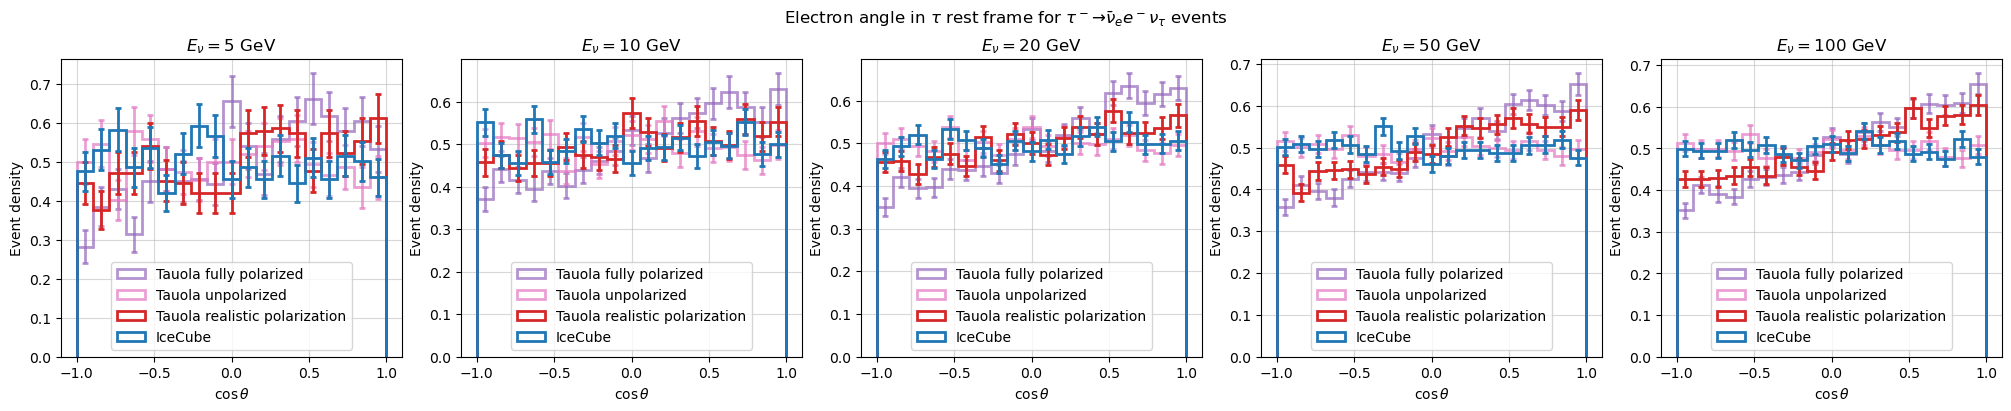

In [62]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, 
    filter_func=is_e_nue_nutau_event, plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, ylabel="Event density", colors=colors,# title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Electron angle in $\tau$ rest frame for $\tau^- \to \bar\nu_e e^- \nu_\tau$ events")

Text(0.5, 0.98, 'Electron angle in $\\tau$ rest frame for $\\tau^- \\to \\bar\\nu_e e^- \\nu_\\tau$ events')

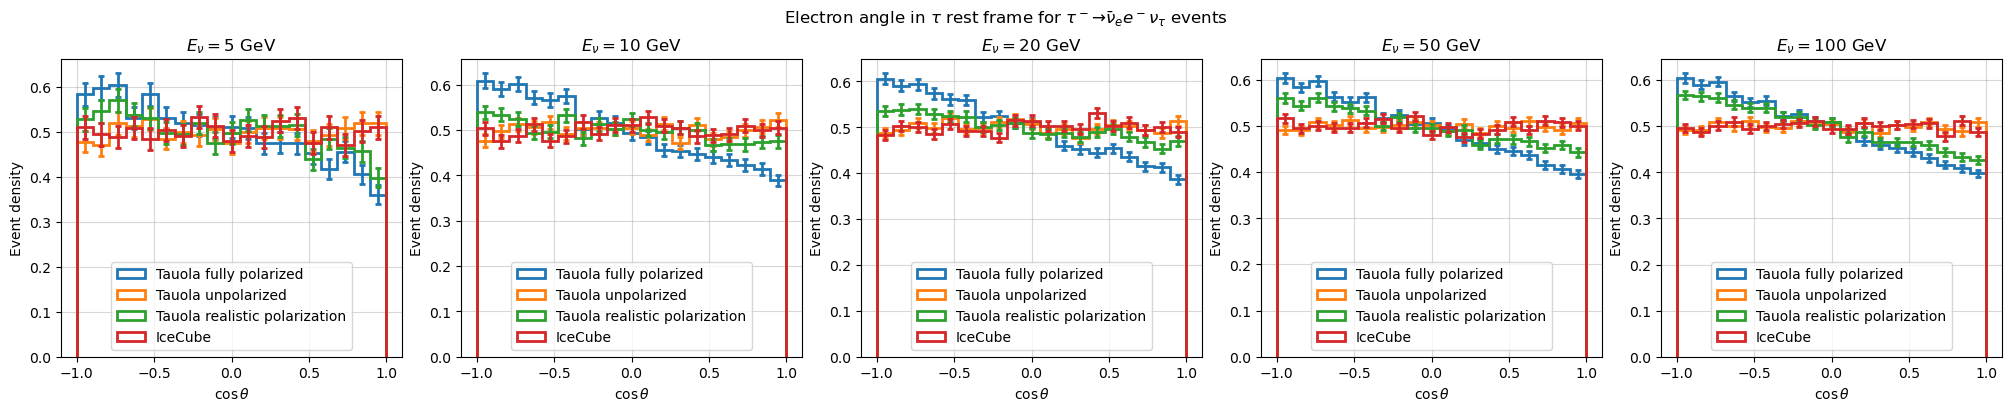

In [63]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, 
    filter_func=numba.njit(lambda values, index: not is_mu_numu_nutau_event(values, index)), plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, ylabel="Event density",# title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Electron angle in $\tau$ rest frame for $\tau^- \to \bar\nu_e e^- \nu_\tau$ events")

Text(0.5, 0.98, '$\\cos\\theta$ of $\\pi^-$ in tau rest frame for $\\tau^- \\to  \\pi^- \\nu_\\tau$ events')

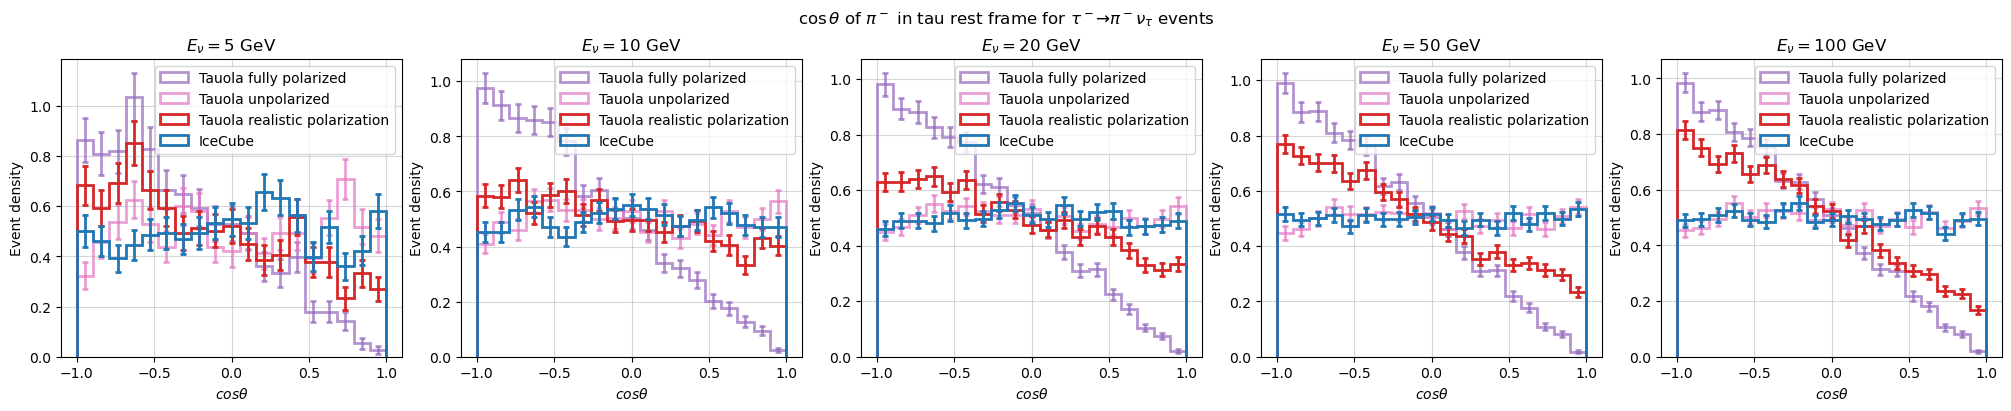

In [64]:
fig, axs = plot_histograms(
    datasets,
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, filter_func=is_pion_nutau_event, plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$cos\theta$", errorbar=True, density=True, ylabel="Event density", colors=colors,#title_label=r"$E_\tau = {e}$ GeV",
)
fig.suptitle(r"$\cos\theta$ of $\pi^-$ in tau rest frame for $\tau^- \to  \pi^- \nu_\tau$ events")

Text(0.5, 0.98, '$\\cos\\theta$ of $\\pi^-$ in tau rest frame for $\\tau^- \\to  \\pi^- \\pi^0 \\nu_\\tau$ events')

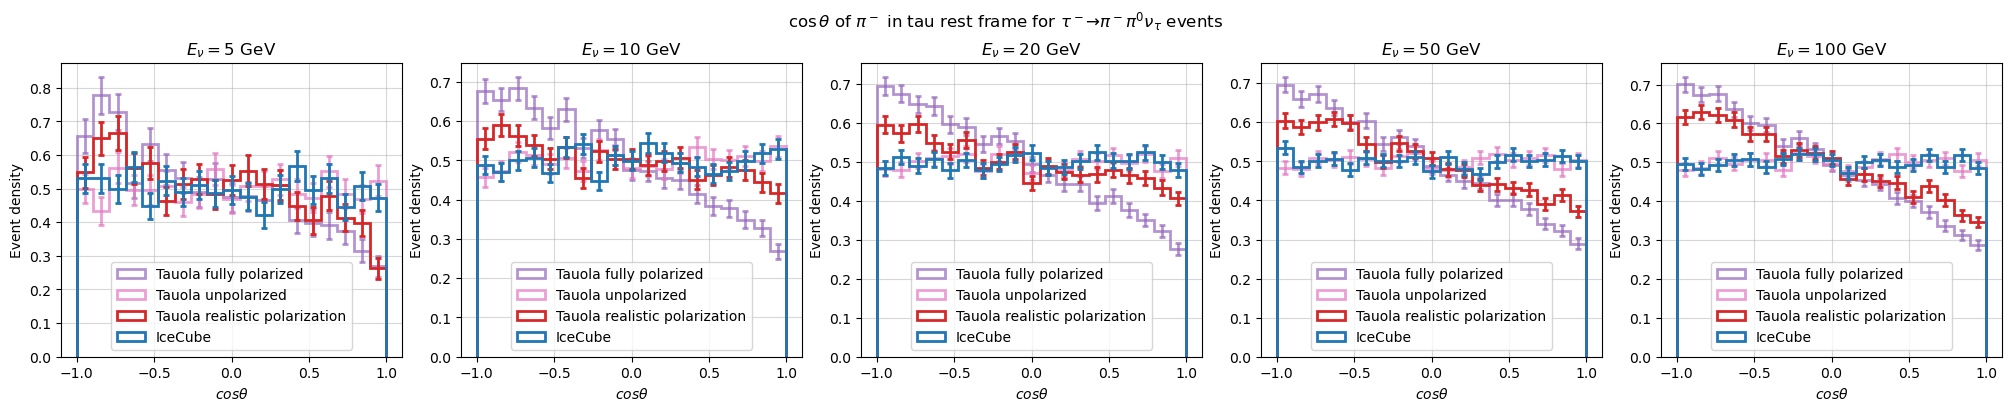

In [65]:
fig, axs = plot_histograms(
    datasets,
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, filter_func=is_pi0_pim_nutau_event, plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$cos\theta$", errorbar=True, density=True, ylabel="Event density", colors=colors,#title_label=r"$E_\tau = {e}$ GeV",
)
fig.suptitle(r"$\cos\theta$ of $\pi^-$ in tau rest frame for $\tau^- \to  \pi^- \pi^0 \nu_\tau$ events")

Text(0.5, 0.98, '$\\cos\\theta$ of $\\pi^-$ in tau rest frame for $\\tau^- \\to  \\pi^- \\pi^- \\pi^+ \\nu_\\tau$ events')

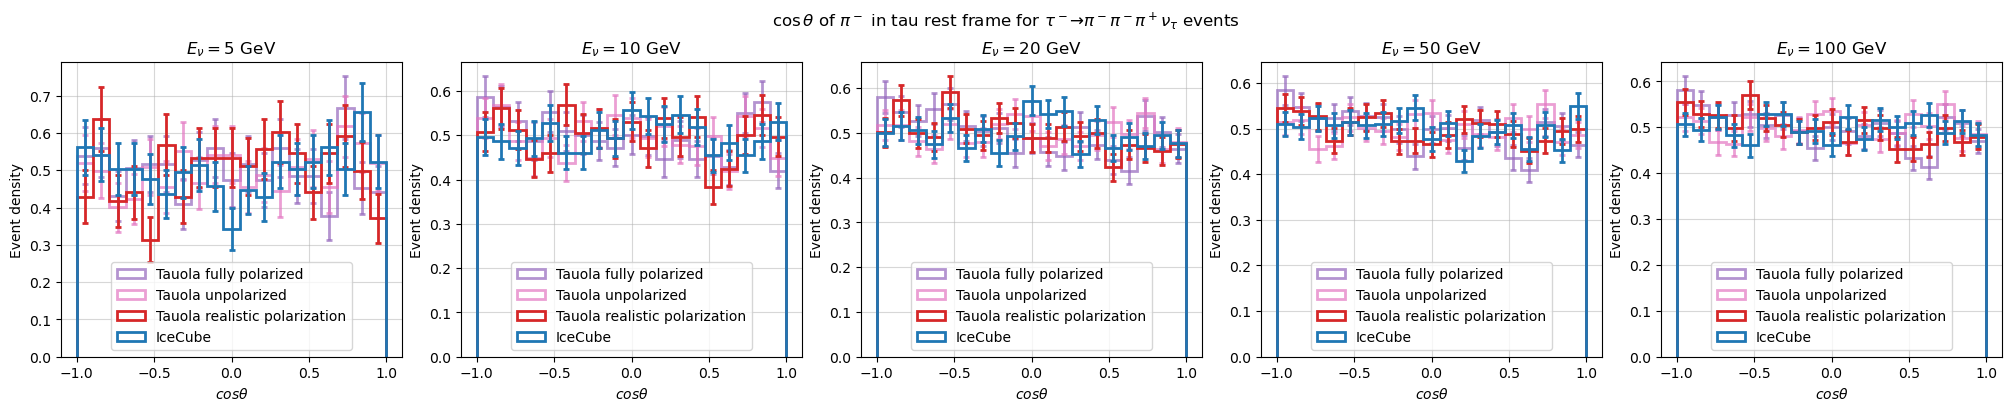

In [66]:
fig, axs = plot_histograms(
    datasets,
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, filter_func=is_2pim_pip_nutau_event, plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$cos\theta$", errorbar=True, density=True, ylabel="Event density", colors=colors,#title_label=r"$E_\tau = {e}$ GeV",
)
fig.suptitle(r"$\cos\theta$ of $\pi^-$ in tau rest frame for $\tau^- \to  \pi^- \pi^- \pi^+ \nu_\tau$ events")

Text(0.5, 0.98, '$\\cos\\theta$ of $\\pi^-$ in tau rest frame for $\\tau^- \\to  \\pi^- \\pi^0 \\pi^0 \\nu_\\tau$ events')

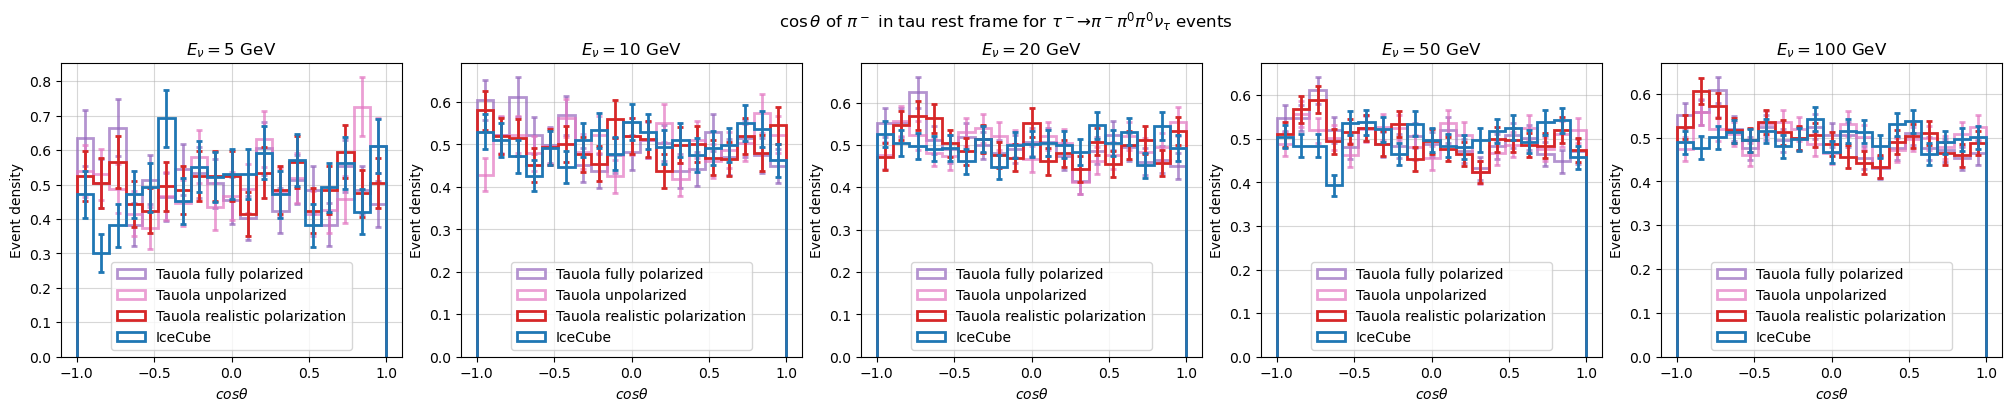

In [67]:
fig, axs = plot_histograms(
    datasets,
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, filter_func=is_2pi0_pim_nutau_event, plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$cos\theta$", errorbar=True, density=True, ylabel="Event density", colors=colors,#title_label=r"$E_\tau = {e}$ GeV",
)
fig.suptitle(r"$\cos\theta$ of $\pi^-$ in tau rest frame for $\tau^- \to  \pi^- \pi^0 \pi^0 \nu_\tau$ events")

## Tauola validation
Compare Tauola distributions to what we expect from theory to confirm that Tauola works as intended.

In [60]:
def visible_e_tau_rest_frame(df):
    # Return the visible energy in the tau rest frame
    visible_decay_products = df.groupby("event_num").nth[3:].query("(pdg.abs() != 12) and (pdg.abs() != 14) and (pdg.abs() != 16)")
    tau = df.query("pdg == 15").set_index("event_num")[["E", "px", "py", "pz"]]
    visible = visible_decay_products.groupby("event_num")[["E", "px", "py", "pz"]].sum()
    
    tau_vec = vector.array({"E": tau["E"], "px": tau["px"], "py": tau["py"], "pz": tau["pz"]})
    visible_vec = vector.array({"E": visible["E"], "px": visible["px"], "py": visible["py"], "pz": visible["pz"]})
    
    visible_boosted = visible_vec.boostCM_of(tau_vec)
    
    return visible_boosted.E


def plot_2d_histograms(datasets: dict[str, dict[int, pd.DataFrame]], /, *,
    binsx: dict[int, np.ndarray], binsy: dict[int, np.ndarray], filter_func: callable, plot_func: callable, title_label: str = "$E_\\nu = {e}$ GeV", **kwargs):

    d1 = list(datasets.values())[0]
    
    fig = plt.figure(figsize=(4*len(d1), 4*len(datasets)), layout="constrained")
    subfigs = fig.subfigures(nrows=len(datasets), wspace=0.07)

    axs = [sf.subplots(ncols=len(d1)) for sf in subfigs]

    for i, (e, *ax_col) in enumerate(zip(d1, *axs)):
        events_to_plot = {}
        for i, (label, df) in enumerate(datasets.items()):
            # Only select a certain decay mode
            selected_events = filter_events(df[e], "pdg", filter_func, engine="numba")
        
            bx = binsx[e]
            by = binsy[e]
        
            ax_col[i].hist2d(*plot_func(selected_events), bins=[bx, by])

        for ax in ax_col:
            ax.set(title=title_label.format(e=e), **kwargs)
    
    return fig, subfigs, axs

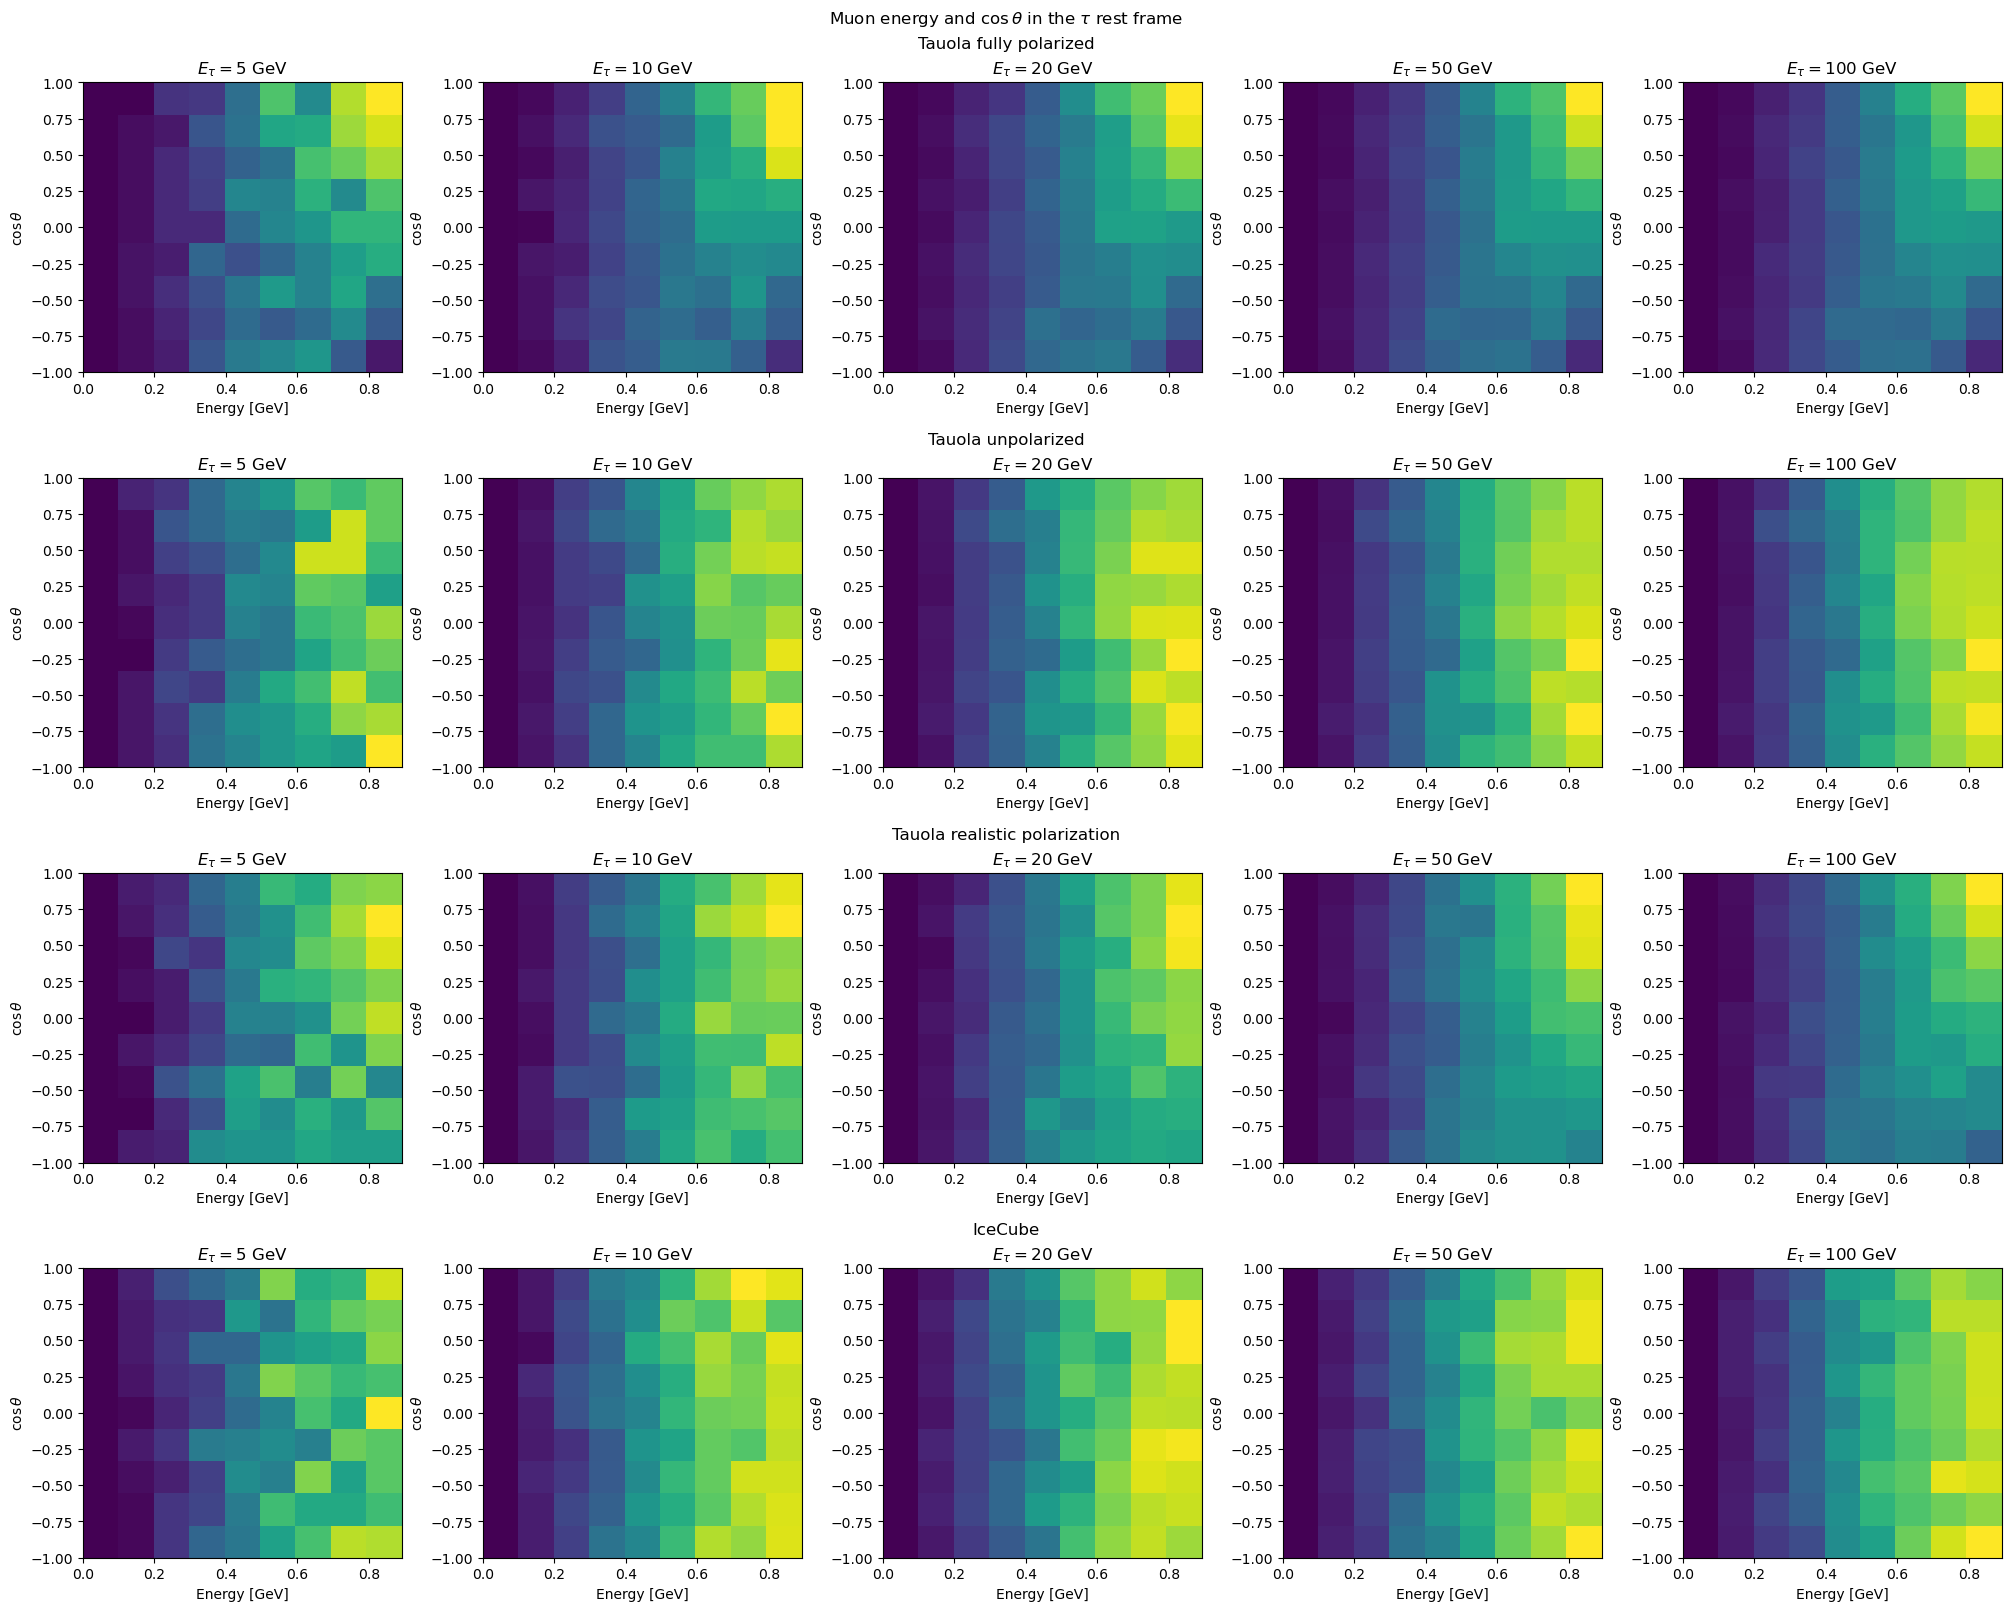

In [69]:
m_mu = 105.658e-3 # GeV
m_tau = 1.77682 # GeV
Emax = (m_mu**2 + m_tau**2) / (2*m_tau) # The maximum energy that the muon can have in the tau rest frame

fig, subfigs, axs = plot_2d_histograms(
    datasets, 
    binsx={e: np.linspace(0, Emax, 10) for e in nutau_energies}, 
    binsy={e: np.linspace(-1, 1, 10) for e in nutau_energies}, 
    filter_func=is_mu_numu_nutau_event, 
    plot_func=lambda df: (visible_e_tau_rest_frame(df), visible_tau_rest_frame_costheta(df)), 
    title_label=r"$E_\tau = {e}$ GeV", ylabel=r"$\cos\theta$", xlabel="Energy [GeV]",
)
fig.suptitle(r"Muon energy and $\cos\theta$ in the $\tau$ rest frame")
for sf, title in zip(subfigs, datasets.keys()):
    sf.suptitle(title)

Text(0.5, 0.98, 'Tauola unpolarized')

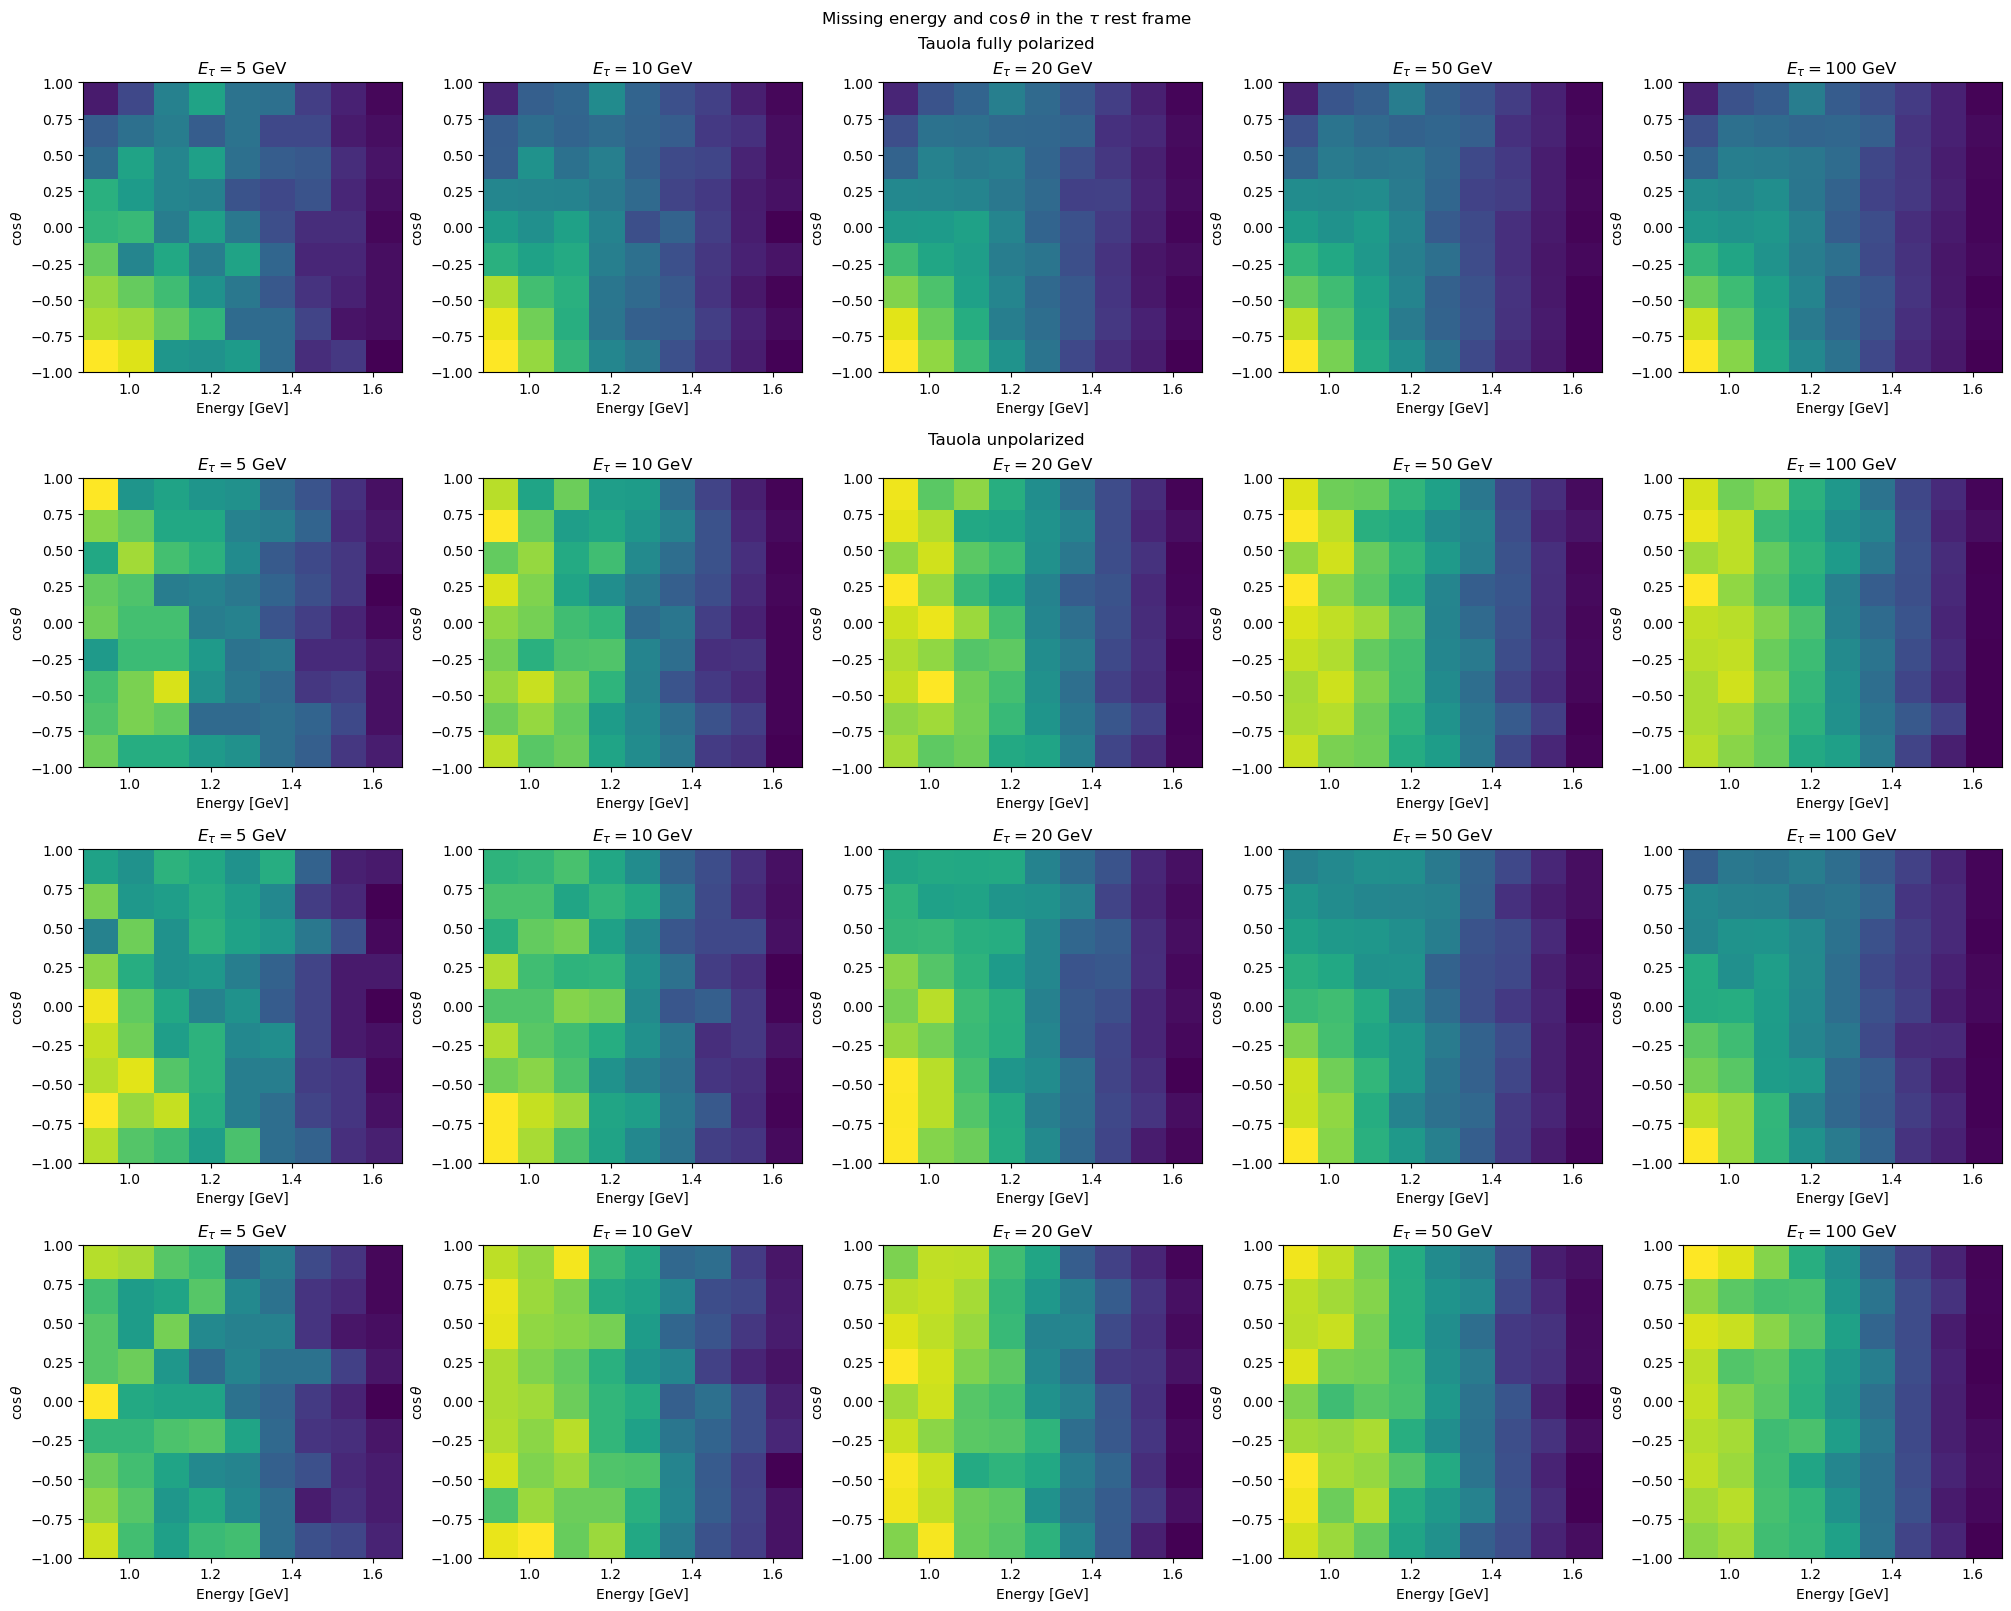

In [71]:
def missing_e_tau_rest_frame(df):
    # Return the nutau energy in the tau rest frame
    tau = df.query("pdg == 15").set_index("event_num")[["E", "px", "py", "pz"]]
    nutau = df.groupby("event_num").nth[3:].query("pdg.abs() == 16 or pdg.abs() == 14").groupby("event_num").sum()
    
    tau_vec = vector.array({"E": tau["E"], "px": tau["px"], "py": tau["py"], "pz": tau["pz"]})
    nutau_vec = vector.array({"E": nutau["E"], "px": nutau["px"], "py": nutau["py"], "pz": nutau["pz"]})
    
    return nutau_vec.boostCM_of(tau_vec).E


def missing_costheta_tau_rest_frame(df):
    # Return the nutau theta in the tau rest frame
    tau = df.query("pdg == 15").set_index("event_num")[["E", "px", "py", "pz"]]
    nutau = df.groupby("event_num").nth[3:].query("pdg.abs() == 16 or pdg.abs() == 14").groupby("event_num").sum()

    tau_vec = vector.array({"E": tau["E"], "px": tau["px"], "py": tau["py"], "pz": tau["pz"]})
    nutau_vec = vector.array({"E": nutau["E"], "px": nutau["px"], "py": nutau["py"], "pz": nutau["pz"]})
    
    return np.cos(nutau_vec.boostCM_of(tau_vec).theta)
    

Emin_missing = m_tau - Emax
Emax_missing = m_tau - m_mu

fig, subfigs, axs = plot_2d_histograms(
    datasets, 
    binsx={e: np.linspace(Emin_missing, Emax_missing, 10) for e in nutau_energies}, 
    binsy={e: np.linspace(-1, 1, 10) for e in nutau_energies}, 
    filter_func=is_mu_numu_nutau_event, 
    plot_func=lambda df: (missing_e_tau_rest_frame(df), missing_costheta_tau_rest_frame(df)), 
    title_label=r"$E_\tau = {e}$ GeV", ylabel=r"$\cos\theta$", xlabel="Energy [GeV]",
)
fig.suptitle(r"Missing energy and $\cos\theta$ in the $\tau$ rest frame")
subfigs[0].suptitle(list(datasets.keys())[0])
subfigs[1].suptitle(list(datasets.keys())[1])

This looks like the opposite of the last figure, which is good, since the energies and angles should be inverted.

In [53]:
for l, d in datasets_tau.items():
    df = filter_events(d[m_tau], "pdg", is_pion_nutau_event, engine="numba")
    print(l, df["event_num"].nunique())

Tauola fully left-handed 11165
Tauola unpolarized 11171
IceCube 121


In [72]:
# plt.rcParams.update({"font.size": 12})
fig, axs = plot_histograms(
    datasets_tau, 
    bins={e: np.linspace(-1, 1, 40) for e in nutau_energies}, 
    filter_func=is_pion_nutau_event, plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, ylabel="Event density", colors=colors_tau, title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Pion $\cos\theta$ in $\tau$ rest frame for $\tau\to\pi^-\nu_\tau$ events")

P = -1
theta_range = np.linspace(-1, 1, 100)
axs[0].plot(theta_range, 1/2 * (1 + P * theta_range), label="Theoretical left-handed", lw=3, linestyle="--", c="k")
P = 0
axs[0].plot(theta_range, 1/2 * (1 + P * theta_range), label="Theoretical unpolarized", lw=3, linestyle="-", c="k")
# Show legend where the background alpha is 0.1
axs[0].legend(fontsize=10)

NameError: name 'datasets_tau' is not defined

Text(0.5, 0.98, '$\\mu$ $\\cos\\theta$ in $\\tau$ rest frame for $\\tau\\to\\mu^-\\nu_\\mu\\nu_\\tau$ events')

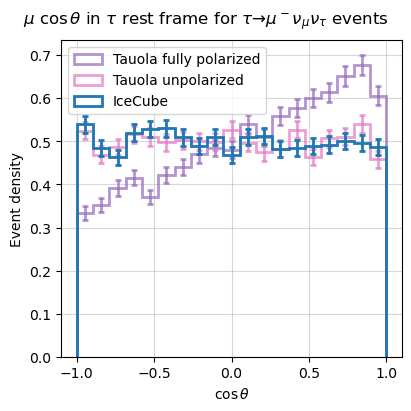

In [40]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, 
    filter_func=is_mu_numu_nutau_event, plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, ylabel="Event density", colors=colors, title_label="", #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$\mu$ $\cos\theta$ in $\tau$ rest frame for $\tau\to\mu^-\nu_\mu\nu_\tau$ events")

Text(0.5, 0.98, '$E_\\mu$ in $\\tau$ rest frame for $\\tau\\to\\mu^-\\nu_\\mu\\nu_\\tau$ events')

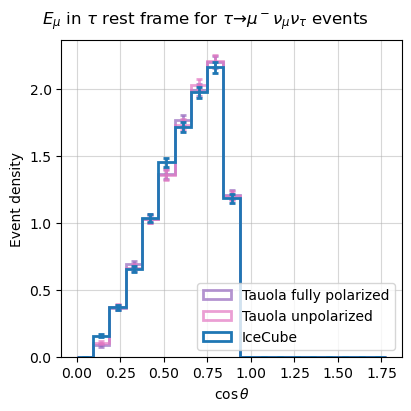

In [41]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1.777, 20) for e in nutau_energies}, 
    filter_func=is_mu_numu_nutau_event, plot_func=visible_e_tau_rest_frame, 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, ylabel="Event density", colors=colors, title_label="", #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_\mu$ in $\tau$ rest frame for $\tau\to\mu^-\nu_\mu\nu_\tau$ events")

Text(0.5, 0.98, '$\\mu$ $\\cos\\theta$ in $\\tau$ rest frame for $\\tau\\to\\mu^-\\nu_\\mu\\nu_\\tau$ events')

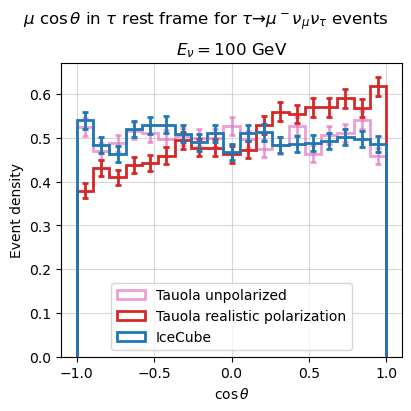

In [ ]:
# plt.rcParams.update({"font.size": 12})
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, 
    filter_func=is_mu_numu_nutau_event, plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$\mu$ $\cos\theta$ in $\tau$ rest frame for $\tau\to\mu^-\nu_\mu\nu_\tau$ events")

This plot looks exactly like it should, which is good! See [this paper, eq 2.1](https://www.sciencedirect.com/science/article/pii/055032139390045Q)

In [19]:
selected_events = filter_events(datasets_tau["Tauola fully left-handed"][m_tau], "pdg", is_mu_numu_nutau_event, engine="numba")

tau_df = selected_events.query("pdg == 15")
taus = vector.array({"E": tau_df["E"], "px": tau_df["px"], "py": tau_df["py"], "pz": tau_df["pz"]})

nutau_df = selected_events.groupby("event_num").nth[3:].query("pdg == 16")
assert np.all(tau_df["event_num"].values == nutau_df["event_num"].values)

nutaus = vector.array({"E": nutau_df["E"], "px": nutau_df["px"], "py": nutau_df["py"], "pz": nutau_df["pz"]})

mu_df = selected_events.query("pdg == 13")
assert np.all(tau_df["event_num"].values == mu_df["event_num"].values)

mus = vector.array({"E": mu_df["E"], "px": mu_df["px"], "py": mu_df["py"], "pz": mu_df["pz"]})

mus_boosted = mus.boostCM_of(taus)

[Text(0.5, 0, 'Muon energy (GeV)'), Text(0, 0.5, '$\\cos\\theta$')]

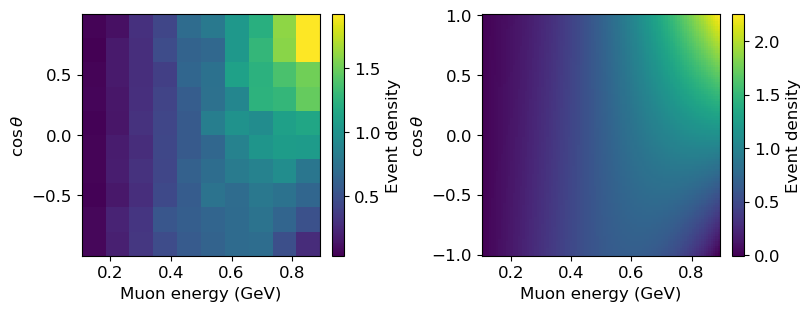

In [20]:
P = -1
fig, axs = plt.subplots(ncols=2, figsize=(8, 3), layout="constrained")

*_, cm = axs[0].hist2d(mus_boosted.E, np.cos(mus_boosted.theta), bins=10, density=True, label="Tauola fully polarized")
fig.colorbar(cm, ax=axs[0], label="Event density")
axs[0].set(xlabel="Muon energy (GeV)", ylabel=r"$\cos\theta$")

costheta = np.linspace(-1, 1, 100)
m_mu = mus.M[0]
Emax = (m_mu**2 + m_tau**2) / (2*m_tau)
E = np.linspace(m_mu, Emax, 100)

costheta_2, E_2 = np.meshgrid(costheta, E)
p = np.sqrt(E_2**2 - m_mu**2)
distribution = p * E_2 * (3*Emax - 2*E_2 - m_mu**2/E_2 + P * costheta_2 * p / E_2 * (Emax - 2* E_2 + m_mu**2 / m_tau**2))
integral = np.sum(distribution) * (E[1] - E[0]) * (costheta[1] - costheta[0])# ((E.max() - E.min()) * (costheta.max() - costheta.min()))

cm = axs[1].pcolormesh(E_2, costheta_2, distribution / integral, shading="auto")
fig.colorbar(cm, ax=axs[1], label="Event density")

axs[1].set(xlabel="Muon energy (GeV)", ylabel=r"$\cos\theta$")

In [52]:
# Take all muons with all energies and combine them into a large dataframe. 
event_num_start = 0
all_dfs_unpol = []
all_dfs_lpol = []

for e in datasets_tau["Tauola unpolarized"].keys():
    unpol_df = datasets_tau["Tauola unpolarized"][e]
    
    selected_events = filter_events(unpol_df, "pdg", is_mu_numu_nutau_event, engine="numba").copy()
    selected_events["event_num"] += event_num_start
    all_dfs_unpol.append(selected_events)
    
    lpol_df =  datasets_tau["Tauola fully left-handed"][e]
    selected_events = filter_events(lpol_df, "pdg", is_mu_numu_nutau_event, engine="numba").copy()
    selected_events["event_num"] += event_num_start
    all_dfs_lpol.append(selected_events)
    
    event_num_start += unpol_df["event_num"].max() + 1
    
merged_df_unpol = pd.concat(all_dfs_unpol)
merged_df_lpol = pd.concat(all_dfs_lpol)

merged_df_unpol["event_num"].nunique(), merged_df_lpol["event_num"].nunique()

(119420, 119707)

Text(0.5, 1.0, 'Unpolarized decays')

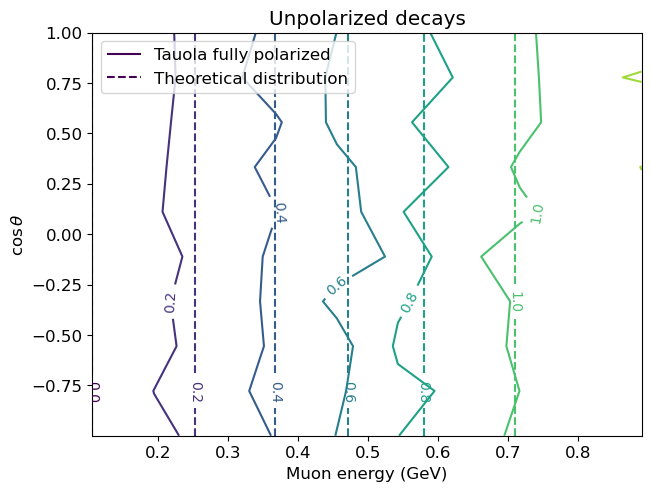

In [49]:
tau_df = merged_df_unpol.query("pdg == 15")
taus = vector.array({"E": tau_df["E"], "px": tau_df["px"], "py": tau_df["py"], "pz": tau_df["pz"]})

mu_df = merged_df_unpol.query("pdg == 13")
assert np.all(tau_df["event_num"].values == mu_df["event_num"].values)
mus = vector.array({"E": mu_df["E"], "px": mu_df["px"], "py": mu_df["py"], "pz": mu_df["pz"]})

mus_boosted = mus.boostCM_of(taus)

# Plot
P = 0
fig, ax = plt.subplots(layout="constrained")

levels = np.arange(0, 1.5, 0.2)
counts, xbins, ybins = np.histogram2d(mus_boosted.E, np.cos(mus_boosted.theta), bins=10, density=True)
cm = ax.contour(counts.T, extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()], levels=levels)
# fig.colorbar(cm, ax=ax, label="Event density")
ax.set(xlabel="Muon energy (GeV)", ylabel=r"$\cos\theta$")
costheta = np.linspace(-1, 1, 100)
m_mu = mus.M[0]
Emax = (m_mu**2 + m_tau**2) / (2*m_tau)
E = np.linspace(m_mu, Emax, 100)

costheta_2, E_2 = np.meshgrid(costheta, E)
p = np.sqrt(E_2**2 - m_mu**2)
distribution = p * E_2 * (3*Emax - 2*E_2 - m_mu**2/E_2 + P * costheta_2 * p / E_2 * (Emax - 2* E_2 + m_mu**2 / m_tau**2))
integral = np.sum(distribution) * (E[1] - E[0]) * (costheta[1] - costheta[0])# ((E.max() - E.min()) * (costheta.max() - costheta.min()))

cm2 = ax.contour(E_2, costheta_2, distribution / integral, linestyles="dashed", levels=levels)

ax.clabel(cm, inline=1, fontsize=10)
ax.clabel(cm2, inline=1, fontsize=10)

ax.legend([cm.legend_elements()[0][0], cm2.legend_elements()[0][0]], ["Tauola fully polarized", "Theoretical distribution"], loc="upper left")
ax.set_title("Unpolarized decays")

Text(0.5, 1.0, 'Fully polarized left-handed decays')

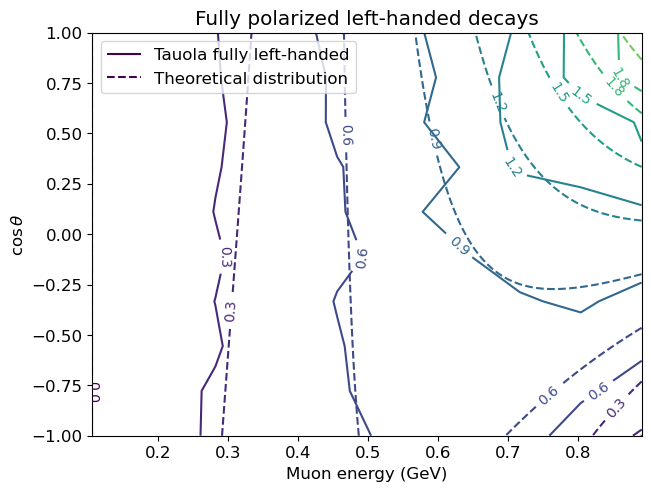

In [50]:
tau_df = merged_df_lpol.query("pdg == 15")
taus = vector.array({"E": tau_df["E"], "px": tau_df["px"], "py": tau_df["py"], "pz": tau_df["pz"]})

mu_df = merged_df_lpol.query("pdg == 13")
assert np.all(tau_df["event_num"].values == mu_df["event_num"].values)
mus = vector.array({"E": mu_df["E"], "px": mu_df["px"], "py": mu_df["py"], "pz": mu_df["pz"]})

mus_boosted = mus.boostCM_of(taus)

P = -1
fig, ax = plt.subplots(layout="constrained")

levels = np.arange(0, 3, 0.3)
counts, xbins, ybins = np.histogram2d(mus_boosted.E, np.cos(mus_boosted.theta), bins=10, density=True)
cm = ax.contour(counts.T, extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()], levels=levels)
# fig.colorbar(cm, ax=ax, label="Event density")
ax.set(xlabel="Muon energy (GeV)", ylabel=r"$\cos\theta$")
costheta = np.linspace(-1, 1, 100)
m_mu = mus.M[0]
Emax = (m_mu**2 + m_tau**2) / (2*m_tau)
E = np.linspace(m_mu, Emax, 100)

costheta_2, E_2 = np.meshgrid(costheta, E)
p = np.sqrt(E_2**2 - m_mu**2)
distribution = p * E_2 * (3*Emax - 2*E_2 - m_mu**2/E_2 + P * costheta_2 * p / E_2 * (Emax - 2* E_2 + m_mu**2 / m_tau**2))
integral = np.sum(distribution) * (E[1] - E[0]) * (costheta[1] - costheta[0])# ((E.max() - E.min()) * (costheta.max() - costheta.min()))

cm2 = ax.contour(E_2, costheta_2, distribution / integral, linestyles="dashed", levels=levels)

ax.clabel(cm, inline=1, fontsize=10)
ax.clabel(cm2, inline=1, fontsize=10)

ax.legend([cm.legend_elements()[0][0], cm2.legend_elements()[0][0]], ["Tauola fully left-handed", "Theoretical distribution"], loc="upper left")
ax.set_title("Fully polarized left-handed decays")

This looks good too!

[Text(0.5, 0, 'Muon momentum fraction'), Text(0, 0.5, 'Event density')]

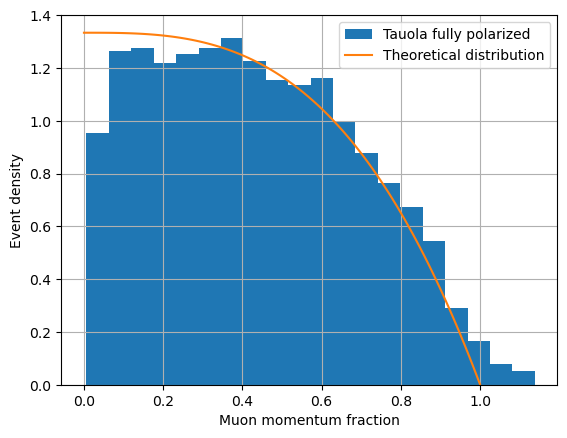

In [47]:
# NOTE this plot is incorrect while tau_only_lpol_df is used. I should instead use tau_only_lpol[101.77682]
P = -1
fig, ax = plt.subplots()

ax.hist(mus.p / taus.p, bins=20, density=True, label="Tauola fully polarized")
x = np.linspace(0, 1, 100)
ax.plot(x, 1/3*(1-x) * ((5 + 5*x - 4*x**2) + P * (1 + x - 8*x**2)), label="Theoretical distribution")
ax.legend()
ax.grid(True)
ax.set(xlabel="Muon momentum fraction", ylabel="Event density")

In [ ]:
theoretical_distribution = pd.read_csv("../data/rho_e_distribution.csv")
theoretical_distribution["gamma_norm"] = theoretical_distribution["gamma"] / np.trapz(theoretical_distribution["gamma"], dx=np.diff(theoretical_distribution["z"].values))

Text(0.5, 0.98, 'Visible energy fraction for $\\tau^- \\to \\pi^0 \\pi^- \\nu_\\tau$ events')

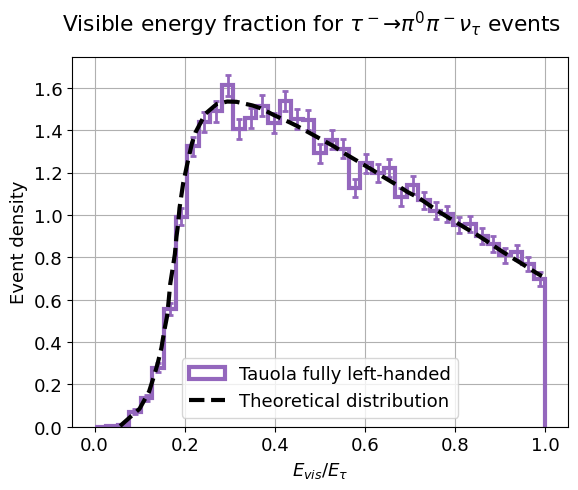

In [ ]:
fig, ax = plt.subplots()
# use larger font size
# plt.rcParams.update({'font.size': 13})
label = "Tauola fully left-handed"
df = datasets_tau[label][1000+m_tau]
df_selected = filter_events(df, "pdg", is_pi0_pim_nutau_event, engine="numba")
bins = np.linspace(0, 1, 40)
v = tau_visible_e_fraction(df_selected)

values, bins, _ = ax.hist(v, bins=bins, density=True,#weights=np.ones(df_selected["event_num"].nunique()) / df_selected["event_num"].nunique() / (bins[1] - bins[0]) * 0.22, 
    label=label, histtype="step", color=colors_tau[label], lw=3)
# Plot error bars
bin_centers = (bins[1:] + bins[:-1]) / 2
bin_width = bins[1] - bins[0]
ax.errorbar(
    (bins[1:] + bins[:-1]) / 2, values, 
    yerr=np.sqrt(values) / np.sqrt(np.sum(v.size) * np.diff(bins)),
    fmt="none", capsize=2, capthick=2, elinewidth=2, ecolor=colors_tau[label],
)
ax.set(xlabel=r"$E_{vis}/E_\tau$", ylabel="Event density")
ax.plot(theoretical_distribution["z"], theoretical_distribution["gamma_norm"], label="Theoretical distribution", lw=3, linestyle="--", color="k")
ax.legend()
ax.grid(True)
fig.suptitle(r"Visible energy fraction for $\tau^- \to \pi^0 \pi^- \nu_\tau$ events")

## Cascade-like events
These are all events that are not muon events

Text(0.5, 0.98, '$E_{vis} / E_\\tau$ for cascade-like events')

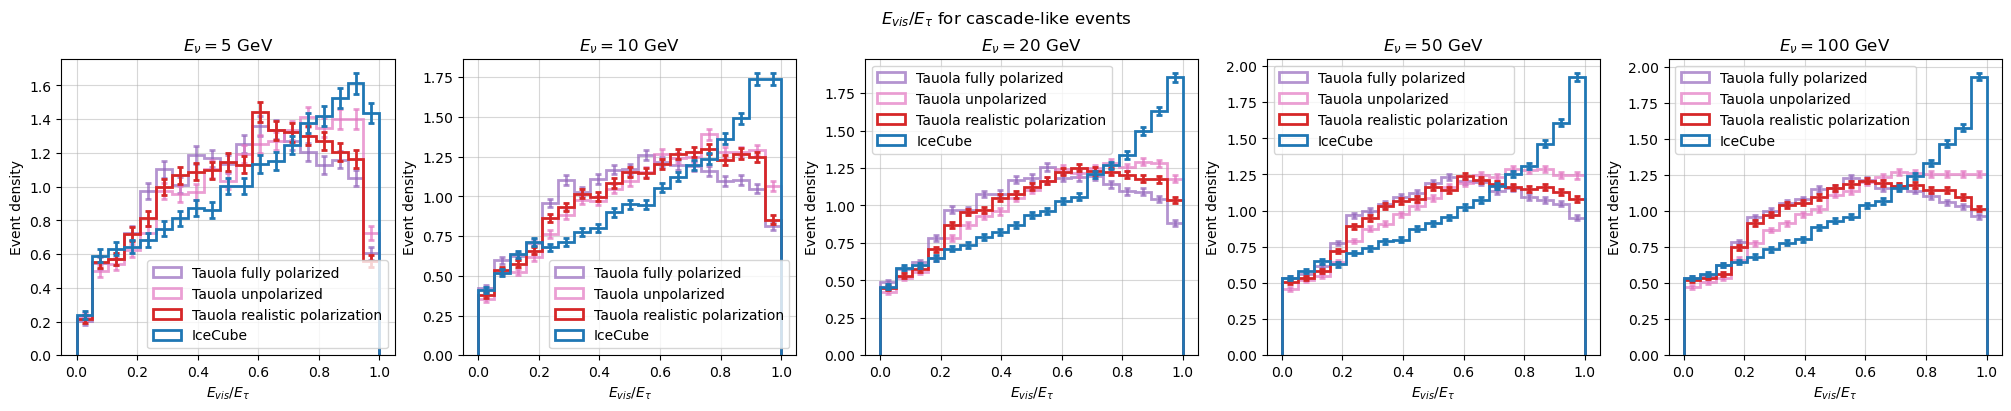

In [74]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=numba.njit(lambda values, index: not (values == 13).any()), plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_{vis} / E_\tau$", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_{vis} / E_\tau$ for cascade-like events")

Text(0.5, 0.98, '$E_{vis}$ for cascade-like events')

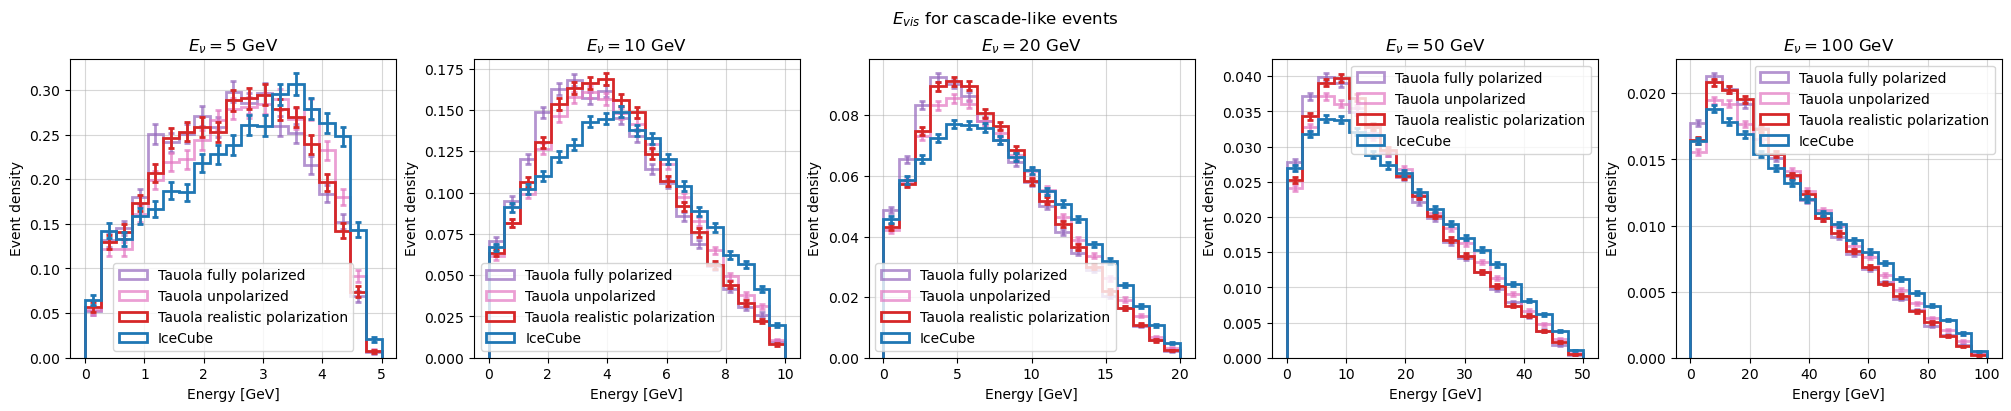

In [75]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, 
    filter_func=numba.njit(lambda values, index: not (values == 13).any()), plot_func=tau_visible_e, 
    xlabel=r"Energy [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_{vis}$ for cascade-like events")


Text(0.5, 0.98, 'Angle between $\\tau$ and visible $\\tau$ for cascade-like events')

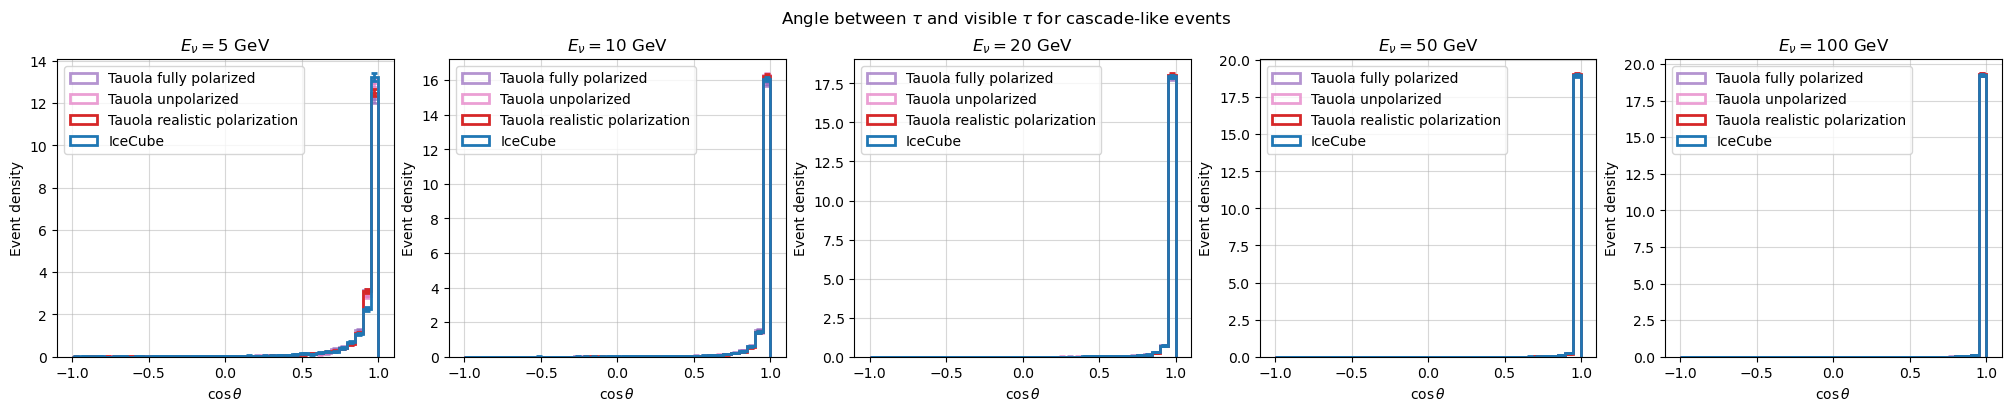

In [78]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 40) for e in nutau_energies}, 
    filter_func=numba.njit(lambda values, index: not (values == 13).any()), plot_func=lambda df: np.cos(visible_theta_tau(df)), 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"Angle between $\tau$ and visible $\tau$ for cascade-like events")

Text(0.5, 0.98, 'Angle between incoming neutrino and visible $\\tau$ for cascade-like events')

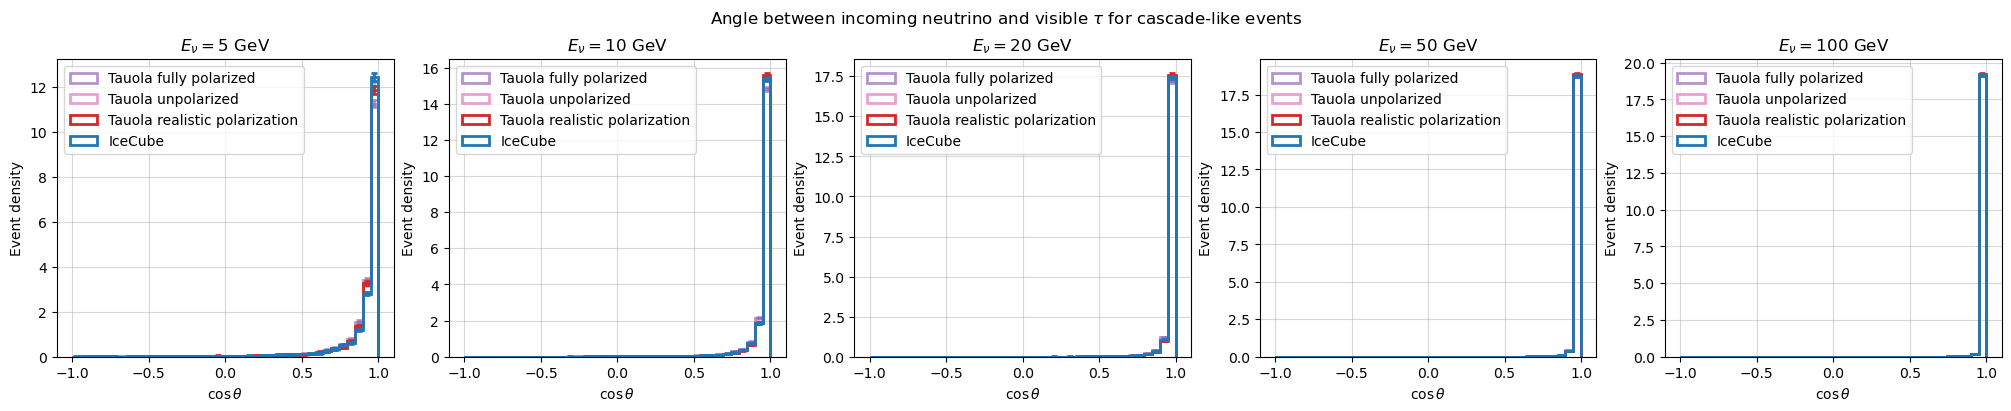

In [80]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 40) for e in nutau_energies}, 
    filter_func=numba.njit(lambda values, index: not (values == 13).any()), plot_func=lambda df: np.cos(visible_theta(df)), 
    xlabel=r"$\cos\theta$", density=True, errorbar=True, ylabel="Event density", colors=colors, 
)
fig.suptitle(r"Angle between incoming neutrino and visible $\tau$ for cascade-like events")

Text(0.5, 0.98, '$\\theta_\\tau - \\theta_{vis}$ for cascade-like events')

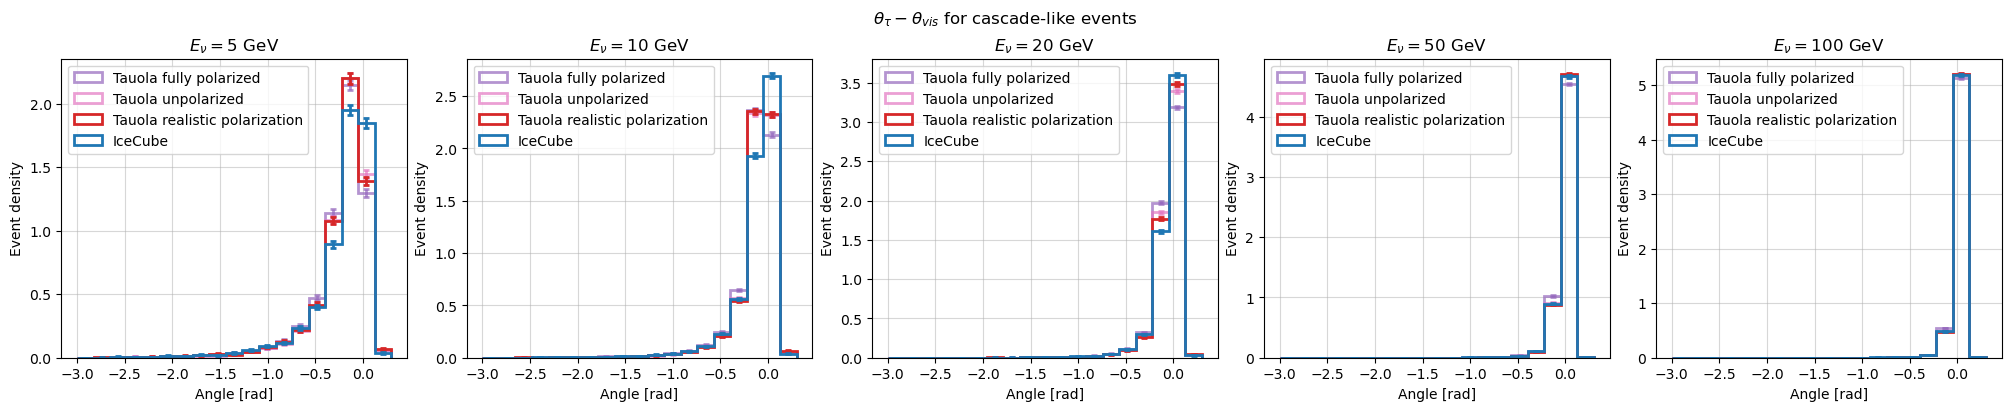

In [82]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-3, 0.3, 20) for e in nutau_energies}, 
    filter_func=numba.njit(lambda values, index: not (values == 13).any()), plot_func=visible_delta_theta_tau, 
    xlabel=r"Angle [rad]", density=True, errorbar=True, ylabel="Event density", colors=colors,
)
fig.suptitle(r"$\theta_\tau - \theta_{vis}$ for cascade-like events")

Text(0.5, 0.98, '$\\cos\\theta$ in the $\\tau$ rest frame for cascade-like events')

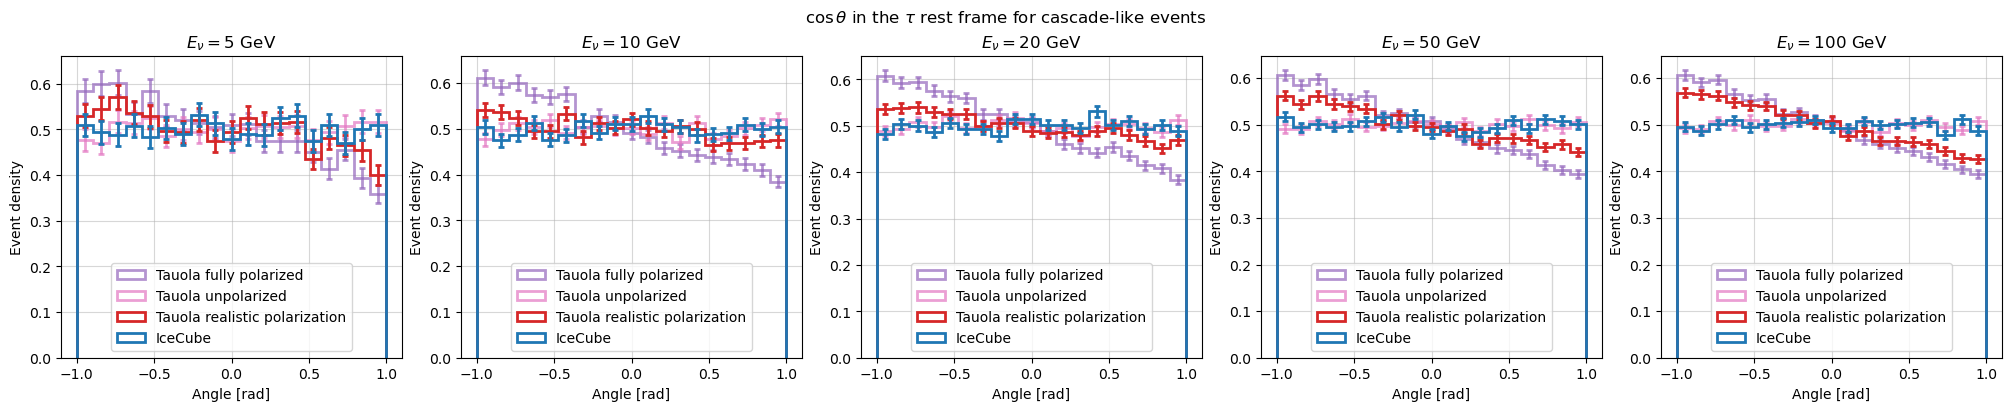

In [83]:
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(-1, 1, 20) for e in nutau_energies}, 
    filter_func=numba.njit(lambda values, index: not (values == 13).any()), plot_func=visible_tau_rest_frame_costheta, 
    xlabel=r"Angle [rad]", density=True, errorbar=True, ylabel="Event density", colors=colors, 
)
fig.suptitle(r"$\cos\theta$ in the $\tau$ rest frame for cascade-like events")

## Missing decay modes
Plot the decay modes that are missing from Geant4 but included in Tauola

In [84]:
@numba.njit
def is_missing_decay_mode(values, index):
    return not (
        is_pion_nutau_event(values, index)
        or is_e_nue_nutau_event(values, index)
        or is_mu_numu_nutau_event(values, index)
        or is_pi0_pim_nutau_event(values, index)
        or is_2pim_pip_nutau_event(values, index)
        or is_2pi0_pim_nutau_event(values, index)
    )

@numba.njit
def is_leptonic_event(values, index):
    return (
        ((np.abs(values) == 11).sum() > 0) 
        or ((np.abs(values) == 13).sum() > 0) 
        # or ((np.abs(values) == 15).sum() > 0) 
    )

Text(0.5, 0.98, '$E_{vis} / E_\\tau$ for missing decay modes')

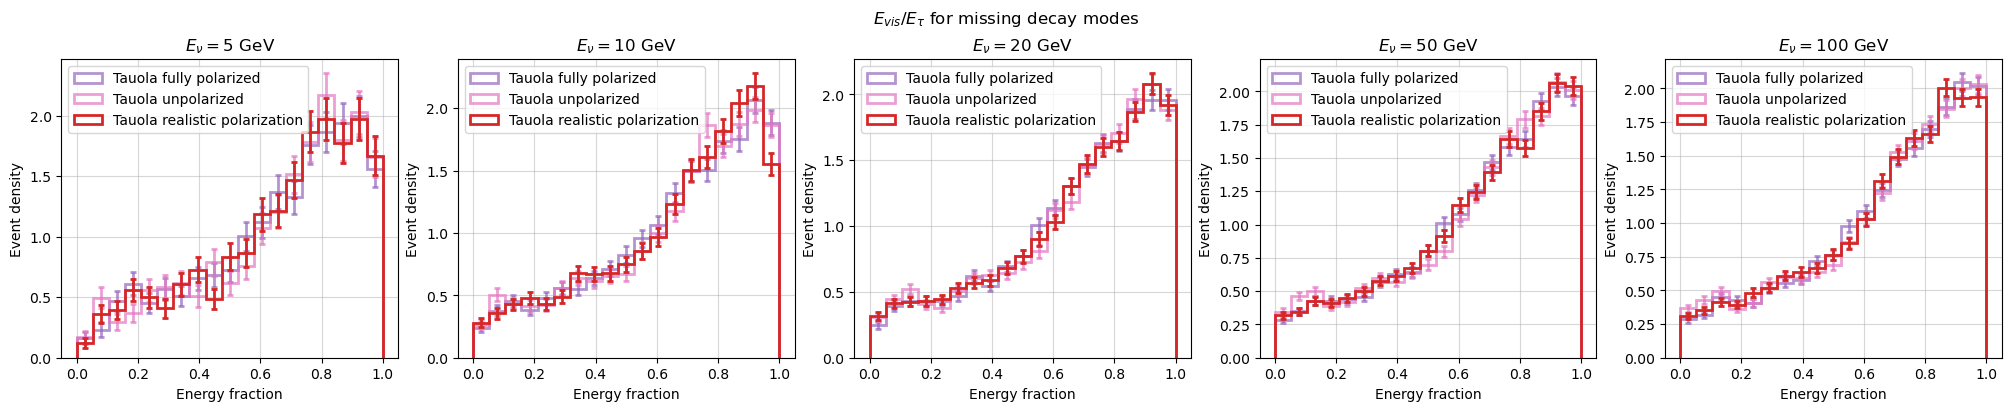

In [85]:
fig, axs = plot_histograms(
    datasets_tauola, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=is_missing_decay_mode, plot_func=tau_visible_e_fraction, 
    xlabel=r"Energy fraction", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_{vis} / E_\tau$ for missing decay modes")

Text(0.5, 0.98, '$E_{vis} / E_\\tau$ for missing hadronic decay modes')

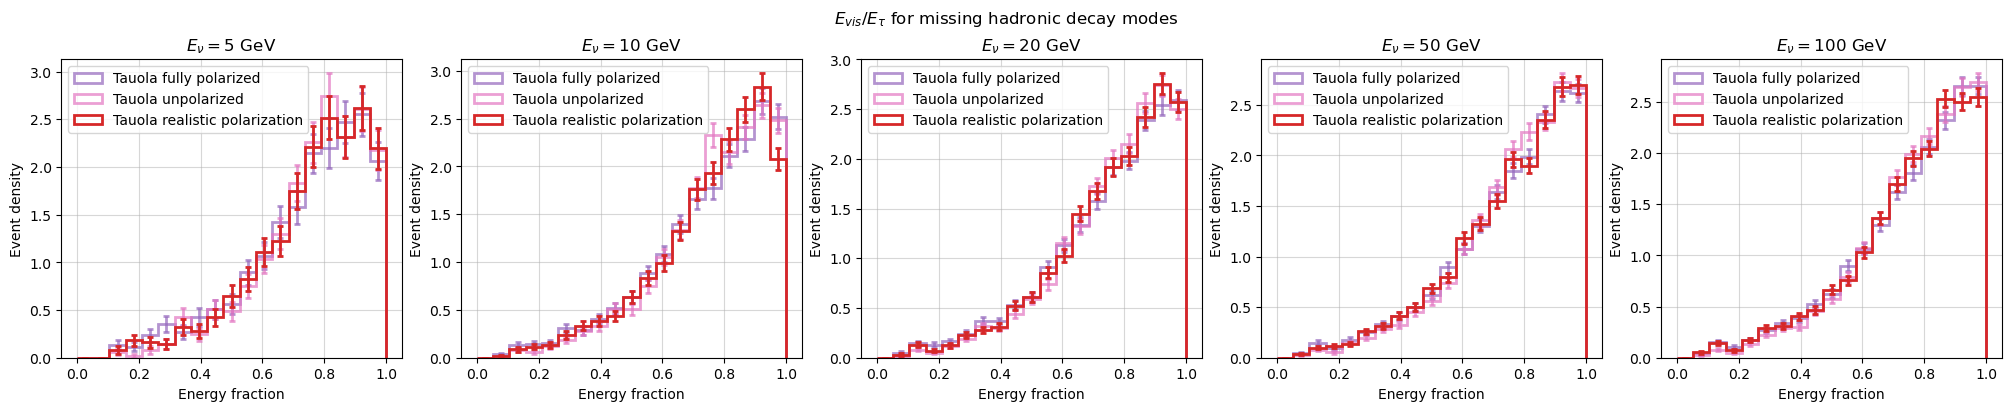

In [86]:
fig, axs = plot_histograms(
    datasets_tauola, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=lambda values, index: is_missing_decay_mode(values, index) and not is_leptonic_event(values, index), plot_func=tau_visible_e_fraction, 
    xlabel=r"Energy fraction", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_{vis} / E_\tau$ for missing hadronic decay modes")

Text(0.5, 0.98, '$E_{vis} / E_\\tau$ for leptonic missing decay modes')

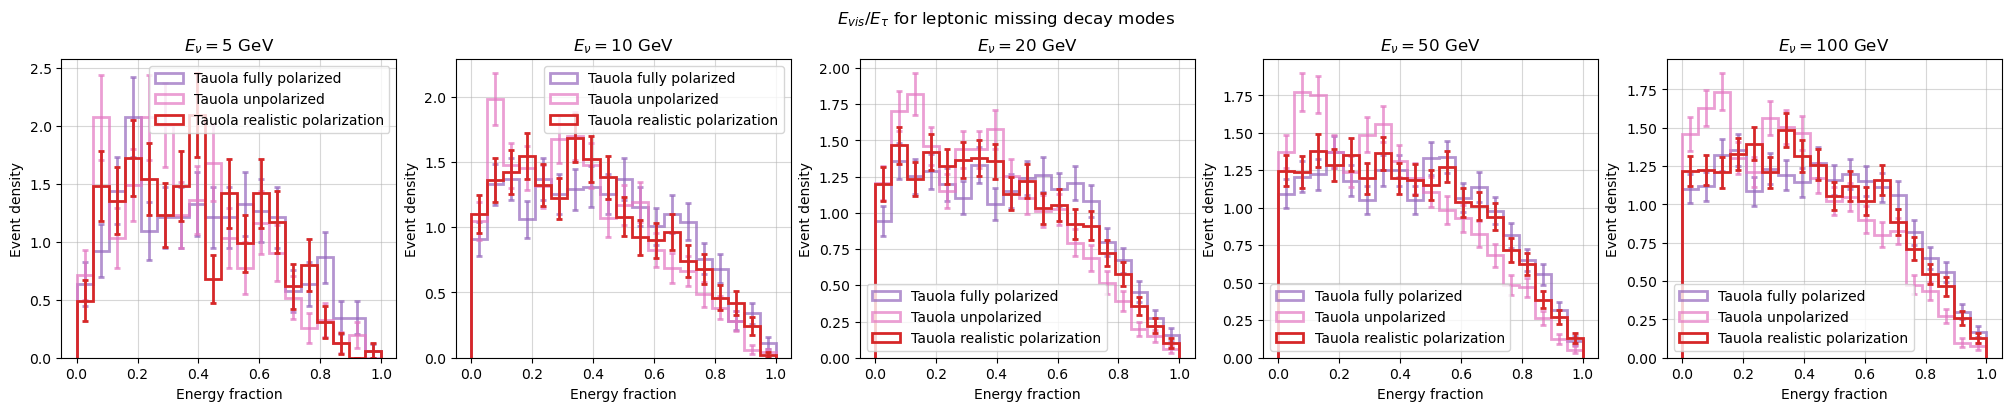

In [87]:
fig, axs = plot_histograms(
    datasets_tauola, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies}, 
    filter_func=lambda values, index: is_missing_decay_mode(values, index) and is_leptonic_event(values, index), plot_func=tau_visible_e_fraction, 
    xlabel=r"Energy fraction", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_{vis} / E_\tau$ for leptonic missing decay modes")

In [5]:
from utils import branching_ratios

In [15]:
br = branching_ratios(datasets_tauola["Tauola fully polarized"][100].groupby("event_num").nth[3:])
br

{(-211, 16, 111): 0.25262512126918907,
 (-14, 13, 16): 0.17164583690007418,
 (-12, 11, 16): 0.15412600582092106,
 (-211, 16): 0.11092564058665753,
 (-211, 16, 111, 111): 0.091137362323803,
 (-211, -211, 16, 211): 0.0881555669691263,
 (-211, -211, 16, 111, 211): 0.04541174456428694,
 (-12, 11, 16, 22): 0.028319922387718997,
 (-211, 16, 111, 111, 111): 0.010129544027849113,
 (-321, 16): 0.007347486161045483,
 (-14, 13, 16, 22): 0.005635450550704788,
 (-321, -211, 16, 211): 0.005449980026251213,
 (-321, 16, 111): 0.005150373794441591,
 (-211, 16, 310): 0.004365690806368772,
 (-211, 16, 130): 0.003951948867203105,
 (-211, 16, 111, 310): 0.002810591793642641,
 (-211, 16, 111, 130): 0.002739256976545112,
 (-211, 16, 111, 221): 0.001726302573760201,
 (-321, -211, 16, 321): 0.0013553615248530504,
 (-211, 16, 22, 111): 0.0012126918906579924,
 (-211, -211, 16, 111, 111, 211): 0.0007846829880728185,
 (-321, 16, 111, 310): 0.0007846829880728185,
 (-321, 16, 111, 130): 0.0006277463904582549,
 (-211

In [11]:
datasets_tauola["Tauola realistic polarization"][100]["event_num"].nunique()

70092

Text(0.5, 0.98, '$E_{vis}$ for missing decay modes')

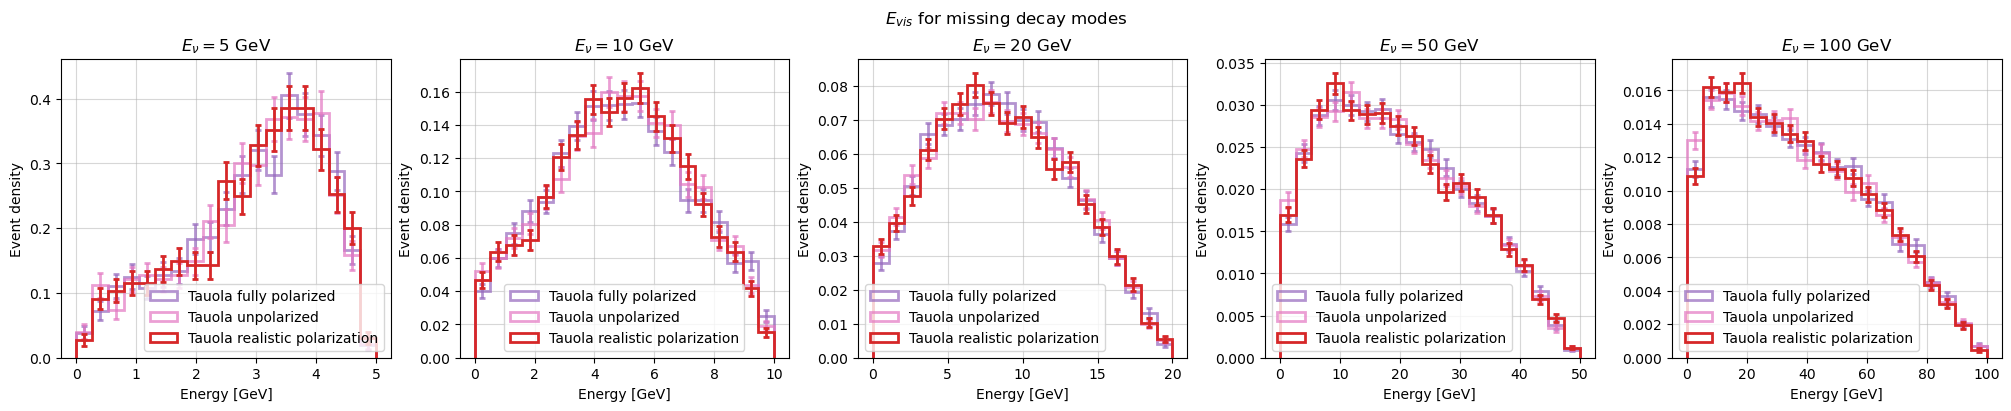

In [88]:
fig, axs = plot_histograms(
    datasets_tauola, 
    bins={e: np.linspace(0, e, 20) for e in nutau_energies}, 
    filter_func=is_missing_decay_mode, plot_func=tau_visible_e, 
    xlabel=r"Energy [GeV]", density=True, errorbar=True, ylabel="Event density", colors=colors, #title_label=r"$E_\tau$ = {e} GeV",
)
fig.suptitle(r"$E_{vis}$ for missing decay modes")

## Comparisons with PROPOSAL

In [ ]:
# Add a boosted case where the tau lepton has an energy of 100 TeV
dataset_tau_new = {}

for label, dataset in datasets_tau.items():
    # Boost the stationary energy decays to tau leptons with energies of 10_000 GeV in the z direction
    dataset_boosted = dataset[m_tau].copy()
    E_boost = 100_000
    tau_boosted = vector.obj(px=0, py=0, pz=np.sqrt((m_tau + E_boost)**2 - m_tau**2), E=m_tau + E_boost)
    decay_products = dataset_boosted.groupby("event_num").nth[2:]
    decay_products_vecs = vector.array({"E": decay_products["E"], "px": decay_products["px"], "py": decay_products["py"], "pz": decay_products["pz"]})
    decay_products_vecs = decay_products_vecs.boost(tau_boosted)
    
    dataset_boosted.loc[decay_products.index, "E"] = decay_products_vecs.E
    dataset_boosted.loc[decay_products.index, "px"] = decay_products_vecs.px
    dataset_boosted.loc[decay_products.index, "py"] = decay_products_vecs.py
    dataset_boosted.loc[decay_products.index, "pz"] = decay_products_vecs.pz
    
    dataset_tau_new[label] = dataset.copy()
    dataset_tau_new[label][E_boost + m_tau] = dataset_boosted

dataset_boosted

event_num         pdg              E        px        py             pz
0             0          16       1.000000  0.000000  0.000000       1.000000
1             0  1000080160       1.000000  0.000000  0.000000       0.000000
2             0          15  100566.175041  0.000000  0.000000  100566.175026
3             0        -211   29165.413832  0.574192 -0.251646   29165.413825
4             0        -211   35387.243430 -0.229849  0.442159   35387.243426
...         ...         ...            ...       ...       ...            ...
6078        999  1000080160       1.000000  0.000000  0.000000       0.000000
6079        999          15  100566.175041  0.000000  0.000000  100566.175026
6080        999          13   11728.871751 -0.130191 -0.100236   11728.871750
6081        999         -14   64560.725848  0.760230  0.282075   64560.725843
6082        999          16   23714.431460 -0.630039 -0.181839   23714.431451

[6083 rows x 6 columns]

In [ ]:
nutau_energies_extended = [*nutau_energies, E_boost+m_tau] # GeV # 5, 10, 20, 50, 100, 1000

In [ ]:
dataset_tau_new["IceCube"].keys()

dict_keys([1.77682, 1001.77682, 100001.77682])

In [ ]:
datasets_tau["IceCube"].keys()

dict_keys([1.77682, 1001.77682])

Text(0.5, 1.0, 'Tau visible energy fraction for $\\tau \\to \\pi^0\\pi^-\\nu_\\tau$ events')

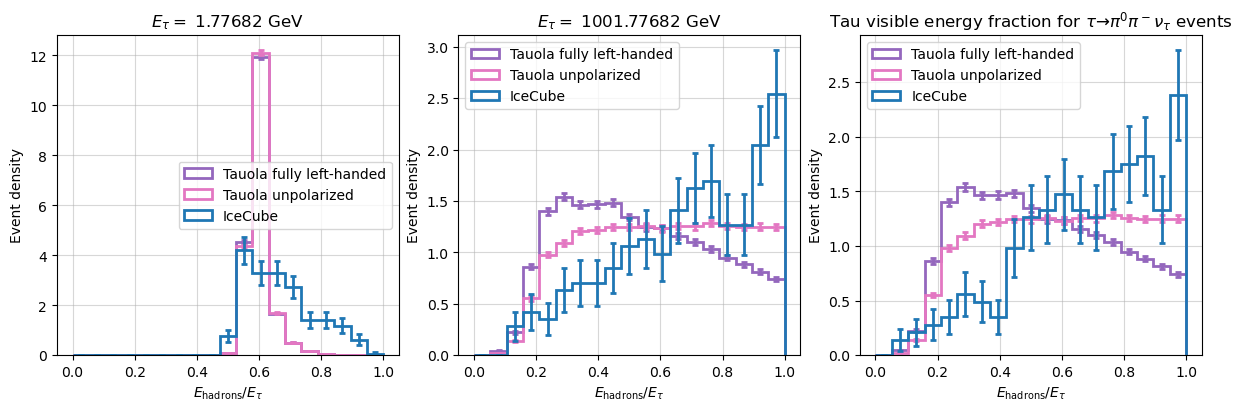

In [ ]:
fig, axs = plot_histograms(
    dataset_tau_new, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies_extended}, filter_func=is_pi0_pim_nutau_event, plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_{\mathrm{hadrons}}/E_\tau$", errorbar=True, colors=colors_tau, title_label=r"$E_\tau =$ {e} GeV", density=True, ylabel="Event density",
)
axs[-1].set_title(r"Tau visible energy fraction for $\tau \to \pi^0\pi^-\nu_\tau$ events")

Text(0.5, 1.0, 'Tau visible energy fraction for $\\tau \\to \\pi^0\\pi^-\\nu_\\tau$ events')

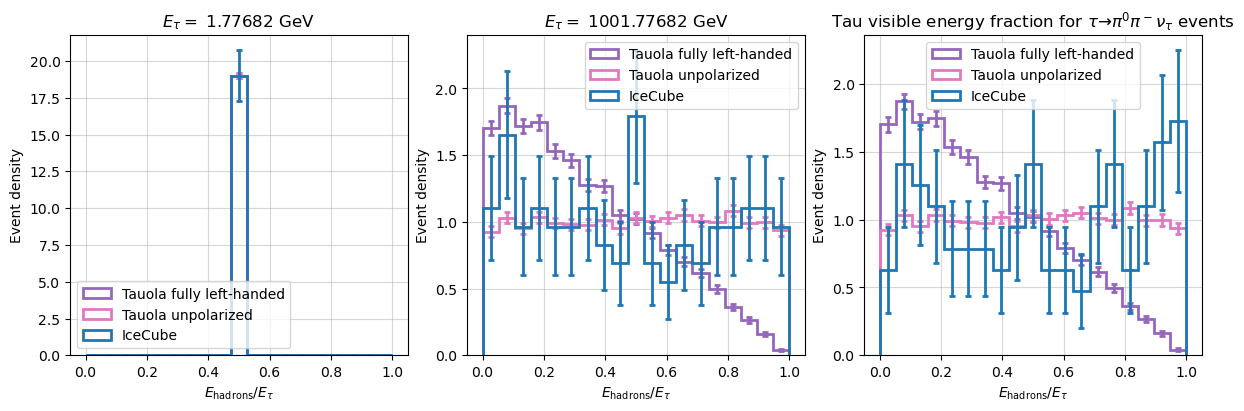

In [ ]:
fig, axs = plot_histograms(
    dataset_tau_new, 
    bins={e: np.linspace(0, 1, 20) for e in nutau_energies_extended}, filter_func=is_pion_nutau_event, plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_{\mathrm{hadrons}}/E_\tau$", errorbar=True, colors=colors_tau, title_label=r"$E_\tau =$ {e} GeV", density=True, ylabel="Event density",
)
axs[-1].set_title(r"Tau visible energy fraction for $\tau \to \pi^0\pi^-\nu_\tau$ events")

### Compare the Geant4 and Tauola distbutions with PROPOSAL distributions

In [42]:
proposal_lab = pd.read_csv("../data/proposal_ehad_etau_lab.csv")
# Normalize such that the integral under the curve is 1
proposal_lab["density"] = proposal_lab["n"] / np.trapz(proposal_lab["n"], proposal_lab["efrac"])

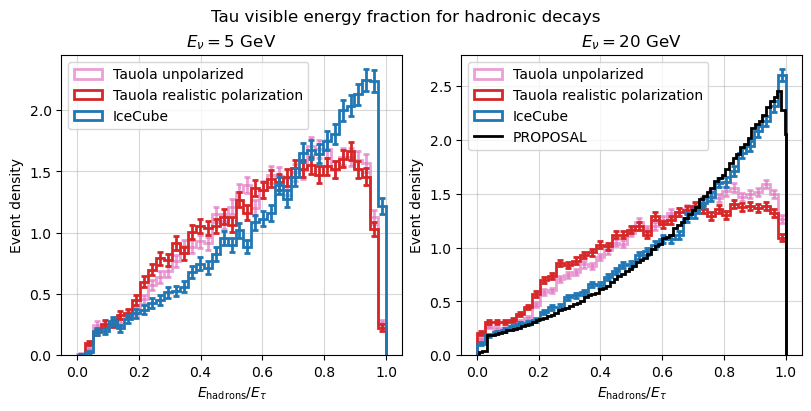

In [53]:
# Plot the decay 
fig, axs = plot_histograms(
    datasets,
    # {"IceCube": {e: d for e, d in datasets["IceCube"].items() if e != 100}}, 
    bins={e: np.linspace(0, 1, 40) for e in nutau_energies}, 
    filter_func=lambda values, index: (not is_e_nue_nutau_event(values, index)) and (not is_mu_numu_nutau_event(values, index)), 
    plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_\mathrm{hadrons}/ E_\tau$", errorbar=True, colors=colors, density=True, ylabel="Event density", #yscale="log", ylim=(1e-2, 3),
)
fig.suptitle(r"Tau visible energy fraction for hadronic decays")

# Plot PROPOSAL output
axs[1].stairs(proposal_lab["density"], np.r_[proposal_lab["efrac"], proposal_lab["efrac"].iloc[-1]], label="PROPOSAL", color="black", lw=2, zorder=3)
axs[1].legend()

In [54]:
proposal_rest = pd.read_csv("../data/proposal_ehad_etau_rest.csv")
proposal_rest["efrac"] *= m_tau
# Normalize such that the integral under the curve is 1
proposal_rest["density"] = proposal_rest["n"] / np.trapz(proposal_rest["n"], proposal_rest["efrac"])

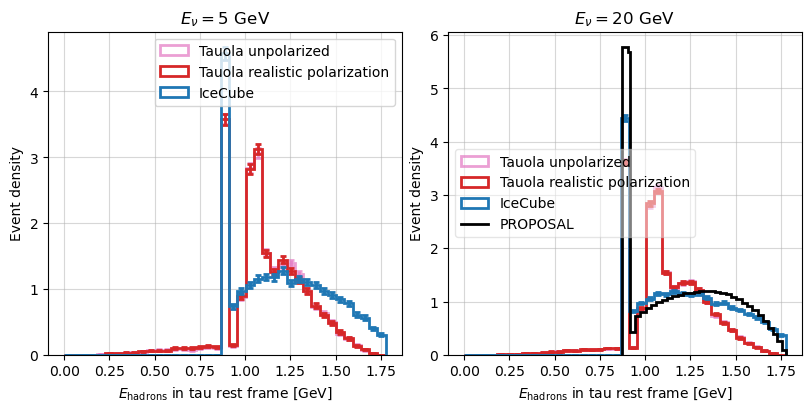

In [56]:
m_tau = 1.777
# Plot the decay 
fig, axs = plot_histograms(
    datasets, 
    bins={e: np.linspace(0, m_tau, 40) for e in nutau_energies}, 
    filter_func=lambda values, index: (not is_e_nue_nutau_event(values, index)) and (not is_mu_numu_nutau_event(values, index)), 
    plot_func=visible_e_tau_rest_frame, 
    xlabel=r"$E_\mathrm{hadrons}$ in tau rest frame [GeV]", errorbar=True, colors=colors, density=True, ylabel="Event density", #yscale="log", 
)
# fig.suptitle(r"$E_\mathrm{hadrons}$ in tau rest frame for hadronic decays")
# Plot PROPOSAL output
axs[1].stairs(proposal_rest["density"], np.r_[proposal_rest["efrac"], m_tau], label="PROPOSAL", color="black", lw=2, zorder=3)
axs[1].legend(loc="center left", framealpha=0.5)

In [57]:
proposal_old_lab = pd.read_csv("../data/proposal_old_ehad_etau_lab.csv")
# Normalize such that the integral under the curve is 1
proposal_old_lab["density"] = proposal_old_lab["n"] / np.trapz(proposal_old_lab["n"], proposal_old_lab["efrac"])

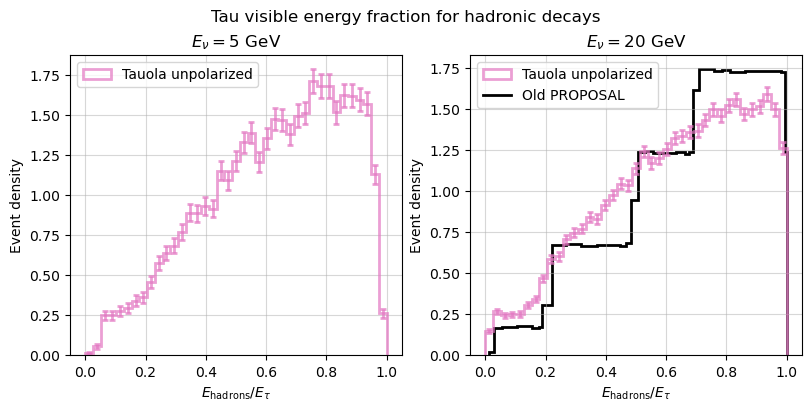

In [60]:
# Plot the decay 
fig, axs = plot_histograms(
    {"Tauola unpolarized": datasets["Tauola unpolarized"]}, 
    bins={e: np.linspace(0, 1, 40) for e in nutau_energies}, 
    filter_func=lambda values, index: (not is_e_nue_nutau_event(values, index)) and (not is_mu_numu_nutau_event(values, index)), 
    plot_func=tau_visible_e_fraction, 
    xlabel=r"$E_\mathrm{hadrons}/ E_\tau$", errorbar=True, colors=colors, density=True, ylabel="Event density",
)
fig.suptitle(r"Tau visible energy fraction for hadronic decays")

# Plot PROPOSAL output
axs[1].stairs(proposal_old_lab["density"], np.r_[proposal_old_lab["efrac"], 1], label="Old PROPOSAL", color="black", lw=2)
axs[1].legend()

## Sanity checks

In [89]:
# Check that all events from IceCube are covered by the filter functions above, i.e. I have plotted all possible decay modes in Geant4
for e in nutau_energies:
    mask = np.stack([
        decay_products_ic[e].groupby("event_num")["pdg"].agg(filter_func, engine="numba") 
        for filter_func in 
        (is_pion_nutau_event, is_pi0_pim_nutau_event, is_2pim_pip_nutau_event, is_2pi0_pim_nutau_event, is_mu_numu_nutau_event, is_e_nue_nutau_event)
    ])
    assert (np.sum(mask, axis=0) == 1).all(), f"{e}: {np.where(np.sum(mask, axis=0) != 1)[0]}"

# Check that when selecting events, only one decay mode is selected
for simulation in datasets.values():
    for func in (is_pion_nutau_event, is_pi0_pim_nutau_event, is_2pim_pip_nutau_event, is_2pi0_pim_nutau_event, is_mu_numu_nutau_event, is_e_nue_nutau_event):
        for e, df in simulation.items():
            mask = df.groupby("event_num")["pdg"].agg(func, engine="numba")
            selected_event_idx = mask[mask > 0].index
            print(f"Energy: {e} GeV")
            print(len(selected_event_idx))
            selected_events = df.loc[df["event_num"].isin(selected_event_idx)].groupby("event_num").nth[3:]
            c = Counter(tuple(sorted(a.tolist())) for i, a in selected_events.groupby("event_num")["pdg"])
            assert len(c) == 1, c

Energy: 5 GeV
1923
Energy: 10 GeV
4625
Energy: 20 GeV
6156
Energy: 50 GeV
7299
Energy: 100 GeV
7775
Energy: 5 GeV
4530
Energy: 10 GeV
10783
Energy: 20 GeV
14226
Energy: 50 GeV
16752
Energy: 100 GeV
17682
Energy: 5 GeV
1632
Energy: 10 GeV
3757
Energy: 20 GeV
4989
Energy: 50 GeV
5818
Energy: 100 GeV
6142
Energy: 5 GeV
1652
Energy: 10 GeV
3940
Energy: 20 GeV
5159
Energy: 50 GeV
6091
Energy: 100 GeV
6423
Energy: 5 GeV
3120
Energy: 10 GeV
7236
Energy: 20 GeV
9601
Energy: 50 GeV
11288
Energy: 100 GeV
11920
Energy: 5 GeV
2730
Energy: 10 GeV
6576
Energy: 20 GeV
8687
Energy: 50 GeV
10239
Energy: 100 GeV
10795
Energy: 5 GeV
2282
Energy: 10 GeV
5228
Energy: 20 GeV
6954
Energy: 50 GeV
8192
Energy: 100 GeV
8642
Energy: 5 GeV
5042
Energy: 10 GeV
12075
Energy: 20 GeV
15702
Energy: 50 GeV
18812
Energy: 100 GeV
19860
Energy: 5 GeV
1854
Energy: 10 GeV
4472
Energy: 20 GeV
5927
Energy: 50 GeV
6853
Energy: 100 GeV
7382
Energy: 5 GeV
1775
Energy: 10 GeV
4333
Energy: 20 GeV
5776
Energy: 50 GeV
6704
Energy: 1

In [87]:
28.306682+10.150611+10.574703

49.031996

In [82]:
for e in nutau_energies[-1:]:
    n_events = datasets['IceCube'][e]["event_num"].nunique()
    print(f"Energy: {e} GeV. {n_events} events")
    # Convert the print statements above to a table. One table for each energy. Each row is a decay mode and each column is the branching ratios for the different simulations.
    table = {}
    for name, df in datasets.items():
        table[name] = {str(key): value for key, value in branching_ratios(df[e].groupby("event_num").nth[3:]).items()}
    
    df = pd.DataFrame(table)
    # Replace NaN with 0
    # df = df.fillna(0)
    display(df * 100)

Energy: 100 GeV. 68853 events


Tauola fully polarized  \
(-211, 16, 111)                                     25.271230   
(-14, 13, 16)                                       17.167008   
(-12, 11, 16)                                       15.406736   
(-211, 16)                                          11.101913   
(-211, 16, 111, 111)                                 9.122333   
(-211, -211, 16, 211)                                8.778122   
(-211, -211, 16, 111, 211)                           4.551726   
(-12, 11, 16, 22)                                    2.829216   
(-211, 16, 111, 111, 111)                            1.002135   
(-321, 16)                                           0.739256   
(-14, 13, 16, 22)                                    0.567876   
(-321, -211, 16, 211)                                0.543186   
(-321, 16, 111)                                      0.517044   
(-211, 16, 310)                                      0.435711   
(-211, 16, 130)                                      0.393592   
(-211, 16, 111, 310)                                 0.286117   
(-211, 16, 111, 130)                                 0.277403   
(-211, 16, 111, 221)                                 0.174284   
(-321, -211, 16, 321)                                0.136523   
(-211, 16, 22, 111)                                  0.120547   
(-211, -211, 16, 111, 111, 211)                      0.078428   
(-321, 16, 111, 310)                                 0.076976   
(-321, 16, 111, 130)                                 0.063904   
(-211, 16, 130, 310)                                 0.058095   
(-211, -211, 16, 111, 111, 111, 211)                 0.045023   
(-321, 16, 111, 111)                                 0.045023   
(-321, 16, 310)                                      0.043571   
(-321, 16, 130)                                      0.042119   
(-211, 16, 310, 310)                                 0.031952   
(-211, -211, -211, 16, 111, 211, 211)                0.031952   
(-211, 16, 130, 130)                                 0.030500   
(-211, -211, -211, 16, 211, 211)                     0.030500   

                                       Tauola unpolarized  \
(-211, 16, 111)                                 25.218945   
(-14, 13, 16)                                   17.049366   
(-12, 11, 16)                                   15.380593   
(-211, 16)                                      11.081580   
(-211, 16, 111, 111)                             9.161547   
(-211, -211, 16, 211)                            8.731646   
(-211, -211, 16, 111, 211)                       4.669368   
(-12, 11, 16, 22)                                2.810335   
(-211, 16, 111, 111, 111)                        1.005040   
(-321, 16)                                       0.666638   
(-14, 13, 16, 22)                                0.559162   
(-321, -211, 16, 211)                            0.605638   
(-321, 16, 111)                                  0.486544   
(-211, 16, 310)                                  0.429901   
(-211, 16, 130)                                  0.476377   
(-211, 16, 111, 310)                             0.284664   
(-211, 16, 111, 130)                             0.274498   
(-211, 16, 111, 221)                             0.178641   
(-321, -211, 16, 321)                            0.178641   
(-211, 16, 22, 111)                              0.142332   
(-211, -211, 16, 111, 111, 211)                  0.098761   
(-321, 16, 111, 310)                             0.066809   
(-321, 16, 111, 130)                             0.059547   
(-211, 16, 130, 310)                             0.063904   
(-211, -211, 16, 111, 111, 111, 211)             0.050833   
(-321, 16, 111, 111)                             0.043571   
(-321, 16, 310)                                  0.042119   
(-321, 16, 130)                                  0.058095   
(-211, 16, 310, 310)                             0.036309   
(-211, -211, -211, 16, 111, 211, 211)            0.033404   
(-

In [85]:
1-sum([0.1737,0.1783,0.1153,0.2595,0.0952,0.098,0.0457])

0.0343

# Old IceCube simulations
These events have incoming neutrinos with various energies. Also, the tau leptons do not have polarization information. Lastly, more Geant4 decay modes are possible, though many of them do not conserve 4-momentum and charge etc, so the results should not be trusted.
 
## Energy of tau neutrino

In [169]:
decays_icecube = particle_info.groupby("event_num").nth[3:]
nutau_icecube_e = decays_icecube.query("pdg == 16")["E"]
anti_nutau_icecube_e = decays_icecube.query("pdg == -16")["E"]

nutau_e = decay_products.query("pdg == 16")["E"]
anti_nutau_e = decay_products.query("pdg == -16")["E"]

nutau_nopol_e = decay_products_nopol.query("pdg == 16")["E"]
anti_nutau_nopol_e = decay_products_nopol.query("pdg == -16")["E"]

In [171]:
assert len(nutau_e) == len(nutau_icecube_e)
assert len(anti_nutau_e) == len(anti_nutau_icecube_e)
assert len(nutau_nopol_e) == len(nutau_icecube_e)
assert len(anti_nutau_nopol_e) == len(anti_nutau_icecube_e)

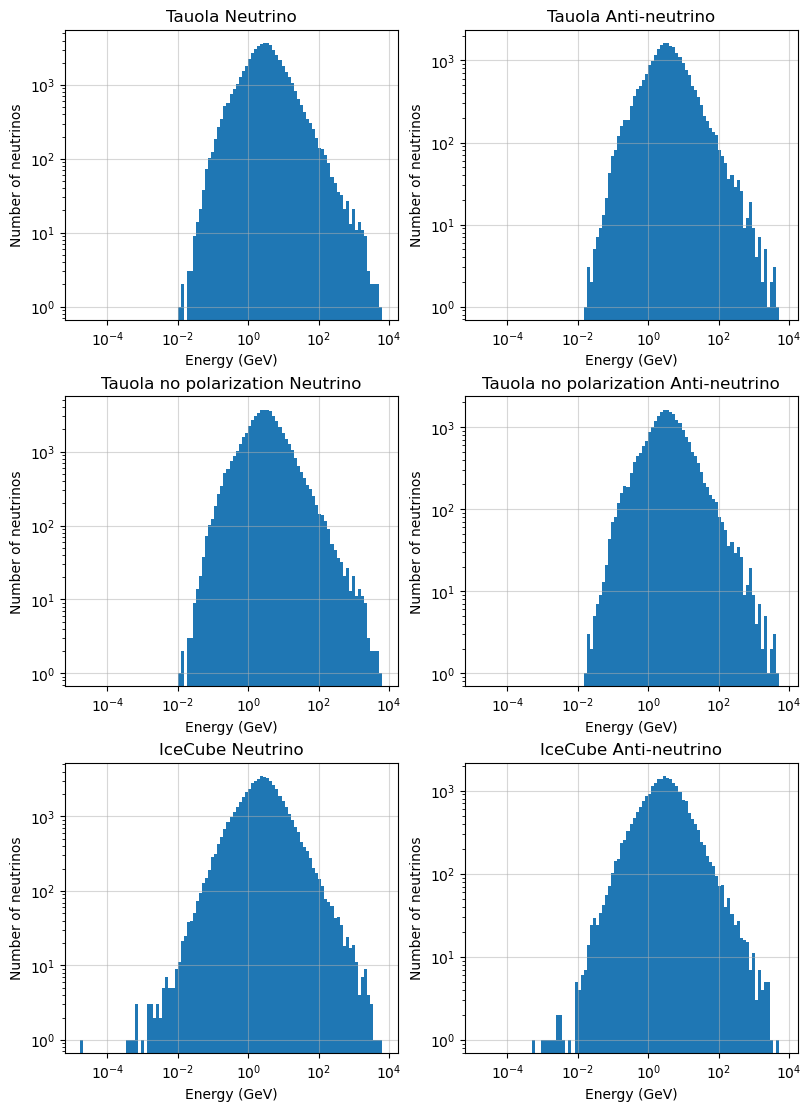

In [172]:
fig, axs = plt.subplots(figsize=(8, 11), nrows=3, ncols=2, layout="constrained")

min_energy = np.min(np.r_[nutau_e, anti_nutau_e, nutau_icecube_e, anti_nutau_icecube_e])
max_energy = np.max(np.r_[nutau_e, anti_nutau_e, nutau_icecube_e, anti_nutau_icecube_e])

for ax_row, label, lists, in zip(axs, ("Tauola", "Tauola no polarization", "IceCube"), ((nutau_e, anti_nutau_e), (nutau_nopol_e, anti_nutau_nopol_e), (nutau_icecube_e, anti_nutau_icecube_e))):
    for ax, energies, particle_type in zip(ax_row, lists, ("Neutrino", "Anti-neutrino")):
        ax.hist(energies, bins=np.geomspace(min_energy, max_energy, 100), label=f"{label} {particle_type}")
        ax.set_title(f"{label} {particle_type}")
        
for ax in axs.flat:
    ax.set(xscale="log", yscale="log", xlabel="Energy (GeV)", ylabel="Number of neutrinos")
    ax.grid(True, alpha=0.5)
    # ax.legend(fontsize="large")

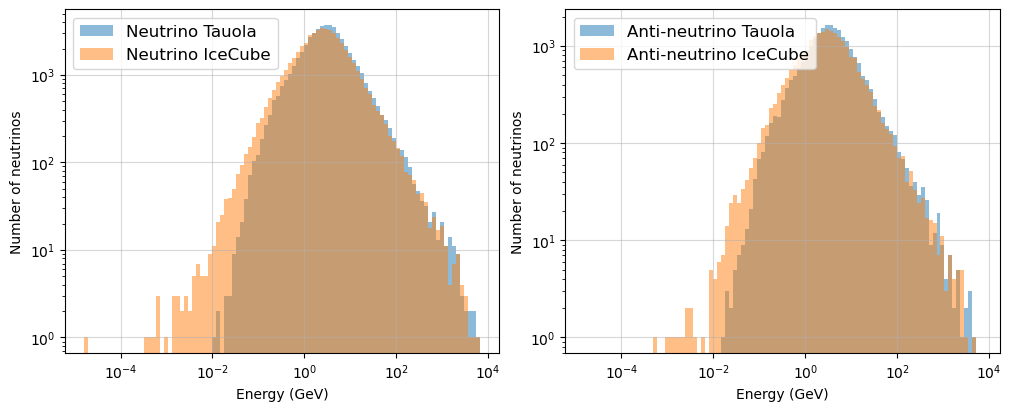

In [173]:
fig, axs = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, layout="constrained")

min_energy = np.min(np.r_[nutau_e, anti_nutau_e, nutau_icecube_e, anti_nutau_icecube_e])
max_energy = np.max(np.r_[nutau_e, anti_nutau_e, nutau_icecube_e, anti_nutau_icecube_e])

for ax, label, lists, in zip(axs, ("Neutrino", "Anti-neutrino"), ((nutau_e, nutau_icecube_e), (anti_nutau_e, anti_nutau_icecube_e))):
    for energies, particle_type in zip(lists, ("Tauola", "IceCube")):
        ax.hist(energies, bins=np.geomspace(min_energy, max_energy, 100), label=f"{label} {particle_type}", alpha=0.5)
        # ax.set_title(f"{label} {particle_type}")
        
for ax in axs.flat:
    ax.set(xscale="log", yscale="log", xlabel="Energy (GeV)", ylabel="Number of neutrinos")
    ax.grid(True, alpha=0.5)
    ax.legend(fontsize="large")

It seems like neutrinos tend to have lower energies for IceCube compared to Tauola. This would mean that the IceCube simulations overestimate the energy deposited in the detector.

## Low energy incoming tau neutrinos

In [29]:
# Select only events where the incoming neutrino has energy < 5 GeV
low_energy_events = particle_info.groupby("event_num").filter(lambda df: df.iloc[1, 2] < 5.)

In [30]:
decays_icecube_low_energy = decays_icecube[decays_icecube["event_num"].isin(low_energy_events["event_num"])]
nutau_icecube_e_le = decays_icecube_low_energy.query("pdg == 16")["E"]
anti_nutau_icecube_e_le = decays_icecube_low_energy.query("pdg == -16")["E"]

decays_low_energy = decay_products[decay_products["event_num"].isin(low_energy_events["event_num"])]
nutau_e_le = decays_low_energy.query("pdg == 16")["E"]
anti_nutau_e_le = decays_low_energy.query("pdg == -16")["E"]

/tmp/ipykernel_5818/3877334160.py:23: RuntimeWarning: divide by zero encountered in divide
  ax.stairs(hist_list[0] / hist_list[1], bins, color="k")
/tmp/ipykernel_5818/3877334160.py:23: RuntimeWarning: invalid value encountered in divide
  ax.stairs(hist_list[0] / hist_list[1], bins, color="k")


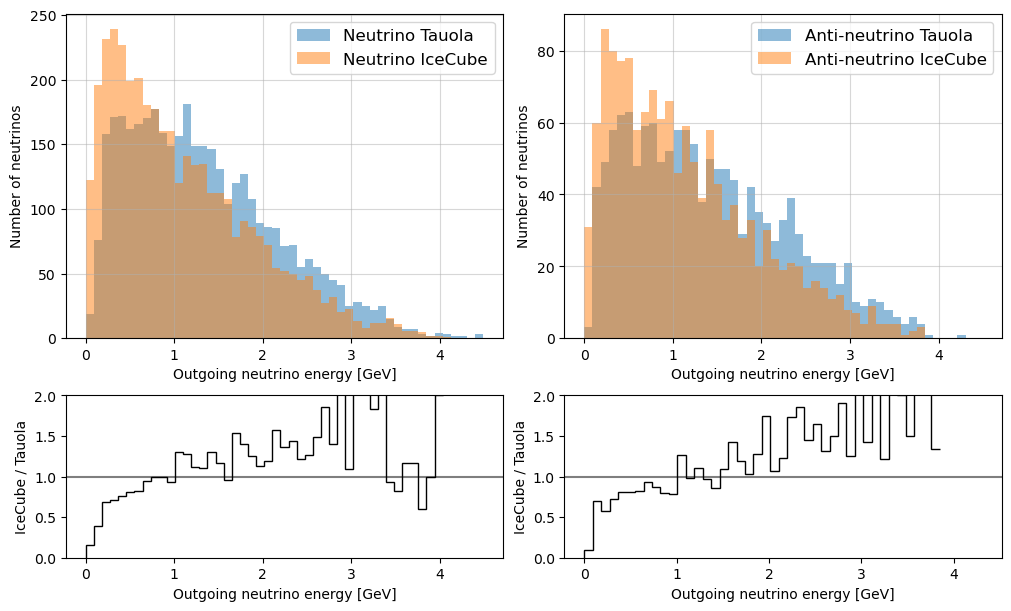

In [55]:
fig, axs = plt.subplots(figsize=(10, 6), nrows=2, ncols=2, layout="constrained", gridspec_kw=dict(height_ratios=(2, 1)))

min_energy = np.min(np.r_[nutau_e_le, anti_nutau_e_le, nutau_icecube_e_le, anti_nutau_icecube_e_le])
max_energy = np.max(np.r_[nutau_e_le, anti_nutau_e_le, nutau_icecube_e_le, anti_nutau_icecube_e_le])
bins = np.linspace(min_energy, max_energy, 50)

histograms = []
for ax, label, lists, in zip(axs[0, :], ("Neutrino", "Anti-neutrino"), ((nutau_e_le, nutau_icecube_e_le), (anti_nutau_e_le, anti_nutau_icecube_e_le))):
    ax_hists = []
    for energies, particle_type in zip(lists, ("Tauola", "IceCube")):
        e_hist, *_ = ax.hist(energies, bins=bins, label=f"{label} {particle_type}", alpha=0.5)
        ax_hists.append(e_hist)
        # ax.set_title(f"{label} {particle_type}")
    histograms.append(ax_hists)

for ax in axs[0, :]:
    ax.set(xlabel="Outgoing neutrino energy [GeV]", ylabel="Number of neutrinos")
    ax.grid(True, alpha=0.5)
    ax.legend(fontsize="large")

# Plot ratio of the histograms in the lower row
for ax, hist_list in zip(axs[1, :], histograms):
    ax.stairs(hist_list[0] / hist_list[1], bins, color="k")
    ax.axhline(1, c="k", alpha=0.5)
    ax.set(ylim=(0, 2), xlabel="Outgoing neutrino energy [GeV]", ylabel="IceCube / Tauola")


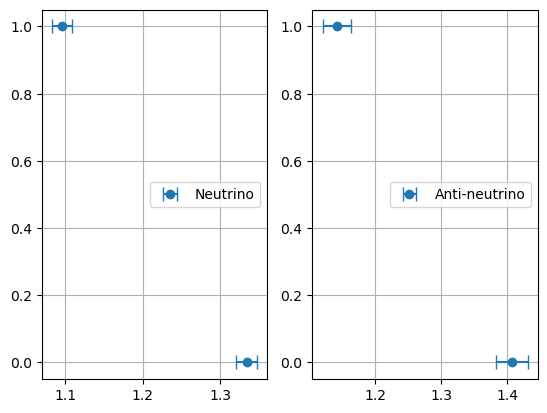

In [53]:
# Plot dots of mean energy with standard deviations. Each row should be a different dataset
# print(f"{np.mean(nutau_e)} +- {np.std(nutau_e)/np.sqrt(len(nutau_e)-1)}, {np.mean(nutau_icecube_e)} +- {np.std(nutau_icecube_e)/np.sqrt(len(nutau_e)-1)}")
fig, (ax, ax_anti) = plt.subplots(ncols=2)
ax.errorbar(
    y=np.arange(2),
    x=[np.mean(nutau_e_le), np.mean(nutau_icecube_e_le)],
    xerr=[np.std(nutau_e_le)/np.sqrt(len(nutau_e_le)-1), np.std(nutau_icecube_e_le)/np.sqrt(len(nutau_icecube_e_le)-1)],
    fmt="o",
    # add vertical lines at the end of the error bars
    capsize=5,
    label="Neutrino"
)
ax.grid()
ax.legend(loc="center right")

ax_anti.errorbar(
    y=np.arange(2),
    x=[np.mean(anti_nutau_e_le), np.mean(anti_nutau_icecube_e_le)],
    xerr=[np.std(anti_nutau_e_le)/np.sqrt(len(anti_nutau_e_le)-1), np.std(anti_nutau_icecube_e_le)/np.sqrt(len(anti_nutau_icecube_e_le)-1)],
    fmt="o",
    # add vertical lines at the end of the error bars
    capsize=5,
    label="Anti-neutrino"
)
ax_anti.grid()
ax_anti.legend(loc="center right")

For low energy primary tau neutrinos, the difference in mean energy is statistically significant between the two simulations. This couls mean that the spin polarization has a meaningful effect on the secondary neutrino energy.

In [57]:
particle_info.groupby("event_num").nth(1)

event_num  pdg            E           px           py           pz
1               0  -16     3.730323     0.185260     3.295873     1.737299
6               1   16     3.725654    -1.656092    -2.943322     1.573121
13              2   16     3.528632    -2.419746    -2.330455    -1.079378
18              3   16     3.882620    -0.162095    -0.282077    -3.868966
25              4   16     3.909540     0.001797    -0.855136    -3.814871
...           ...  ...          ...          ...          ...          ...
447097      76638  -16  1420.859081  -563.321344  -862.807899  -978.300630
447103      76639   16  5830.060163 -5542.246831 -1435.699600 -1100.848866
447109      76640  -16  1898.861298  1372.595075 -1307.442511  -110.684538
447115      76641   16  2171.189851 -1055.061515  1112.683486  1537.155174
447119      76642   16  2206.526149 -1049.708315 -1364.091472 -1380.624698

[76643 rows x 6 columns]

In [150]:
# Sort the events in particle_info based on the energy of the incoming neutrino
current_bin = 0
bin_step = 10
max_bin = 1000
bins = np.arange(current_bin, max_bin+bin_step+1e-6, bin_step)
bin_events = [[]]

for nu in particle_info.groupby("event_num").nth(1).sort_values("E").itertuples():
    if nu.E > current_bin + bin_step:
        current_bin += bin_step
        if current_bin > max_bin:
            break
        bin_events.append([])
    
    bin_events[-1].append(nu.event_num)

In [151]:
# For each energy bin, calculate the mean energy of the secondary neutrino

def get_energies(data, bin_events) -> tuple[list[float], list[float]]:
    mean_energies = []
    std_energies = []
    
    for events in bin_events:
        if len(events) <= 1:
            mean_energies.append(np.nan)
            std_energies.append(np.nan)
            continue

        decays = data[data["event_num"].isin(events)]
        mean_energies.append(np.mean(decays.query("abs(pdg) == 16")["E"]))
        std_energies.append(np.std(decays.query("abs(pdg) == 16")["E"])/np.sqrt(len(events)-1))
    return mean_energies, std_energies

# Tauola
mean_energies, std_energies = get_energies(decay_products, bin_events)
# IceCube
mean_energies_ic, std_energies_ic = get_energies(particle_info.groupby("event_num").nth[3:], bin_events)

In [152]:
len(mean_energies), len(bins)

(101, 102)

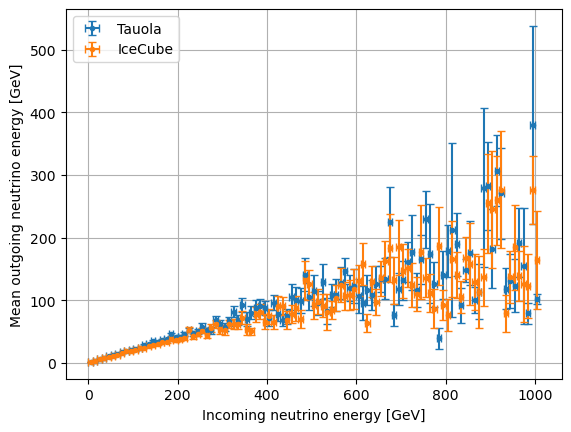

In [162]:
# Plot mean energies with standard deviations
fig, ax = plt.subplots()
plot_settings = dict(
    x=(bins[1:] + bins[:-1])/2,
    xerr=bin_step/2,
    fmt="o",
    # add vertical lines at the end of the error bars
    capsize=3,
    markersize=3,
)

ax.errorbar(
    y=mean_energies,
    yerr=std_energies,
    label="Tauola",
    **plot_settings,
)
ax.errorbar(
    y=mean_energies_ic,
    yerr=std_energies_ic,
    label="IceCube",
    **plot_settings,
)
ax.set(xlabel="Incoming neutrino energy [GeV]", ylabel="Mean outgoing neutrino energy [GeV]")
ax.legend()
ax.grid()

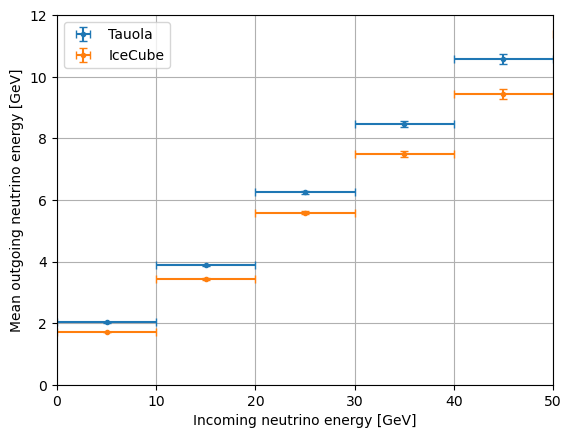

In [165]:
ax.set(xlim=(0, 50), ylim=(0, 12))
fig

Clearly for lower energies, the two decay simulations differ significantly from each other.

## Branching ratios for Tauola events

In [20]:
c = Counter(tuple(sorted(a.tolist())) for i, a in decay_products.groupby("event_num")["pdg"])

In [21]:
n_taus = (particle_info["pdg"] == 15).sum()
n_anti_taus = (particle_info["pdg"] == -15).sum()
n_taus, n_anti_taus

(53172, 23471)

In [22]:
br = {}
for pdgs, n in c.items():
    if 16 in pdgs:
        br[pdgs] = n / n_taus
    elif -16 in pdgs:
        br[pdgs] = n / n_anti_taus
    else:
        raise ValueError("No tau in the event")
br

{(-16, 211): 0.11000809509607601,
 (-211, 16, 111): 0.24992477243662078,
 (-211, 16): 0.1117505453998345,
 (-12, 11, 16): 0.1562288422477996,
 (-211, -211, 16, 211): 0.08920108327691266,
 (-16, 111, 211): 0.2545694687060628,
 (-211, -16, 211, 211): 0.08418899919049039,
 (-14, 13, 16): 0.17065372752576544,
 (-211, 16, 111, 111): 0.09294365455502897,
 (-16, -11, 12): 0.15593711388522005,
 (-211, -211, 16, 111, 211): 0.04500488979161965,
 (-16, -11, 12, 22): 0.028801499723062503,
 (-211, 16, 310): 0.0042315504400812455,
 (-16, -13, 14): 0.17148821950492096,
 (-211, 16, 130): 0.004269164221770857,
 (-211, -16, 111, 211, 211): 0.045630778407396363,
 (-211, 16, 130, 130): 0.00028210336267208303,
 (-16, 111, 111, 211): 0.09100592220186614,
 (-321, 16, 111): 0.004476040021063717,
 (-12, 11, 16, 22): 0.026724591890468666,
 (-211, 16, 111, 310): 0.003046716316858497,
 (-321, -211, 16, 211): 0.005134281200631911,
 (-321, -211, 16, 321): 0.0014857443767396373,
 (-211, -211, 16, 111, 111, 111, 211)

In [23]:
pdg2name = {15: "tau-", 16: "nu_tau", 211: "pi+", -15: "tau+", -16: "nu_tau_bar", -211: "pi-", 111: "pi0", 13: "mu-", -13: "mu+", 14: "nu_mu", -14: "nu_mu_bar", 11: "e-", -11: "e+", 12: "nu_e", -12: "nu_e_bar", 22: 
            "gamma", 310: "K^0_S", 130: "K^0_L", 321: "K+", -321: "K-"}

for pdgs, n in br.items():
    for pdg in pdgs:
        print(pdg2name[pdg], end=" ")
    print(":", n*100)

nu_tau_bar pi+ : 11.0008095096076
pi- nu_tau pi0 : 24.99247724366208
pi- nu_tau : 11.175054539983451
nu_e_bar e- nu_tau : 15.622884224779959
pi- pi- nu_tau pi+ : 8.920108327691265
nu_tau_bar pi0 pi+ : 25.456946870606277
pi- nu_tau_bar pi+ pi+ : 8.41889991904904
nu_mu_bar mu- nu_tau : 17.065372752576543
pi- nu_tau pi0 pi0 : 9.294365455502897
nu_tau_bar e+ nu_e : 15.593711388522005
pi- pi- nu_tau pi0 pi+ : 4.500488979161965
nu_tau_bar e+ nu_e gamma : 2.8801499723062505
pi- nu_tau K^0_S : 0.42315504400812454
nu_tau_bar mu+ nu_mu : 17.148821950492096
pi- nu_tau K^0_L : 0.42691642217708564
pi- nu_tau_bar pi0 pi+ pi+ : 4.563077840739636
pi- nu_tau K^0_L K^0_L : 0.028210336267208303
nu_tau_bar pi0 pi0 pi+ : 9.100592220186615
K- nu_tau pi0 : 0.44760400210637175
nu_e_bar e- nu_tau gamma : 2.6724591890468665
pi- nu_tau pi0 K^0_S : 0.3046716316858497
K- pi- nu_tau pi+ : 0.5134281200631912
K- pi- nu_tau K+ : 0.14857443767396372
pi- pi- nu_tau pi0 pi0 pi0 pi+ : 0.047017227112013844
nu_tau_bar pi0 p

KeyError: 221

In [24]:
# nutau_e = []
# anti_nutau_e = []
def identify_strange_events():
    with pyhepmc.open("tauola_output.dat", "r") as f:
        # Iterate over all events
        for i, evt in enumerate(f):
            # Find the tau and identify its daughter tau neutrino
            for vertex in evt.vertices:
                # Check if there is a tau neutrino as incoming particle
                # If it is, skip the vertex
                if any(np.abs(p.pid) == 16 for p in vertex.particles_in):
                    continue
                
                # Find the daughter tau neutrino
                for daughter in vertex.particles_out:
                    # If it is not a final state particle, skip it
                    if daughter.status != 1:
                        continue
                    
                    if np.abs(daughter.pid) not in {11, 12, 13, 14, 16, 111, 211, 22}:
                        return evt
                    
identify_strange_events()

<GenEvent momentum_unit=1, length_unit=0, event_number=32, particles=7, vertices=3, run_info=GenRunInfo(tools=[], weight_names=[], attributes={})>